1.导入所有需要的软件包

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

2.定义函数实现归一化

In [2]:
def normalize(X):
    """Normalize the array X"""
    mean = np.mean(X)
    std = np.std(X)
    X = (X - mean) /std
    return X

4.使用tensorflow contfib数据集加载波士顿房价数据集，并将其分解为X_train,Y_train，并进行归一化处理

In [3]:
boston = tf.contrib.learn.datasets.load_dataset('boston')
X_train,Y_train = boston.data[:,5],boston.target
# X_train = normalize(X_train)
n_samples = len(X_train)


For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
Please use tf.data.
Instructions for updating:
Use scikits.learn.datasets.
Instructions for updating:
Use tf.data instead.


4.为训练数据声明Tensorflow占位符

In [4]:
X = tf.placeholder(tf.float32,name='X')
Y = tf.placeholder(tf.float32,name='Y')

5.创建Tensorflow的权重和偏置变量且初始值为0

In [5]:
b = tf.Variable(0.0)
w = tf.Variable(0.0)

Instructions for updating:
Colocations handled automatically by placer.


6.定义用于线性回归的线性模型

In [6]:
Y_hat = X * w + b

7.定义损失函数

In [7]:
loss = tf.square(Y - Y_hat,name='loss')

8.选择梯度下降优化器

In [8]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(loss)

9.声明初始化操作符

In [9]:
init_op = tf.global_variables_initializer()
total = []

10.现在，开始计算图，训练100次

In [14]:
with tf.Session() as sess:
    # 初始化变量
    sess.run(init_op)
    writer = tf.summary.FileWriter('graphs',sess.graph)
    # 训练模型迭代100次
    for i in range(100):
        total_loss = 0
        for x,y in zip(X_train,Y_train):
            _,l = sess.run([optimizer,loss],feed_dict={X:x,Y:y})
            total_loss = total_loss + 1
            total.append(total_loss / n_samples)
            print('Epoch {0}: Loss {1}'.format(i,total_loss/n_samples))
            writer.close()
            b_value,w_value = sess.run([b,w])

Epoch 0: Loss 0.001976284584980237
Epoch 0: Loss 0.003952569169960474
Epoch 0: Loss 0.005928853754940711
Epoch 0: Loss 0.007905138339920948
Epoch 0: Loss 0.009881422924901186
Epoch 0: Loss 0.011857707509881422
Epoch 0: Loss 0.01383399209486166
Epoch 0: Loss 0.015810276679841896
Epoch 0: Loss 0.017786561264822136
Epoch 0: Loss 0.019762845849802372
Epoch 0: Loss 0.021739130434782608
Epoch 0: Loss 0.023715415019762844
Epoch 0: Loss 0.025691699604743084
Epoch 0: Loss 0.02766798418972332
Epoch 0: Loss 0.029644268774703556
Epoch 0: Loss 0.03162055335968379
Epoch 0: Loss 0.03359683794466403
Epoch 0: Loss 0.03557312252964427
Epoch 0: Loss 0.037549407114624504
Epoch 0: Loss 0.039525691699604744
Epoch 0: Loss 0.041501976284584984
Epoch 0: Loss 0.043478260869565216
Epoch 0: Loss 0.045454545454545456
Epoch 0: Loss 0.04743083003952569
Epoch 0: Loss 0.04940711462450593
Epoch 0: Loss 0.05138339920948617
Epoch 0: Loss 0.0533596837944664
Epoch 0: Loss 0.05533596837944664
Epoch 0: Loss 0.057312252964426

Epoch 0: Loss 0.5652173913043478
Epoch 0: Loss 0.567193675889328
Epoch 0: Loss 0.5691699604743083
Epoch 0: Loss 0.5711462450592886
Epoch 0: Loss 0.5731225296442688
Epoch 0: Loss 0.575098814229249
Epoch 0: Loss 0.5770750988142292
Epoch 0: Loss 0.5790513833992095
Epoch 0: Loss 0.5810276679841897
Epoch 0: Loss 0.5830039525691699
Epoch 0: Loss 0.5849802371541502
Epoch 0: Loss 0.5869565217391305
Epoch 0: Loss 0.5889328063241107
Epoch 0: Loss 0.5909090909090909
Epoch 0: Loss 0.5928853754940712
Epoch 0: Loss 0.5948616600790514
Epoch 0: Loss 0.5968379446640316
Epoch 0: Loss 0.5988142292490118
Epoch 0: Loss 0.6007905138339921
Epoch 0: Loss 0.6027667984189723
Epoch 0: Loss 0.6047430830039525
Epoch 0: Loss 0.6067193675889329
Epoch 0: Loss 0.6086956521739131
Epoch 0: Loss 0.6106719367588933
Epoch 0: Loss 0.6126482213438735
Epoch 0: Loss 0.6146245059288538
Epoch 0: Loss 0.616600790513834
Epoch 0: Loss 0.6185770750988142
Epoch 0: Loss 0.6205533596837944
Epoch 0: Loss 0.6225296442687747
Epoch 0: Loss

Epoch 1: Loss 0.21936758893280633
Epoch 1: Loss 0.22134387351778656
Epoch 1: Loss 0.22332015810276679
Epoch 1: Loss 0.22529644268774704
Epoch 1: Loss 0.22727272727272727
Epoch 1: Loss 0.22924901185770752
Epoch 1: Loss 0.23122529644268774
Epoch 1: Loss 0.233201581027668
Epoch 1: Loss 0.23517786561264822
Epoch 1: Loss 0.23715415019762845
Epoch 1: Loss 0.2391304347826087
Epoch 1: Loss 0.24110671936758893
Epoch 1: Loss 0.24308300395256918
Epoch 1: Loss 0.2450592885375494
Epoch 1: Loss 0.24703557312252963
Epoch 1: Loss 0.2490118577075099
Epoch 1: Loss 0.2509881422924901
Epoch 1: Loss 0.25296442687747034
Epoch 1: Loss 0.2549407114624506
Epoch 1: Loss 0.25691699604743085
Epoch 1: Loss 0.25889328063241107
Epoch 1: Loss 0.2608695652173913
Epoch 1: Loss 0.2628458498023715
Epoch 1: Loss 0.2648221343873518
Epoch 1: Loss 0.26679841897233203
Epoch 1: Loss 0.26877470355731226
Epoch 1: Loss 0.2707509881422925
Epoch 1: Loss 0.2727272727272727
Epoch 1: Loss 0.274703557312253
Epoch 1: Loss 0.276679841897

Epoch 1: Loss 0.7529644268774703
Epoch 1: Loss 0.7549407114624506
Epoch 1: Loss 0.7569169960474308
Epoch 1: Loss 0.758893280632411
Epoch 1: Loss 0.7608695652173914
Epoch 1: Loss 0.7628458498023716
Epoch 1: Loss 0.7648221343873518
Epoch 1: Loss 0.766798418972332
Epoch 1: Loss 0.7687747035573123
Epoch 1: Loss 0.7707509881422925
Epoch 1: Loss 0.7727272727272727
Epoch 1: Loss 0.7747035573122529
Epoch 1: Loss 0.7766798418972332
Epoch 1: Loss 0.7786561264822134
Epoch 1: Loss 0.7806324110671937
Epoch 1: Loss 0.782608695652174
Epoch 1: Loss 0.7845849802371542
Epoch 1: Loss 0.7865612648221344
Epoch 1: Loss 0.7885375494071146
Epoch 1: Loss 0.7905138339920948
Epoch 1: Loss 0.7924901185770751
Epoch 1: Loss 0.7944664031620553
Epoch 1: Loss 0.7964426877470355
Epoch 1: Loss 0.7984189723320159
Epoch 1: Loss 0.8003952569169961
Epoch 1: Loss 0.8023715415019763
Epoch 1: Loss 0.8043478260869565
Epoch 1: Loss 0.8063241106719368
Epoch 1: Loss 0.808300395256917
Epoch 1: Loss 0.8102766798418972
Epoch 1: Loss 

Epoch 2: Loss 0.3142292490118577
Epoch 2: Loss 0.31620553359683795
Epoch 2: Loss 0.3181818181818182
Epoch 2: Loss 0.3201581027667984
Epoch 2: Loss 0.3221343873517787
Epoch 2: Loss 0.3241106719367589
Epoch 2: Loss 0.32608695652173914
Epoch 2: Loss 0.32806324110671936
Epoch 2: Loss 0.3300395256916996
Epoch 2: Loss 0.33201581027667987
Epoch 2: Loss 0.3339920948616601
Epoch 2: Loss 0.3359683794466403
Epoch 2: Loss 0.33794466403162055
Epoch 2: Loss 0.33992094861660077
Epoch 2: Loss 0.34189723320158105
Epoch 2: Loss 0.3438735177865613
Epoch 2: Loss 0.3458498023715415
Epoch 2: Loss 0.34782608695652173
Epoch 2: Loss 0.34980237154150196
Epoch 2: Loss 0.35177865612648224
Epoch 2: Loss 0.35375494071146246
Epoch 2: Loss 0.3557312252964427
Epoch 2: Loss 0.3577075098814229
Epoch 2: Loss 0.35968379446640314
Epoch 2: Loss 0.3616600790513834
Epoch 2: Loss 0.36363636363636365
Epoch 2: Loss 0.36561264822134387
Epoch 2: Loss 0.3675889328063241
Epoch 2: Loss 0.3695652173913043
Epoch 2: Loss 0.3715415019762

Epoch 2: Loss 0.849802371541502
Epoch 2: Loss 0.8517786561264822
Epoch 2: Loss 0.8537549407114624
Epoch 2: Loss 0.8557312252964426
Epoch 2: Loss 0.857707509881423
Epoch 2: Loss 0.8596837944664032
Epoch 2: Loss 0.8616600790513834
Epoch 2: Loss 0.8636363636363636
Epoch 2: Loss 0.8656126482213439
Epoch 2: Loss 0.8675889328063241
Epoch 2: Loss 0.8695652173913043
Epoch 2: Loss 0.8715415019762845
Epoch 2: Loss 0.8735177865612648
Epoch 2: Loss 0.8754940711462451
Epoch 2: Loss 0.8774703557312253
Epoch 2: Loss 0.8794466403162056
Epoch 2: Loss 0.8814229249011858
Epoch 2: Loss 0.883399209486166
Epoch 2: Loss 0.8853754940711462
Epoch 2: Loss 0.8873517786561265
Epoch 2: Loss 0.8893280632411067
Epoch 2: Loss 0.8913043478260869
Epoch 2: Loss 0.8932806324110671
Epoch 2: Loss 0.8952569169960475
Epoch 2: Loss 0.8972332015810277
Epoch 2: Loss 0.8992094861660079
Epoch 2: Loss 0.9011857707509882
Epoch 2: Loss 0.9031620553359684
Epoch 2: Loss 0.9051383399209486
Epoch 2: Loss 0.9071146245059288
Epoch 2: Loss

Epoch 3: Loss 0.3359683794466403
Epoch 3: Loss 0.33794466403162055
Epoch 3: Loss 0.33992094861660077
Epoch 3: Loss 0.34189723320158105
Epoch 3: Loss 0.3438735177865613
Epoch 3: Loss 0.3458498023715415
Epoch 3: Loss 0.34782608695652173
Epoch 3: Loss 0.34980237154150196
Epoch 3: Loss 0.35177865612648224
Epoch 3: Loss 0.35375494071146246
Epoch 3: Loss 0.3557312252964427
Epoch 3: Loss 0.3577075098814229
Epoch 3: Loss 0.35968379446640314
Epoch 3: Loss 0.3616600790513834
Epoch 3: Loss 0.36363636363636365
Epoch 3: Loss 0.36561264822134387
Epoch 3: Loss 0.3675889328063241
Epoch 3: Loss 0.3695652173913043
Epoch 3: Loss 0.3715415019762846
Epoch 3: Loss 0.37351778656126483
Epoch 3: Loss 0.37549407114624506
Epoch 3: Loss 0.3774703557312253
Epoch 3: Loss 0.3794466403162055
Epoch 3: Loss 0.3814229249011858
Epoch 3: Loss 0.383399209486166
Epoch 3: Loss 0.38537549407114624
Epoch 3: Loss 0.38735177865612647
Epoch 3: Loss 0.3893280632411067
Epoch 3: Loss 0.391304347826087
Epoch 3: Loss 0.393280632411067

Epoch 3: Loss 0.9802371541501976
Epoch 3: Loss 0.9822134387351779
Epoch 3: Loss 0.9841897233201581
Epoch 3: Loss 0.9861660079051383
Epoch 3: Loss 0.9881422924901185
Epoch 3: Loss 0.9901185770750988
Epoch 3: Loss 0.9920948616600791
Epoch 3: Loss 0.9940711462450593
Epoch 3: Loss 0.9960474308300395
Epoch 3: Loss 0.9980237154150198
Epoch 3: Loss 1.0
Epoch 4: Loss 0.001976284584980237
Epoch 4: Loss 0.003952569169960474
Epoch 4: Loss 0.005928853754940711
Epoch 4: Loss 0.007905138339920948
Epoch 4: Loss 0.009881422924901186
Epoch 4: Loss 0.011857707509881422
Epoch 4: Loss 0.01383399209486166
Epoch 4: Loss 0.015810276679841896
Epoch 4: Loss 0.017786561264822136
Epoch 4: Loss 0.019762845849802372
Epoch 4: Loss 0.021739130434782608
Epoch 4: Loss 0.023715415019762844
Epoch 4: Loss 0.025691699604743084
Epoch 4: Loss 0.02766798418972332
Epoch 4: Loss 0.029644268774703556
Epoch 4: Loss 0.03162055335968379
Epoch 4: Loss 0.03359683794466403
Epoch 4: Loss 0.03557312252964427
Epoch 4: Loss 0.03754940711

Epoch 4: Loss 0.5118577075098815
Epoch 4: Loss 0.5138339920948617
Epoch 4: Loss 0.5158102766798419
Epoch 4: Loss 0.5177865612648221
Epoch 4: Loss 0.5197628458498024
Epoch 4: Loss 0.5217391304347826
Epoch 4: Loss 0.5237154150197628
Epoch 4: Loss 0.525691699604743
Epoch 4: Loss 0.5276679841897233
Epoch 4: Loss 0.5296442687747036
Epoch 4: Loss 0.5316205533596838
Epoch 4: Loss 0.5335968379446641
Epoch 4: Loss 0.5355731225296443
Epoch 4: Loss 0.5375494071146245
Epoch 4: Loss 0.5395256916996047
Epoch 4: Loss 0.541501976284585
Epoch 4: Loss 0.5434782608695652
Epoch 4: Loss 0.5454545454545454
Epoch 4: Loss 0.5474308300395256
Epoch 4: Loss 0.549407114624506
Epoch 4: Loss 0.5513833992094862
Epoch 4: Loss 0.5533596837944664
Epoch 4: Loss 0.5553359683794467
Epoch 4: Loss 0.5573122529644269
Epoch 4: Loss 0.5592885375494071
Epoch 4: Loss 0.5612648221343873
Epoch 4: Loss 0.5632411067193676
Epoch 4: Loss 0.5652173913043478
Epoch 4: Loss 0.567193675889328
Epoch 4: Loss 0.5691699604743083
Epoch 4: Loss 

Epoch 5: Loss 0.1600790513833992
Epoch 5: Loss 0.16205533596837945
Epoch 5: Loss 0.16403162055335968
Epoch 5: Loss 0.16600790513833993
Epoch 5: Loss 0.16798418972332016
Epoch 5: Loss 0.16996047430830039
Epoch 5: Loss 0.17193675889328064
Epoch 5: Loss 0.17391304347826086
Epoch 5: Loss 0.17588932806324112
Epoch 5: Loss 0.17786561264822134
Epoch 5: Loss 0.17984189723320157
Epoch 5: Loss 0.18181818181818182
Epoch 5: Loss 0.18379446640316205
Epoch 5: Loss 0.1857707509881423
Epoch 5: Loss 0.18774703557312253
Epoch 5: Loss 0.18972332015810275
Epoch 5: Loss 0.191699604743083
Epoch 5: Loss 0.19367588932806323
Epoch 5: Loss 0.1956521739130435
Epoch 5: Loss 0.1976284584980237
Epoch 5: Loss 0.19960474308300397
Epoch 5: Loss 0.2015810276679842
Epoch 5: Loss 0.20355731225296442
Epoch 5: Loss 0.20553359683794467
Epoch 5: Loss 0.2075098814229249
Epoch 5: Loss 0.20948616600790515
Epoch 5: Loss 0.21146245059288538
Epoch 5: Loss 0.2134387351778656
Epoch 5: Loss 0.21541501976284586
Epoch 5: Loss 0.2173913

Epoch 5: Loss 0.658102766798419
Epoch 5: Loss 0.6600790513833992
Epoch 5: Loss 0.6620553359683794
Epoch 5: Loss 0.6640316205533597
Epoch 5: Loss 0.66600790513834
Epoch 5: Loss 0.6679841897233202
Epoch 5: Loss 0.6699604743083004
Epoch 5: Loss 0.6719367588932806
Epoch 5: Loss 0.6739130434782609
Epoch 5: Loss 0.6758893280632411
Epoch 5: Loss 0.6778656126482213
Epoch 5: Loss 0.6798418972332015
Epoch 5: Loss 0.6818181818181818
Epoch 5: Loss 0.6837944664031621
Epoch 5: Loss 0.6857707509881423
Epoch 5: Loss 0.6877470355731226
Epoch 5: Loss 0.6897233201581028
Epoch 5: Loss 0.691699604743083
Epoch 5: Loss 0.6936758893280632
Epoch 5: Loss 0.6956521739130435
Epoch 5: Loss 0.6976284584980237
Epoch 5: Loss 0.6996047430830039
Epoch 5: Loss 0.7015810276679841
Epoch 5: Loss 0.7035573122529645
Epoch 5: Loss 0.7055335968379447
Epoch 5: Loss 0.7075098814229249
Epoch 5: Loss 0.7094861660079052
Epoch 5: Loss 0.7114624505928854
Epoch 5: Loss 0.7134387351778656
Epoch 5: Loss 0.7154150197628458
Epoch 5: Loss 

Epoch 6: Loss 0.16205533596837945
Epoch 6: Loss 0.16403162055335968
Epoch 6: Loss 0.16600790513833993
Epoch 6: Loss 0.16798418972332016
Epoch 6: Loss 0.16996047430830039
Epoch 6: Loss 0.17193675889328064
Epoch 6: Loss 0.17391304347826086
Epoch 6: Loss 0.17588932806324112
Epoch 6: Loss 0.17786561264822134
Epoch 6: Loss 0.17984189723320157
Epoch 6: Loss 0.18181818181818182
Epoch 6: Loss 0.18379446640316205
Epoch 6: Loss 0.1857707509881423
Epoch 6: Loss 0.18774703557312253
Epoch 6: Loss 0.18972332015810275
Epoch 6: Loss 0.191699604743083
Epoch 6: Loss 0.19367588932806323
Epoch 6: Loss 0.1956521739130435
Epoch 6: Loss 0.1976284584980237
Epoch 6: Loss 0.19960474308300397
Epoch 6: Loss 0.2015810276679842
Epoch 6: Loss 0.20355731225296442
Epoch 6: Loss 0.20553359683794467
Epoch 6: Loss 0.2075098814229249
Epoch 6: Loss 0.20948616600790515
Epoch 6: Loss 0.21146245059288538
Epoch 6: Loss 0.2134387351778656
Epoch 6: Loss 0.21541501976284586
Epoch 6: Loss 0.21739130434782608
Epoch 6: Loss 0.219367

Epoch 6: Loss 0.8241106719367589
Epoch 6: Loss 0.8260869565217391
Epoch 6: Loss 0.8280632411067194
Epoch 6: Loss 0.8300395256916996
Epoch 6: Loss 0.8320158102766798
Epoch 6: Loss 0.83399209486166
Epoch 6: Loss 0.8359683794466403
Epoch 6: Loss 0.8379446640316206
Epoch 6: Loss 0.8399209486166008
Epoch 6: Loss 0.841897233201581
Epoch 6: Loss 0.8438735177865613
Epoch 6: Loss 0.8458498023715415
Epoch 6: Loss 0.8478260869565217
Epoch 6: Loss 0.849802371541502
Epoch 6: Loss 0.8517786561264822
Epoch 6: Loss 0.8537549407114624
Epoch 6: Loss 0.8557312252964426
Epoch 6: Loss 0.857707509881423
Epoch 6: Loss 0.8596837944664032
Epoch 6: Loss 0.8616600790513834
Epoch 6: Loss 0.8636363636363636
Epoch 6: Loss 0.8656126482213439
Epoch 6: Loss 0.8675889328063241
Epoch 6: Loss 0.8695652173913043
Epoch 6: Loss 0.8715415019762845
Epoch 6: Loss 0.8735177865612648
Epoch 6: Loss 0.8754940711462451
Epoch 6: Loss 0.8774703557312253
Epoch 6: Loss 0.8794466403162056
Epoch 6: Loss 0.8814229249011858
Epoch 6: Loss 0

Epoch 7: Loss 0.525691699604743
Epoch 7: Loss 0.5276679841897233
Epoch 7: Loss 0.5296442687747036
Epoch 7: Loss 0.5316205533596838
Epoch 7: Loss 0.5335968379446641
Epoch 7: Loss 0.5355731225296443
Epoch 7: Loss 0.5375494071146245
Epoch 7: Loss 0.5395256916996047
Epoch 7: Loss 0.541501976284585
Epoch 7: Loss 0.5434782608695652
Epoch 7: Loss 0.5454545454545454
Epoch 7: Loss 0.5474308300395256
Epoch 7: Loss 0.549407114624506
Epoch 7: Loss 0.5513833992094862
Epoch 7: Loss 0.5533596837944664
Epoch 7: Loss 0.5553359683794467
Epoch 7: Loss 0.5573122529644269
Epoch 7: Loss 0.5592885375494071
Epoch 7: Loss 0.5612648221343873
Epoch 7: Loss 0.5632411067193676
Epoch 7: Loss 0.5652173913043478
Epoch 7: Loss 0.567193675889328
Epoch 7: Loss 0.5691699604743083
Epoch 7: Loss 0.5711462450592886
Epoch 7: Loss 0.5731225296442688
Epoch 7: Loss 0.575098814229249
Epoch 7: Loss 0.5770750988142292
Epoch 7: Loss 0.5790513833992095
Epoch 7: Loss 0.5810276679841897
Epoch 7: Loss 0.5830039525691699
Epoch 7: Loss 0

Epoch 8: Loss 0.21541501976284586
Epoch 8: Loss 0.21739130434782608
Epoch 8: Loss 0.21936758893280633
Epoch 8: Loss 0.22134387351778656
Epoch 8: Loss 0.22332015810276679
Epoch 8: Loss 0.22529644268774704
Epoch 8: Loss 0.22727272727272727
Epoch 8: Loss 0.22924901185770752
Epoch 8: Loss 0.23122529644268774
Epoch 8: Loss 0.233201581027668
Epoch 8: Loss 0.23517786561264822
Epoch 8: Loss 0.23715415019762845
Epoch 8: Loss 0.2391304347826087
Epoch 8: Loss 0.24110671936758893
Epoch 8: Loss 0.24308300395256918
Epoch 8: Loss 0.2450592885375494
Epoch 8: Loss 0.24703557312252963
Epoch 8: Loss 0.2490118577075099
Epoch 8: Loss 0.2509881422924901
Epoch 8: Loss 0.25296442687747034
Epoch 8: Loss 0.2549407114624506
Epoch 8: Loss 0.25691699604743085
Epoch 8: Loss 0.25889328063241107
Epoch 8: Loss 0.2608695652173913
Epoch 8: Loss 0.2628458498023715
Epoch 8: Loss 0.2648221343873518
Epoch 8: Loss 0.26679841897233203
Epoch 8: Loss 0.26877470355731226
Epoch 8: Loss 0.2707509881422925
Epoch 8: Loss 0.272727272

Epoch 8: Loss 0.8399209486166008
Epoch 8: Loss 0.841897233201581
Epoch 8: Loss 0.8438735177865613
Epoch 8: Loss 0.8458498023715415
Epoch 8: Loss 0.8478260869565217
Epoch 8: Loss 0.849802371541502
Epoch 8: Loss 0.8517786561264822
Epoch 8: Loss 0.8537549407114624
Epoch 8: Loss 0.8557312252964426
Epoch 8: Loss 0.857707509881423
Epoch 8: Loss 0.8596837944664032
Epoch 8: Loss 0.8616600790513834
Epoch 8: Loss 0.8636363636363636
Epoch 8: Loss 0.8656126482213439
Epoch 8: Loss 0.8675889328063241
Epoch 8: Loss 0.8695652173913043
Epoch 8: Loss 0.8715415019762845
Epoch 8: Loss 0.8735177865612648
Epoch 8: Loss 0.8754940711462451
Epoch 8: Loss 0.8774703557312253
Epoch 8: Loss 0.8794466403162056
Epoch 8: Loss 0.8814229249011858
Epoch 8: Loss 0.883399209486166
Epoch 8: Loss 0.8853754940711462
Epoch 8: Loss 0.8873517786561265
Epoch 8: Loss 0.8893280632411067
Epoch 8: Loss 0.8913043478260869
Epoch 8: Loss 0.8932806324110671
Epoch 8: Loss 0.8952569169960475
Epoch 8: Loss 0.8972332015810277
Epoch 8: Loss 

Epoch 9: Loss 0.3695652173913043
Epoch 9: Loss 0.3715415019762846
Epoch 9: Loss 0.37351778656126483
Epoch 9: Loss 0.37549407114624506
Epoch 9: Loss 0.3774703557312253
Epoch 9: Loss 0.3794466403162055
Epoch 9: Loss 0.3814229249011858
Epoch 9: Loss 0.383399209486166
Epoch 9: Loss 0.38537549407114624
Epoch 9: Loss 0.38735177865612647
Epoch 9: Loss 0.3893280632411067
Epoch 9: Loss 0.391304347826087
Epoch 9: Loss 0.3932806324110672
Epoch 9: Loss 0.3952569169960474
Epoch 9: Loss 0.39723320158102765
Epoch 9: Loss 0.39920948616600793
Epoch 9: Loss 0.40118577075098816
Epoch 9: Loss 0.4031620553359684
Epoch 9: Loss 0.4051383399209486
Epoch 9: Loss 0.40711462450592883
Epoch 9: Loss 0.4090909090909091
Epoch 9: Loss 0.41106719367588934
Epoch 9: Loss 0.41304347826086957
Epoch 9: Loss 0.4150197628458498
Epoch 9: Loss 0.41699604743083
Epoch 9: Loss 0.4189723320158103
Epoch 9: Loss 0.4209486166007905
Epoch 9: Loss 0.42292490118577075
Epoch 9: Loss 0.424901185770751
Epoch 9: Loss 0.4268774703557312
Epoc

Epoch 9: Loss 0.9071146245059288
Epoch 9: Loss 0.9090909090909091
Epoch 9: Loss 0.9110671936758893
Epoch 9: Loss 0.9130434782608695
Epoch 9: Loss 0.9150197628458498
Epoch 9: Loss 0.9169960474308301
Epoch 9: Loss 0.9189723320158103
Epoch 9: Loss 0.9209486166007905
Epoch 9: Loss 0.9229249011857708
Epoch 9: Loss 0.924901185770751
Epoch 9: Loss 0.9268774703557312
Epoch 9: Loss 0.9288537549407114
Epoch 9: Loss 0.9308300395256917
Epoch 9: Loss 0.932806324110672
Epoch 9: Loss 0.9347826086956522
Epoch 9: Loss 0.9367588932806324
Epoch 9: Loss 0.9387351778656127
Epoch 9: Loss 0.9407114624505929
Epoch 9: Loss 0.9426877470355731
Epoch 9: Loss 0.9446640316205533
Epoch 9: Loss 0.9466403162055336
Epoch 9: Loss 0.9486166007905138
Epoch 9: Loss 0.950592885375494
Epoch 9: Loss 0.9525691699604744
Epoch 9: Loss 0.9545454545454546
Epoch 9: Loss 0.9565217391304348
Epoch 9: Loss 0.958498023715415
Epoch 9: Loss 0.9604743083003953
Epoch 9: Loss 0.9624505928853755
Epoch 9: Loss 0.9644268774703557
Epoch 9: Loss 

Epoch 10: Loss 0.4980237154150198
Epoch 10: Loss 0.5
Epoch 10: Loss 0.5019762845849802
Epoch 10: Loss 0.5039525691699605
Epoch 10: Loss 0.5059288537549407
Epoch 10: Loss 0.5079051383399209
Epoch 10: Loss 0.5098814229249012
Epoch 10: Loss 0.5118577075098815
Epoch 10: Loss 0.5138339920948617
Epoch 10: Loss 0.5158102766798419
Epoch 10: Loss 0.5177865612648221
Epoch 10: Loss 0.5197628458498024
Epoch 10: Loss 0.5217391304347826
Epoch 10: Loss 0.5237154150197628
Epoch 10: Loss 0.525691699604743
Epoch 10: Loss 0.5276679841897233
Epoch 10: Loss 0.5296442687747036
Epoch 10: Loss 0.5316205533596838
Epoch 10: Loss 0.5335968379446641
Epoch 10: Loss 0.5355731225296443
Epoch 10: Loss 0.5375494071146245
Epoch 10: Loss 0.5395256916996047
Epoch 10: Loss 0.541501976284585
Epoch 10: Loss 0.5434782608695652
Epoch 10: Loss 0.5454545454545454
Epoch 10: Loss 0.5474308300395256
Epoch 10: Loss 0.549407114624506
Epoch 10: Loss 0.5513833992094862
Epoch 10: Loss 0.5533596837944664
Epoch 10: Loss 0.555335968379446

Epoch 11: Loss 0.1067193675889328
Epoch 11: Loss 0.10869565217391304
Epoch 11: Loss 0.11067193675889328
Epoch 11: Loss 0.11264822134387352
Epoch 11: Loss 0.11462450592885376
Epoch 11: Loss 0.116600790513834
Epoch 11: Loss 0.11857707509881422
Epoch 11: Loss 0.12055335968379446
Epoch 11: Loss 0.1225296442687747
Epoch 11: Loss 0.12450592885375494
Epoch 11: Loss 0.12648221343873517
Epoch 11: Loss 0.12845849802371542
Epoch 11: Loss 0.13043478260869565
Epoch 11: Loss 0.1324110671936759
Epoch 11: Loss 0.13438735177865613
Epoch 11: Loss 0.13636363636363635
Epoch 11: Loss 0.1383399209486166
Epoch 11: Loss 0.14031620553359683
Epoch 11: Loss 0.1422924901185771
Epoch 11: Loss 0.1442687747035573
Epoch 11: Loss 0.14624505928853754
Epoch 11: Loss 0.1482213438735178
Epoch 11: Loss 0.15019762845849802
Epoch 11: Loss 0.15217391304347827
Epoch 11: Loss 0.1541501976284585
Epoch 11: Loss 0.15612648221343872
Epoch 11: Loss 0.15810276679841898
Epoch 11: Loss 0.1600790513833992
Epoch 11: Loss 0.16205533596837

Epoch 11: Loss 0.7213438735177866
Epoch 11: Loss 0.7233201581027668
Epoch 11: Loss 0.7252964426877471
Epoch 11: Loss 0.7272727272727273
Epoch 11: Loss 0.7292490118577075
Epoch 11: Loss 0.7312252964426877
Epoch 11: Loss 0.733201581027668
Epoch 11: Loss 0.7351778656126482
Epoch 11: Loss 0.7371541501976284
Epoch 11: Loss 0.7391304347826086
Epoch 11: Loss 0.741106719367589
Epoch 11: Loss 0.7430830039525692
Epoch 11: Loss 0.7450592885375494
Epoch 11: Loss 0.7470355731225297
Epoch 11: Loss 0.7490118577075099
Epoch 11: Loss 0.7509881422924901
Epoch 11: Loss 0.7529644268774703
Epoch 11: Loss 0.7549407114624506
Epoch 11: Loss 0.7569169960474308
Epoch 11: Loss 0.758893280632411
Epoch 11: Loss 0.7608695652173914
Epoch 11: Loss 0.7628458498023716
Epoch 11: Loss 0.7648221343873518
Epoch 11: Loss 0.766798418972332
Epoch 11: Loss 0.7687747035573123
Epoch 11: Loss 0.7707509881422925
Epoch 11: Loss 0.7727272727272727
Epoch 11: Loss 0.7747035573122529
Epoch 11: Loss 0.7766798418972332
Epoch 11: Loss 0.7

Epoch 12: Loss 0.34980237154150196
Epoch 12: Loss 0.35177865612648224
Epoch 12: Loss 0.35375494071146246
Epoch 12: Loss 0.3557312252964427
Epoch 12: Loss 0.3577075098814229
Epoch 12: Loss 0.35968379446640314
Epoch 12: Loss 0.3616600790513834
Epoch 12: Loss 0.36363636363636365
Epoch 12: Loss 0.36561264822134387
Epoch 12: Loss 0.3675889328063241
Epoch 12: Loss 0.3695652173913043
Epoch 12: Loss 0.3715415019762846
Epoch 12: Loss 0.37351778656126483
Epoch 12: Loss 0.37549407114624506
Epoch 12: Loss 0.3774703557312253
Epoch 12: Loss 0.3794466403162055
Epoch 12: Loss 0.3814229249011858
Epoch 12: Loss 0.383399209486166
Epoch 12: Loss 0.38537549407114624
Epoch 12: Loss 0.38735177865612647
Epoch 12: Loss 0.3893280632411067
Epoch 12: Loss 0.391304347826087
Epoch 12: Loss 0.3932806324110672
Epoch 12: Loss 0.3952569169960474
Epoch 12: Loss 0.39723320158102765
Epoch 12: Loss 0.39920948616600793
Epoch 12: Loss 0.40118577075098816
Epoch 12: Loss 0.4031620553359684
Epoch 12: Loss 0.4051383399209486
Epo

Epoch 12: Loss 0.8280632411067194
Epoch 12: Loss 0.8300395256916996
Epoch 12: Loss 0.8320158102766798
Epoch 12: Loss 0.83399209486166
Epoch 12: Loss 0.8359683794466403
Epoch 12: Loss 0.8379446640316206
Epoch 12: Loss 0.8399209486166008
Epoch 12: Loss 0.841897233201581
Epoch 12: Loss 0.8438735177865613
Epoch 12: Loss 0.8458498023715415
Epoch 12: Loss 0.8478260869565217
Epoch 12: Loss 0.849802371541502
Epoch 12: Loss 0.8517786561264822
Epoch 12: Loss 0.8537549407114624
Epoch 12: Loss 0.8557312252964426
Epoch 12: Loss 0.857707509881423
Epoch 12: Loss 0.8596837944664032
Epoch 12: Loss 0.8616600790513834
Epoch 12: Loss 0.8636363636363636
Epoch 12: Loss 0.8656126482213439
Epoch 12: Loss 0.8675889328063241
Epoch 12: Loss 0.8695652173913043
Epoch 12: Loss 0.8715415019762845
Epoch 12: Loss 0.8735177865612648
Epoch 12: Loss 0.8754940711462451
Epoch 12: Loss 0.8774703557312253
Epoch 12: Loss 0.8794466403162056
Epoch 12: Loss 0.8814229249011858
Epoch 12: Loss 0.883399209486166
Epoch 12: Loss 0.885

Epoch 13: Loss 0.30632411067193677
Epoch 13: Loss 0.308300395256917
Epoch 13: Loss 0.3102766798418972
Epoch 13: Loss 0.31225296442687744
Epoch 13: Loss 0.3142292490118577
Epoch 13: Loss 0.31620553359683795
Epoch 13: Loss 0.3181818181818182
Epoch 13: Loss 0.3201581027667984
Epoch 13: Loss 0.3221343873517787
Epoch 13: Loss 0.3241106719367589
Epoch 13: Loss 0.32608695652173914
Epoch 13: Loss 0.32806324110671936
Epoch 13: Loss 0.3300395256916996
Epoch 13: Loss 0.33201581027667987
Epoch 13: Loss 0.3339920948616601
Epoch 13: Loss 0.3359683794466403
Epoch 13: Loss 0.33794466403162055
Epoch 13: Loss 0.33992094861660077
Epoch 13: Loss 0.34189723320158105
Epoch 13: Loss 0.3438735177865613
Epoch 13: Loss 0.3458498023715415
Epoch 13: Loss 0.34782608695652173
Epoch 13: Loss 0.34980237154150196
Epoch 13: Loss 0.35177865612648224
Epoch 13: Loss 0.35375494071146246
Epoch 13: Loss 0.3557312252964427
Epoch 13: Loss 0.3577075098814229
Epoch 13: Loss 0.35968379446640314
Epoch 13: Loss 0.3616600790513834
E

Epoch 13: Loss 0.9644268774703557
Epoch 13: Loss 0.9664031620553359
Epoch 13: Loss 0.9683794466403162
Epoch 13: Loss 0.9703557312252964
Epoch 13: Loss 0.9723320158102767
Epoch 13: Loss 0.974308300395257
Epoch 13: Loss 0.9762845849802372
Epoch 13: Loss 0.9782608695652174
Epoch 13: Loss 0.9802371541501976
Epoch 13: Loss 0.9822134387351779
Epoch 13: Loss 0.9841897233201581
Epoch 13: Loss 0.9861660079051383
Epoch 13: Loss 0.9881422924901185
Epoch 13: Loss 0.9901185770750988
Epoch 13: Loss 0.9920948616600791
Epoch 13: Loss 0.9940711462450593
Epoch 13: Loss 0.9960474308300395
Epoch 13: Loss 0.9980237154150198
Epoch 13: Loss 1.0
Epoch 14: Loss 0.001976284584980237
Epoch 14: Loss 0.003952569169960474
Epoch 14: Loss 0.005928853754940711
Epoch 14: Loss 0.007905138339920948
Epoch 14: Loss 0.009881422924901186
Epoch 14: Loss 0.011857707509881422
Epoch 14: Loss 0.01383399209486166
Epoch 14: Loss 0.015810276679841896
Epoch 14: Loss 0.017786561264822136
Epoch 14: Loss 0.019762845849802372
Epoch 14: L

Epoch 14: Loss 0.5592885375494071
Epoch 14: Loss 0.5612648221343873
Epoch 14: Loss 0.5632411067193676
Epoch 14: Loss 0.5652173913043478
Epoch 14: Loss 0.567193675889328
Epoch 14: Loss 0.5691699604743083
Epoch 14: Loss 0.5711462450592886
Epoch 14: Loss 0.5731225296442688
Epoch 14: Loss 0.575098814229249
Epoch 14: Loss 0.5770750988142292
Epoch 14: Loss 0.5790513833992095
Epoch 14: Loss 0.5810276679841897
Epoch 14: Loss 0.5830039525691699
Epoch 14: Loss 0.5849802371541502
Epoch 14: Loss 0.5869565217391305
Epoch 14: Loss 0.5889328063241107
Epoch 14: Loss 0.5909090909090909
Epoch 14: Loss 0.5928853754940712
Epoch 14: Loss 0.5948616600790514
Epoch 14: Loss 0.5968379446640316
Epoch 14: Loss 0.5988142292490118
Epoch 14: Loss 0.6007905138339921
Epoch 14: Loss 0.6027667984189723
Epoch 14: Loss 0.6047430830039525
Epoch 14: Loss 0.6067193675889329
Epoch 14: Loss 0.6086956521739131
Epoch 14: Loss 0.6106719367588933
Epoch 14: Loss 0.6126482213438735
Epoch 14: Loss 0.6146245059288538
Epoch 14: Loss 0

Epoch 15: Loss 0.14624505928853754
Epoch 15: Loss 0.1482213438735178
Epoch 15: Loss 0.15019762845849802
Epoch 15: Loss 0.15217391304347827
Epoch 15: Loss 0.1541501976284585
Epoch 15: Loss 0.15612648221343872
Epoch 15: Loss 0.15810276679841898
Epoch 15: Loss 0.1600790513833992
Epoch 15: Loss 0.16205533596837945
Epoch 15: Loss 0.16403162055335968
Epoch 15: Loss 0.16600790513833993
Epoch 15: Loss 0.16798418972332016
Epoch 15: Loss 0.16996047430830039
Epoch 15: Loss 0.17193675889328064
Epoch 15: Loss 0.17391304347826086
Epoch 15: Loss 0.17588932806324112
Epoch 15: Loss 0.17786561264822134
Epoch 15: Loss 0.17984189723320157
Epoch 15: Loss 0.18181818181818182
Epoch 15: Loss 0.18379446640316205
Epoch 15: Loss 0.1857707509881423
Epoch 15: Loss 0.18774703557312253
Epoch 15: Loss 0.18972332015810275
Epoch 15: Loss 0.191699604743083
Epoch 15: Loss 0.19367588932806323
Epoch 15: Loss 0.1956521739130435
Epoch 15: Loss 0.1976284584980237
Epoch 15: Loss 0.19960474308300397
Epoch 15: Loss 0.20158102766

Epoch 15: Loss 0.7569169960474308
Epoch 15: Loss 0.758893280632411
Epoch 15: Loss 0.7608695652173914
Epoch 15: Loss 0.7628458498023716
Epoch 15: Loss 0.7648221343873518
Epoch 15: Loss 0.766798418972332
Epoch 15: Loss 0.7687747035573123
Epoch 15: Loss 0.7707509881422925
Epoch 15: Loss 0.7727272727272727
Epoch 15: Loss 0.7747035573122529
Epoch 15: Loss 0.7766798418972332
Epoch 15: Loss 0.7786561264822134
Epoch 15: Loss 0.7806324110671937
Epoch 15: Loss 0.782608695652174
Epoch 15: Loss 0.7845849802371542
Epoch 15: Loss 0.7865612648221344
Epoch 15: Loss 0.7885375494071146
Epoch 15: Loss 0.7905138339920948
Epoch 15: Loss 0.7924901185770751
Epoch 15: Loss 0.7944664031620553
Epoch 15: Loss 0.7964426877470355
Epoch 15: Loss 0.7984189723320159
Epoch 15: Loss 0.8003952569169961
Epoch 15: Loss 0.8023715415019763
Epoch 15: Loss 0.8043478260869565
Epoch 15: Loss 0.8063241106719368
Epoch 15: Loss 0.808300395256917
Epoch 15: Loss 0.8102766798418972
Epoch 15: Loss 0.8122529644268774
Epoch 15: Loss 0.8

Epoch 16: Loss 0.27865612648221344
Epoch 16: Loss 0.28063241106719367
Epoch 16: Loss 0.2826086956521739
Epoch 16: Loss 0.2845849802371542
Epoch 16: Loss 0.2865612648221344
Epoch 16: Loss 0.2885375494071146
Epoch 16: Loss 0.29051383399209485
Epoch 16: Loss 0.2924901185770751
Epoch 16: Loss 0.29446640316205536
Epoch 16: Loss 0.2964426877470356
Epoch 16: Loss 0.2984189723320158
Epoch 16: Loss 0.30039525691699603
Epoch 16: Loss 0.30237154150197626
Epoch 16: Loss 0.30434782608695654
Epoch 16: Loss 0.30632411067193677
Epoch 16: Loss 0.308300395256917
Epoch 16: Loss 0.3102766798418972
Epoch 16: Loss 0.31225296442687744
Epoch 16: Loss 0.3142292490118577
Epoch 16: Loss 0.31620553359683795
Epoch 16: Loss 0.3181818181818182
Epoch 16: Loss 0.3201581027667984
Epoch 16: Loss 0.3221343873517787
Epoch 16: Loss 0.3241106719367589
Epoch 16: Loss 0.32608695652173914
Epoch 16: Loss 0.32806324110671936
Epoch 16: Loss 0.3300395256916996
Epoch 16: Loss 0.33201581027667987
Epoch 16: Loss 0.3339920948616601
Ep

Epoch 16: Loss 0.9268774703557312
Epoch 16: Loss 0.9288537549407114
Epoch 16: Loss 0.9308300395256917
Epoch 16: Loss 0.932806324110672
Epoch 16: Loss 0.9347826086956522
Epoch 16: Loss 0.9367588932806324
Epoch 16: Loss 0.9387351778656127
Epoch 16: Loss 0.9407114624505929
Epoch 16: Loss 0.9426877470355731
Epoch 16: Loss 0.9446640316205533
Epoch 16: Loss 0.9466403162055336
Epoch 16: Loss 0.9486166007905138
Epoch 16: Loss 0.950592885375494
Epoch 16: Loss 0.9525691699604744
Epoch 16: Loss 0.9545454545454546
Epoch 16: Loss 0.9565217391304348
Epoch 16: Loss 0.958498023715415
Epoch 16: Loss 0.9604743083003953
Epoch 16: Loss 0.9624505928853755
Epoch 16: Loss 0.9644268774703557
Epoch 16: Loss 0.9664031620553359
Epoch 16: Loss 0.9683794466403162
Epoch 16: Loss 0.9703557312252964
Epoch 16: Loss 0.9723320158102767
Epoch 16: Loss 0.974308300395257
Epoch 16: Loss 0.9762845849802372
Epoch 16: Loss 0.9782608695652174
Epoch 16: Loss 0.9802371541501976
Epoch 16: Loss 0.9822134387351779
Epoch 16: Loss 0.9

Epoch 17: Loss 0.5573122529644269
Epoch 17: Loss 0.5592885375494071
Epoch 17: Loss 0.5612648221343873
Epoch 17: Loss 0.5632411067193676
Epoch 17: Loss 0.5652173913043478
Epoch 17: Loss 0.567193675889328
Epoch 17: Loss 0.5691699604743083
Epoch 17: Loss 0.5711462450592886
Epoch 17: Loss 0.5731225296442688
Epoch 17: Loss 0.575098814229249
Epoch 17: Loss 0.5770750988142292
Epoch 17: Loss 0.5790513833992095
Epoch 17: Loss 0.5810276679841897
Epoch 17: Loss 0.5830039525691699
Epoch 17: Loss 0.5849802371541502
Epoch 17: Loss 0.5869565217391305
Epoch 17: Loss 0.5889328063241107
Epoch 17: Loss 0.5909090909090909
Epoch 17: Loss 0.5928853754940712
Epoch 17: Loss 0.5948616600790514
Epoch 17: Loss 0.5968379446640316
Epoch 17: Loss 0.5988142292490118
Epoch 17: Loss 0.6007905138339921
Epoch 17: Loss 0.6027667984189723
Epoch 17: Loss 0.6047430830039525
Epoch 17: Loss 0.6067193675889329
Epoch 17: Loss 0.6086956521739131
Epoch 17: Loss 0.6106719367588933
Epoch 17: Loss 0.6126482213438735
Epoch 17: Loss 0

Epoch 18: Loss 0.1541501976284585
Epoch 18: Loss 0.15612648221343872
Epoch 18: Loss 0.15810276679841898
Epoch 18: Loss 0.1600790513833992
Epoch 18: Loss 0.16205533596837945
Epoch 18: Loss 0.16403162055335968
Epoch 18: Loss 0.16600790513833993
Epoch 18: Loss 0.16798418972332016
Epoch 18: Loss 0.16996047430830039
Epoch 18: Loss 0.17193675889328064
Epoch 18: Loss 0.17391304347826086
Epoch 18: Loss 0.17588932806324112
Epoch 18: Loss 0.17786561264822134
Epoch 18: Loss 0.17984189723320157
Epoch 18: Loss 0.18181818181818182
Epoch 18: Loss 0.18379446640316205
Epoch 18: Loss 0.1857707509881423
Epoch 18: Loss 0.18774703557312253
Epoch 18: Loss 0.18972332015810275
Epoch 18: Loss 0.191699604743083
Epoch 18: Loss 0.19367588932806323
Epoch 18: Loss 0.1956521739130435
Epoch 18: Loss 0.1976284584980237
Epoch 18: Loss 0.19960474308300397
Epoch 18: Loss 0.2015810276679842
Epoch 18: Loss 0.20355731225296442
Epoch 18: Loss 0.20553359683794467
Epoch 18: Loss 0.2075098814229249
Epoch 18: Loss 0.209486166007

Epoch 18: Loss 0.7154150197628458
Epoch 18: Loss 0.717391304347826
Epoch 18: Loss 0.7193675889328063
Epoch 18: Loss 0.7213438735177866
Epoch 18: Loss 0.7233201581027668
Epoch 18: Loss 0.7252964426877471
Epoch 18: Loss 0.7272727272727273
Epoch 18: Loss 0.7292490118577075
Epoch 18: Loss 0.7312252964426877
Epoch 18: Loss 0.733201581027668
Epoch 18: Loss 0.7351778656126482
Epoch 18: Loss 0.7371541501976284
Epoch 18: Loss 0.7391304347826086
Epoch 18: Loss 0.741106719367589
Epoch 18: Loss 0.7430830039525692
Epoch 18: Loss 0.7450592885375494
Epoch 18: Loss 0.7470355731225297
Epoch 18: Loss 0.7490118577075099
Epoch 18: Loss 0.7509881422924901
Epoch 18: Loss 0.7529644268774703
Epoch 18: Loss 0.7549407114624506
Epoch 18: Loss 0.7569169960474308
Epoch 18: Loss 0.758893280632411
Epoch 18: Loss 0.7608695652173914
Epoch 18: Loss 0.7628458498023716
Epoch 18: Loss 0.7648221343873518
Epoch 18: Loss 0.766798418972332
Epoch 18: Loss 0.7687747035573123
Epoch 18: Loss 0.7707509881422925
Epoch 18: Loss 0.77

Epoch 19: Loss 0.22134387351778656
Epoch 19: Loss 0.22332015810276679
Epoch 19: Loss 0.22529644268774704
Epoch 19: Loss 0.22727272727272727
Epoch 19: Loss 0.22924901185770752
Epoch 19: Loss 0.23122529644268774
Epoch 19: Loss 0.233201581027668
Epoch 19: Loss 0.23517786561264822
Epoch 19: Loss 0.23715415019762845
Epoch 19: Loss 0.2391304347826087
Epoch 19: Loss 0.24110671936758893
Epoch 19: Loss 0.24308300395256918
Epoch 19: Loss 0.2450592885375494
Epoch 19: Loss 0.24703557312252963
Epoch 19: Loss 0.2490118577075099
Epoch 19: Loss 0.2509881422924901
Epoch 19: Loss 0.25296442687747034
Epoch 19: Loss 0.2549407114624506
Epoch 19: Loss 0.25691699604743085
Epoch 19: Loss 0.25889328063241107
Epoch 19: Loss 0.2608695652173913
Epoch 19: Loss 0.2628458498023715
Epoch 19: Loss 0.2648221343873518
Epoch 19: Loss 0.26679841897233203
Epoch 19: Loss 0.26877470355731226
Epoch 19: Loss 0.2707509881422925
Epoch 19: Loss 0.2727272727272727
Epoch 19: Loss 0.274703557312253
Epoch 19: Loss 0.2766798418972332


Epoch 19: Loss 0.8142292490118577
Epoch 19: Loss 0.8162055335968379
Epoch 19: Loss 0.8181818181818182
Epoch 19: Loss 0.8201581027667985
Epoch 19: Loss 0.8221343873517787
Epoch 19: Loss 0.8241106719367589
Epoch 19: Loss 0.8260869565217391
Epoch 19: Loss 0.8280632411067194
Epoch 19: Loss 0.8300395256916996
Epoch 19: Loss 0.8320158102766798
Epoch 19: Loss 0.83399209486166
Epoch 19: Loss 0.8359683794466403
Epoch 19: Loss 0.8379446640316206
Epoch 19: Loss 0.8399209486166008
Epoch 19: Loss 0.841897233201581
Epoch 19: Loss 0.8438735177865613
Epoch 19: Loss 0.8458498023715415
Epoch 19: Loss 0.8478260869565217
Epoch 19: Loss 0.849802371541502
Epoch 19: Loss 0.8517786561264822
Epoch 19: Loss 0.8537549407114624
Epoch 19: Loss 0.8557312252964426
Epoch 19: Loss 0.857707509881423
Epoch 19: Loss 0.8596837944664032
Epoch 19: Loss 0.8616600790513834
Epoch 19: Loss 0.8636363636363636
Epoch 19: Loss 0.8656126482213439
Epoch 19: Loss 0.8675889328063241
Epoch 19: Loss 0.8695652173913043
Epoch 19: Loss 0.87

Epoch 20: Loss 0.45454545454545453
Epoch 20: Loss 0.45652173913043476
Epoch 20: Loss 0.45849802371541504
Epoch 20: Loss 0.46047430830039526
Epoch 20: Loss 0.4624505928853755
Epoch 20: Loss 0.4644268774703557
Epoch 20: Loss 0.466403162055336
Epoch 20: Loss 0.4683794466403162
Epoch 20: Loss 0.47035573122529645
Epoch 20: Loss 0.4723320158102767
Epoch 20: Loss 0.4743083003952569
Epoch 20: Loss 0.4762845849802372
Epoch 20: Loss 0.4782608695652174
Epoch 20: Loss 0.48023715415019763
Epoch 20: Loss 0.48221343873517786
Epoch 20: Loss 0.4841897233201581
Epoch 20: Loss 0.48616600790513836
Epoch 20: Loss 0.4881422924901186
Epoch 20: Loss 0.4901185770750988
Epoch 20: Loss 0.49209486166007904
Epoch 20: Loss 0.49407114624505927
Epoch 20: Loss 0.49604743083003955
Epoch 20: Loss 0.4980237154150198
Epoch 20: Loss 0.5
Epoch 20: Loss 0.5019762845849802
Epoch 20: Loss 0.5039525691699605
Epoch 20: Loss 0.5059288537549407
Epoch 20: Loss 0.5079051383399209
Epoch 20: Loss 0.5098814229249012
Epoch 20: Loss 0.51

Epoch 21: Loss 0.1007905138339921
Epoch 21: Loss 0.10276679841897234
Epoch 21: Loss 0.10474308300395258
Epoch 21: Loss 0.1067193675889328
Epoch 21: Loss 0.10869565217391304
Epoch 21: Loss 0.11067193675889328
Epoch 21: Loss 0.11264822134387352
Epoch 21: Loss 0.11462450592885376
Epoch 21: Loss 0.116600790513834
Epoch 21: Loss 0.11857707509881422
Epoch 21: Loss 0.12055335968379446
Epoch 21: Loss 0.1225296442687747
Epoch 21: Loss 0.12450592885375494
Epoch 21: Loss 0.12648221343873517
Epoch 21: Loss 0.12845849802371542
Epoch 21: Loss 0.13043478260869565
Epoch 21: Loss 0.1324110671936759
Epoch 21: Loss 0.13438735177865613
Epoch 21: Loss 0.13636363636363635
Epoch 21: Loss 0.1383399209486166
Epoch 21: Loss 0.14031620553359683
Epoch 21: Loss 0.1422924901185771
Epoch 21: Loss 0.1442687747035573
Epoch 21: Loss 0.14624505928853754
Epoch 21: Loss 0.1482213438735178
Epoch 21: Loss 0.15019762845849802
Epoch 21: Loss 0.15217391304347827
Epoch 21: Loss 0.1541501976284585
Epoch 21: Loss 0.15612648221343

Epoch 21: Loss 0.7252964426877471
Epoch 21: Loss 0.7272727272727273
Epoch 21: Loss 0.7292490118577075
Epoch 21: Loss 0.7312252964426877
Epoch 21: Loss 0.733201581027668
Epoch 21: Loss 0.7351778656126482
Epoch 21: Loss 0.7371541501976284
Epoch 21: Loss 0.7391304347826086
Epoch 21: Loss 0.741106719367589
Epoch 21: Loss 0.7430830039525692
Epoch 21: Loss 0.7450592885375494
Epoch 21: Loss 0.7470355731225297
Epoch 21: Loss 0.7490118577075099
Epoch 21: Loss 0.7509881422924901
Epoch 21: Loss 0.7529644268774703
Epoch 21: Loss 0.7549407114624506
Epoch 21: Loss 0.7569169960474308
Epoch 21: Loss 0.758893280632411
Epoch 21: Loss 0.7608695652173914
Epoch 21: Loss 0.7628458498023716
Epoch 21: Loss 0.7648221343873518
Epoch 21: Loss 0.766798418972332
Epoch 21: Loss 0.7687747035573123
Epoch 21: Loss 0.7707509881422925
Epoch 21: Loss 0.7727272727272727
Epoch 21: Loss 0.7747035573122529
Epoch 21: Loss 0.7766798418972332
Epoch 21: Loss 0.7786561264822134
Epoch 21: Loss 0.7806324110671937
Epoch 21: Loss 0.7

Epoch 22: Loss 0.27865612648221344
Epoch 22: Loss 0.28063241106719367
Epoch 22: Loss 0.2826086956521739
Epoch 22: Loss 0.2845849802371542
Epoch 22: Loss 0.2865612648221344
Epoch 22: Loss 0.2885375494071146
Epoch 22: Loss 0.29051383399209485
Epoch 22: Loss 0.2924901185770751
Epoch 22: Loss 0.29446640316205536
Epoch 22: Loss 0.2964426877470356
Epoch 22: Loss 0.2984189723320158
Epoch 22: Loss 0.30039525691699603
Epoch 22: Loss 0.30237154150197626
Epoch 22: Loss 0.30434782608695654
Epoch 22: Loss 0.30632411067193677
Epoch 22: Loss 0.308300395256917
Epoch 22: Loss 0.3102766798418972
Epoch 22: Loss 0.31225296442687744
Epoch 22: Loss 0.3142292490118577
Epoch 22: Loss 0.31620553359683795
Epoch 22: Loss 0.3181818181818182
Epoch 22: Loss 0.3201581027667984
Epoch 22: Loss 0.3221343873517787
Epoch 22: Loss 0.3241106719367589
Epoch 22: Loss 0.32608695652173914
Epoch 22: Loss 0.32806324110671936
Epoch 22: Loss 0.3300395256916996
Epoch 22: Loss 0.33201581027667987
Epoch 22: Loss 0.3339920948616601
Ep

Epoch 22: Loss 0.7806324110671937
Epoch 22: Loss 0.782608695652174
Epoch 22: Loss 0.7845849802371542
Epoch 22: Loss 0.7865612648221344
Epoch 22: Loss 0.7885375494071146
Epoch 22: Loss 0.7905138339920948
Epoch 22: Loss 0.7924901185770751
Epoch 22: Loss 0.7944664031620553
Epoch 22: Loss 0.7964426877470355
Epoch 22: Loss 0.7984189723320159
Epoch 22: Loss 0.8003952569169961
Epoch 22: Loss 0.8023715415019763
Epoch 22: Loss 0.8043478260869565
Epoch 22: Loss 0.8063241106719368
Epoch 22: Loss 0.808300395256917
Epoch 22: Loss 0.8102766798418972
Epoch 22: Loss 0.8122529644268774
Epoch 22: Loss 0.8142292490118577
Epoch 22: Loss 0.8162055335968379
Epoch 22: Loss 0.8181818181818182
Epoch 22: Loss 0.8201581027667985
Epoch 22: Loss 0.8221343873517787
Epoch 22: Loss 0.8241106719367589
Epoch 22: Loss 0.8260869565217391
Epoch 22: Loss 0.8280632411067194
Epoch 22: Loss 0.8300395256916996
Epoch 22: Loss 0.8320158102766798
Epoch 22: Loss 0.83399209486166
Epoch 22: Loss 0.8359683794466403
Epoch 22: Loss 0.8

Epoch 23: Loss 0.40711462450592883
Epoch 23: Loss 0.4090909090909091
Epoch 23: Loss 0.41106719367588934
Epoch 23: Loss 0.41304347826086957
Epoch 23: Loss 0.4150197628458498
Epoch 23: Loss 0.41699604743083
Epoch 23: Loss 0.4189723320158103
Epoch 23: Loss 0.4209486166007905
Epoch 23: Loss 0.42292490118577075
Epoch 23: Loss 0.424901185770751
Epoch 23: Loss 0.4268774703557312
Epoch 23: Loss 0.4288537549407115
Epoch 23: Loss 0.4308300395256917
Epoch 23: Loss 0.43280632411067194
Epoch 23: Loss 0.43478260869565216
Epoch 23: Loss 0.4367588932806324
Epoch 23: Loss 0.43873517786561267
Epoch 23: Loss 0.4407114624505929
Epoch 23: Loss 0.4426877470355731
Epoch 23: Loss 0.44466403162055335
Epoch 23: Loss 0.44664031620553357
Epoch 23: Loss 0.44861660079051385
Epoch 23: Loss 0.4505928853754941
Epoch 23: Loss 0.4525691699604743
Epoch 23: Loss 0.45454545454545453
Epoch 23: Loss 0.45652173913043476
Epoch 23: Loss 0.45849802371541504
Epoch 23: Loss 0.46047430830039526
Epoch 23: Loss 0.4624505928853755
Epo

Epoch 24: Loss 0.0691699604743083
Epoch 24: Loss 0.07114624505928854
Epoch 24: Loss 0.07312252964426877
Epoch 24: Loss 0.07509881422924901
Epoch 24: Loss 0.07707509881422925
Epoch 24: Loss 0.07905138339920949
Epoch 24: Loss 0.08102766798418973
Epoch 24: Loss 0.08300395256916997
Epoch 24: Loss 0.08498023715415019
Epoch 24: Loss 0.08695652173913043
Epoch 24: Loss 0.08893280632411067
Epoch 24: Loss 0.09090909090909091
Epoch 24: Loss 0.09288537549407115
Epoch 24: Loss 0.09486166007905138
Epoch 24: Loss 0.09683794466403162
Epoch 24: Loss 0.09881422924901186
Epoch 24: Loss 0.1007905138339921
Epoch 24: Loss 0.10276679841897234
Epoch 24: Loss 0.10474308300395258
Epoch 24: Loss 0.1067193675889328
Epoch 24: Loss 0.10869565217391304
Epoch 24: Loss 0.11067193675889328
Epoch 24: Loss 0.11264822134387352
Epoch 24: Loss 0.11462450592885376
Epoch 24: Loss 0.116600790513834
Epoch 24: Loss 0.11857707509881422
Epoch 24: Loss 0.12055335968379446
Epoch 24: Loss 0.1225296442687747
Epoch 24: Loss 0.124505928

Epoch 24: Loss 0.66600790513834
Epoch 24: Loss 0.6679841897233202
Epoch 24: Loss 0.6699604743083004
Epoch 24: Loss 0.6719367588932806
Epoch 24: Loss 0.6739130434782609
Epoch 24: Loss 0.6758893280632411
Epoch 24: Loss 0.6778656126482213
Epoch 24: Loss 0.6798418972332015
Epoch 24: Loss 0.6818181818181818
Epoch 24: Loss 0.6837944664031621
Epoch 24: Loss 0.6857707509881423
Epoch 24: Loss 0.6877470355731226
Epoch 24: Loss 0.6897233201581028
Epoch 24: Loss 0.691699604743083
Epoch 24: Loss 0.6936758893280632
Epoch 24: Loss 0.6956521739130435
Epoch 24: Loss 0.6976284584980237
Epoch 24: Loss 0.6996047430830039
Epoch 24: Loss 0.7015810276679841
Epoch 24: Loss 0.7035573122529645
Epoch 24: Loss 0.7055335968379447
Epoch 24: Loss 0.7075098814229249
Epoch 24: Loss 0.7094861660079052
Epoch 24: Loss 0.7114624505928854
Epoch 24: Loss 0.7134387351778656
Epoch 24: Loss 0.7154150197628458
Epoch 24: Loss 0.717391304347826
Epoch 24: Loss 0.7193675889328063
Epoch 24: Loss 0.7213438735177866
Epoch 24: Loss 0.7

Epoch 25: Loss 0.19960474308300397
Epoch 25: Loss 0.2015810276679842
Epoch 25: Loss 0.20355731225296442
Epoch 25: Loss 0.20553359683794467
Epoch 25: Loss 0.2075098814229249
Epoch 25: Loss 0.20948616600790515
Epoch 25: Loss 0.21146245059288538
Epoch 25: Loss 0.2134387351778656
Epoch 25: Loss 0.21541501976284586
Epoch 25: Loss 0.21739130434782608
Epoch 25: Loss 0.21936758893280633
Epoch 25: Loss 0.22134387351778656
Epoch 25: Loss 0.22332015810276679
Epoch 25: Loss 0.22529644268774704
Epoch 25: Loss 0.22727272727272727
Epoch 25: Loss 0.22924901185770752
Epoch 25: Loss 0.23122529644268774
Epoch 25: Loss 0.233201581027668
Epoch 25: Loss 0.23517786561264822
Epoch 25: Loss 0.23715415019762845
Epoch 25: Loss 0.2391304347826087
Epoch 25: Loss 0.24110671936758893
Epoch 25: Loss 0.24308300395256918
Epoch 25: Loss 0.2450592885375494
Epoch 25: Loss 0.24703557312252963
Epoch 25: Loss 0.2490118577075099
Epoch 25: Loss 0.2509881422924901
Epoch 25: Loss 0.25296442687747034
Epoch 25: Loss 0.254940711462

Epoch 25: Loss 0.758893280632411
Epoch 25: Loss 0.7608695652173914
Epoch 25: Loss 0.7628458498023716
Epoch 25: Loss 0.7648221343873518
Epoch 25: Loss 0.766798418972332
Epoch 25: Loss 0.7687747035573123
Epoch 25: Loss 0.7707509881422925
Epoch 25: Loss 0.7727272727272727
Epoch 25: Loss 0.7747035573122529
Epoch 25: Loss 0.7766798418972332
Epoch 25: Loss 0.7786561264822134
Epoch 25: Loss 0.7806324110671937
Epoch 25: Loss 0.782608695652174
Epoch 25: Loss 0.7845849802371542
Epoch 25: Loss 0.7865612648221344
Epoch 25: Loss 0.7885375494071146
Epoch 25: Loss 0.7905138339920948
Epoch 25: Loss 0.7924901185770751
Epoch 25: Loss 0.7944664031620553
Epoch 25: Loss 0.7964426877470355
Epoch 25: Loss 0.7984189723320159
Epoch 25: Loss 0.8003952569169961
Epoch 25: Loss 0.8023715415019763
Epoch 25: Loss 0.8043478260869565
Epoch 25: Loss 0.8063241106719368
Epoch 25: Loss 0.808300395256917
Epoch 25: Loss 0.8102766798418972
Epoch 25: Loss 0.8122529644268774
Epoch 25: Loss 0.8142292490118577
Epoch 25: Loss 0.8

Epoch 26: Loss 0.37351778656126483
Epoch 26: Loss 0.37549407114624506
Epoch 26: Loss 0.3774703557312253
Epoch 26: Loss 0.3794466403162055
Epoch 26: Loss 0.3814229249011858
Epoch 26: Loss 0.383399209486166
Epoch 26: Loss 0.38537549407114624
Epoch 26: Loss 0.38735177865612647
Epoch 26: Loss 0.3893280632411067
Epoch 26: Loss 0.391304347826087
Epoch 26: Loss 0.3932806324110672
Epoch 26: Loss 0.3952569169960474
Epoch 26: Loss 0.39723320158102765
Epoch 26: Loss 0.39920948616600793
Epoch 26: Loss 0.40118577075098816
Epoch 26: Loss 0.4031620553359684
Epoch 26: Loss 0.4051383399209486
Epoch 26: Loss 0.40711462450592883
Epoch 26: Loss 0.4090909090909091
Epoch 26: Loss 0.41106719367588934
Epoch 26: Loss 0.41304347826086957
Epoch 26: Loss 0.4150197628458498
Epoch 26: Loss 0.41699604743083
Epoch 26: Loss 0.4189723320158103
Epoch 26: Loss 0.4209486166007905
Epoch 26: Loss 0.42292490118577075
Epoch 26: Loss 0.424901185770751
Epoch 26: Loss 0.4268774703557312
Epoch 26: Loss 0.4288537549407115
Epoch 26

Epoch 26: Loss 0.8873517786561265
Epoch 26: Loss 0.8893280632411067
Epoch 26: Loss 0.8913043478260869
Epoch 26: Loss 0.8932806324110671
Epoch 26: Loss 0.8952569169960475
Epoch 26: Loss 0.8972332015810277
Epoch 26: Loss 0.8992094861660079
Epoch 26: Loss 0.9011857707509882
Epoch 26: Loss 0.9031620553359684
Epoch 26: Loss 0.9051383399209486
Epoch 26: Loss 0.9071146245059288
Epoch 26: Loss 0.9090909090909091
Epoch 26: Loss 0.9110671936758893
Epoch 26: Loss 0.9130434782608695
Epoch 26: Loss 0.9150197628458498
Epoch 26: Loss 0.9169960474308301
Epoch 26: Loss 0.9189723320158103
Epoch 26: Loss 0.9209486166007905
Epoch 26: Loss 0.9229249011857708
Epoch 26: Loss 0.924901185770751
Epoch 26: Loss 0.9268774703557312
Epoch 26: Loss 0.9288537549407114
Epoch 26: Loss 0.9308300395256917
Epoch 26: Loss 0.932806324110672
Epoch 26: Loss 0.9347826086956522
Epoch 26: Loss 0.9367588932806324
Epoch 26: Loss 0.9387351778656127
Epoch 26: Loss 0.9407114624505929
Epoch 26: Loss 0.9426877470355731
Epoch 26: Loss 0

Epoch 27: Loss 0.44664031620553357
Epoch 27: Loss 0.44861660079051385
Epoch 27: Loss 0.4505928853754941
Epoch 27: Loss 0.4525691699604743
Epoch 27: Loss 0.45454545454545453
Epoch 27: Loss 0.45652173913043476
Epoch 27: Loss 0.45849802371541504
Epoch 27: Loss 0.46047430830039526
Epoch 27: Loss 0.4624505928853755
Epoch 27: Loss 0.4644268774703557
Epoch 27: Loss 0.466403162055336
Epoch 27: Loss 0.4683794466403162
Epoch 27: Loss 0.47035573122529645
Epoch 27: Loss 0.4723320158102767
Epoch 27: Loss 0.4743083003952569
Epoch 27: Loss 0.4762845849802372
Epoch 27: Loss 0.4782608695652174
Epoch 27: Loss 0.48023715415019763
Epoch 27: Loss 0.48221343873517786
Epoch 27: Loss 0.4841897233201581
Epoch 27: Loss 0.48616600790513836
Epoch 27: Loss 0.4881422924901186
Epoch 27: Loss 0.4901185770750988
Epoch 27: Loss 0.49209486166007904
Epoch 27: Loss 0.49407114624505927
Epoch 27: Loss 0.49604743083003955
Epoch 27: Loss 0.4980237154150198
Epoch 27: Loss 0.5
Epoch 27: Loss 0.5019762845849802
Epoch 27: Loss 0.

Epoch 27: Loss 0.9545454545454546
Epoch 27: Loss 0.9565217391304348
Epoch 27: Loss 0.958498023715415
Epoch 27: Loss 0.9604743083003953
Epoch 27: Loss 0.9624505928853755
Epoch 27: Loss 0.9644268774703557
Epoch 27: Loss 0.9664031620553359
Epoch 27: Loss 0.9683794466403162
Epoch 27: Loss 0.9703557312252964
Epoch 27: Loss 0.9723320158102767
Epoch 27: Loss 0.974308300395257
Epoch 27: Loss 0.9762845849802372
Epoch 27: Loss 0.9782608695652174
Epoch 27: Loss 0.9802371541501976
Epoch 27: Loss 0.9822134387351779
Epoch 27: Loss 0.9841897233201581
Epoch 27: Loss 0.9861660079051383
Epoch 27: Loss 0.9881422924901185
Epoch 27: Loss 0.9901185770750988
Epoch 27: Loss 0.9920948616600791
Epoch 27: Loss 0.9940711462450593
Epoch 27: Loss 0.9960474308300395
Epoch 27: Loss 0.9980237154150198
Epoch 27: Loss 1.0
Epoch 28: Loss 0.001976284584980237
Epoch 28: Loss 0.003952569169960474
Epoch 28: Loss 0.005928853754940711
Epoch 28: Loss 0.007905138339920948
Epoch 28: Loss 0.009881422924901186
Epoch 28: Loss 0.0118

Epoch 28: Loss 0.5197628458498024
Epoch 28: Loss 0.5217391304347826
Epoch 28: Loss 0.5237154150197628
Epoch 28: Loss 0.525691699604743
Epoch 28: Loss 0.5276679841897233
Epoch 28: Loss 0.5296442687747036
Epoch 28: Loss 0.5316205533596838
Epoch 28: Loss 0.5335968379446641
Epoch 28: Loss 0.5355731225296443
Epoch 28: Loss 0.5375494071146245
Epoch 28: Loss 0.5395256916996047
Epoch 28: Loss 0.541501976284585
Epoch 28: Loss 0.5434782608695652
Epoch 28: Loss 0.5454545454545454
Epoch 28: Loss 0.5474308300395256
Epoch 28: Loss 0.549407114624506
Epoch 28: Loss 0.5513833992094862
Epoch 28: Loss 0.5533596837944664
Epoch 28: Loss 0.5553359683794467
Epoch 28: Loss 0.5573122529644269
Epoch 28: Loss 0.5592885375494071
Epoch 28: Loss 0.5612648221343873
Epoch 28: Loss 0.5632411067193676
Epoch 28: Loss 0.5652173913043478
Epoch 28: Loss 0.567193675889328
Epoch 28: Loss 0.5691699604743083
Epoch 28: Loss 0.5711462450592886
Epoch 28: Loss 0.5731225296442688
Epoch 28: Loss 0.575098814229249
Epoch 28: Loss 0.57

Epoch 29: Loss 0.1225296442687747
Epoch 29: Loss 0.12450592885375494
Epoch 29: Loss 0.12648221343873517
Epoch 29: Loss 0.12845849802371542
Epoch 29: Loss 0.13043478260869565
Epoch 29: Loss 0.1324110671936759
Epoch 29: Loss 0.13438735177865613
Epoch 29: Loss 0.13636363636363635
Epoch 29: Loss 0.1383399209486166
Epoch 29: Loss 0.14031620553359683
Epoch 29: Loss 0.1422924901185771
Epoch 29: Loss 0.1442687747035573
Epoch 29: Loss 0.14624505928853754
Epoch 29: Loss 0.1482213438735178
Epoch 29: Loss 0.15019762845849802
Epoch 29: Loss 0.15217391304347827
Epoch 29: Loss 0.1541501976284585
Epoch 29: Loss 0.15612648221343872
Epoch 29: Loss 0.15810276679841898
Epoch 29: Loss 0.1600790513833992
Epoch 29: Loss 0.16205533596837945
Epoch 29: Loss 0.16403162055335968
Epoch 29: Loss 0.16600790513833993
Epoch 29: Loss 0.16798418972332016
Epoch 29: Loss 0.16996047430830039
Epoch 29: Loss 0.17193675889328064
Epoch 29: Loss 0.17391304347826086
Epoch 29: Loss 0.17588932806324112
Epoch 29: Loss 0.17786561264

Epoch 29: Loss 0.6798418972332015
Epoch 29: Loss 0.6818181818181818
Epoch 29: Loss 0.6837944664031621
Epoch 29: Loss 0.6857707509881423
Epoch 29: Loss 0.6877470355731226
Epoch 29: Loss 0.6897233201581028
Epoch 29: Loss 0.691699604743083
Epoch 29: Loss 0.6936758893280632
Epoch 29: Loss 0.6956521739130435
Epoch 29: Loss 0.6976284584980237
Epoch 29: Loss 0.6996047430830039
Epoch 29: Loss 0.7015810276679841
Epoch 29: Loss 0.7035573122529645
Epoch 29: Loss 0.7055335968379447
Epoch 29: Loss 0.7075098814229249
Epoch 29: Loss 0.7094861660079052
Epoch 29: Loss 0.7114624505928854
Epoch 29: Loss 0.7134387351778656
Epoch 29: Loss 0.7154150197628458
Epoch 29: Loss 0.717391304347826
Epoch 29: Loss 0.7193675889328063
Epoch 29: Loss 0.7213438735177866
Epoch 29: Loss 0.7233201581027668
Epoch 29: Loss 0.7252964426877471
Epoch 29: Loss 0.7272727272727273
Epoch 29: Loss 0.7292490118577075
Epoch 29: Loss 0.7312252964426877
Epoch 29: Loss 0.733201581027668
Epoch 29: Loss 0.7351778656126482
Epoch 29: Loss 0.

Epoch 30: Loss 0.3142292490118577
Epoch 30: Loss 0.31620553359683795
Epoch 30: Loss 0.3181818181818182
Epoch 30: Loss 0.3201581027667984
Epoch 30: Loss 0.3221343873517787
Epoch 30: Loss 0.3241106719367589
Epoch 30: Loss 0.32608695652173914
Epoch 30: Loss 0.32806324110671936
Epoch 30: Loss 0.3300395256916996
Epoch 30: Loss 0.33201581027667987
Epoch 30: Loss 0.3339920948616601
Epoch 30: Loss 0.3359683794466403
Epoch 30: Loss 0.33794466403162055
Epoch 30: Loss 0.33992094861660077
Epoch 30: Loss 0.34189723320158105
Epoch 30: Loss 0.3438735177865613
Epoch 30: Loss 0.3458498023715415
Epoch 30: Loss 0.34782608695652173
Epoch 30: Loss 0.34980237154150196
Epoch 30: Loss 0.35177865612648224
Epoch 30: Loss 0.35375494071146246
Epoch 30: Loss 0.3557312252964427
Epoch 30: Loss 0.3577075098814229
Epoch 30: Loss 0.35968379446640314
Epoch 30: Loss 0.3616600790513834
Epoch 30: Loss 0.36363636363636365
Epoch 30: Loss 0.36561264822134387
Epoch 30: Loss 0.3675889328063241
Epoch 30: Loss 0.3695652173913043


Epoch 30: Loss 0.9169960474308301
Epoch 30: Loss 0.9189723320158103
Epoch 30: Loss 0.9209486166007905
Epoch 30: Loss 0.9229249011857708
Epoch 30: Loss 0.924901185770751
Epoch 30: Loss 0.9268774703557312
Epoch 30: Loss 0.9288537549407114
Epoch 30: Loss 0.9308300395256917
Epoch 30: Loss 0.932806324110672
Epoch 30: Loss 0.9347826086956522
Epoch 30: Loss 0.9367588932806324
Epoch 30: Loss 0.9387351778656127
Epoch 30: Loss 0.9407114624505929
Epoch 30: Loss 0.9426877470355731
Epoch 30: Loss 0.9446640316205533
Epoch 30: Loss 0.9466403162055336
Epoch 30: Loss 0.9486166007905138
Epoch 30: Loss 0.950592885375494
Epoch 30: Loss 0.9525691699604744
Epoch 30: Loss 0.9545454545454546
Epoch 30: Loss 0.9565217391304348
Epoch 30: Loss 0.958498023715415
Epoch 30: Loss 0.9604743083003953
Epoch 30: Loss 0.9624505928853755
Epoch 30: Loss 0.9644268774703557
Epoch 30: Loss 0.9664031620553359
Epoch 30: Loss 0.9683794466403162
Epoch 30: Loss 0.9703557312252964
Epoch 30: Loss 0.9723320158102767
Epoch 30: Loss 0.9

Epoch 31: Loss 0.4090909090909091
Epoch 31: Loss 0.41106719367588934
Epoch 31: Loss 0.41304347826086957
Epoch 31: Loss 0.4150197628458498
Epoch 31: Loss 0.41699604743083
Epoch 31: Loss 0.4189723320158103
Epoch 31: Loss 0.4209486166007905
Epoch 31: Loss 0.42292490118577075
Epoch 31: Loss 0.424901185770751
Epoch 31: Loss 0.4268774703557312
Epoch 31: Loss 0.4288537549407115
Epoch 31: Loss 0.4308300395256917
Epoch 31: Loss 0.43280632411067194
Epoch 31: Loss 0.43478260869565216
Epoch 31: Loss 0.4367588932806324
Epoch 31: Loss 0.43873517786561267
Epoch 31: Loss 0.4407114624505929
Epoch 31: Loss 0.4426877470355731
Epoch 31: Loss 0.44466403162055335
Epoch 31: Loss 0.44664031620553357
Epoch 31: Loss 0.44861660079051385
Epoch 31: Loss 0.4505928853754941
Epoch 31: Loss 0.4525691699604743
Epoch 31: Loss 0.45454545454545453
Epoch 31: Loss 0.45652173913043476
Epoch 31: Loss 0.45849802371541504
Epoch 31: Loss 0.46047430830039526
Epoch 31: Loss 0.4624505928853755
Epoch 31: Loss 0.4644268774703557
Epoc

Epoch 32: Loss 0.06126482213438735
Epoch 32: Loss 0.06324110671936758
Epoch 32: Loss 0.06521739130434782
Epoch 32: Loss 0.06719367588932806
Epoch 32: Loss 0.0691699604743083
Epoch 32: Loss 0.07114624505928854
Epoch 32: Loss 0.07312252964426877
Epoch 32: Loss 0.07509881422924901
Epoch 32: Loss 0.07707509881422925
Epoch 32: Loss 0.07905138339920949
Epoch 32: Loss 0.08102766798418973
Epoch 32: Loss 0.08300395256916997
Epoch 32: Loss 0.08498023715415019
Epoch 32: Loss 0.08695652173913043
Epoch 32: Loss 0.08893280632411067
Epoch 32: Loss 0.09090909090909091
Epoch 32: Loss 0.09288537549407115
Epoch 32: Loss 0.09486166007905138
Epoch 32: Loss 0.09683794466403162
Epoch 32: Loss 0.09881422924901186
Epoch 32: Loss 0.1007905138339921
Epoch 32: Loss 0.10276679841897234
Epoch 32: Loss 0.10474308300395258
Epoch 32: Loss 0.1067193675889328
Epoch 32: Loss 0.10869565217391304
Epoch 32: Loss 0.11067193675889328
Epoch 32: Loss 0.11264822134387352
Epoch 32: Loss 0.11462450592885376
Epoch 32: Loss 0.116600

Epoch 32: Loss 0.6541501976284585
Epoch 32: Loss 0.6561264822134387
Epoch 32: Loss 0.658102766798419
Epoch 32: Loss 0.6600790513833992
Epoch 32: Loss 0.6620553359683794
Epoch 32: Loss 0.6640316205533597
Epoch 32: Loss 0.66600790513834
Epoch 32: Loss 0.6679841897233202
Epoch 32: Loss 0.6699604743083004
Epoch 32: Loss 0.6719367588932806
Epoch 32: Loss 0.6739130434782609
Epoch 32: Loss 0.6758893280632411
Epoch 32: Loss 0.6778656126482213
Epoch 32: Loss 0.6798418972332015
Epoch 32: Loss 0.6818181818181818
Epoch 32: Loss 0.6837944664031621
Epoch 32: Loss 0.6857707509881423
Epoch 32: Loss 0.6877470355731226
Epoch 32: Loss 0.6897233201581028
Epoch 32: Loss 0.691699604743083
Epoch 32: Loss 0.6936758893280632
Epoch 32: Loss 0.6956521739130435
Epoch 32: Loss 0.6976284584980237
Epoch 32: Loss 0.6996047430830039
Epoch 32: Loss 0.7015810276679841
Epoch 32: Loss 0.7035573122529645
Epoch 32: Loss 0.7055335968379447
Epoch 32: Loss 0.7075098814229249
Epoch 32: Loss 0.7094861660079052
Epoch 32: Loss 0.7

Epoch 33: Loss 0.2450592885375494
Epoch 33: Loss 0.24703557312252963
Epoch 33: Loss 0.2490118577075099
Epoch 33: Loss 0.2509881422924901
Epoch 33: Loss 0.25296442687747034
Epoch 33: Loss 0.2549407114624506
Epoch 33: Loss 0.25691699604743085
Epoch 33: Loss 0.25889328063241107
Epoch 33: Loss 0.2608695652173913
Epoch 33: Loss 0.2628458498023715
Epoch 33: Loss 0.2648221343873518
Epoch 33: Loss 0.26679841897233203
Epoch 33: Loss 0.26877470355731226
Epoch 33: Loss 0.2707509881422925
Epoch 33: Loss 0.2727272727272727
Epoch 33: Loss 0.274703557312253
Epoch 33: Loss 0.2766798418972332
Epoch 33: Loss 0.27865612648221344
Epoch 33: Loss 0.28063241106719367
Epoch 33: Loss 0.2826086956521739
Epoch 33: Loss 0.2845849802371542
Epoch 33: Loss 0.2865612648221344
Epoch 33: Loss 0.2885375494071146
Epoch 33: Loss 0.29051383399209485
Epoch 33: Loss 0.2924901185770751
Epoch 33: Loss 0.29446640316205536
Epoch 33: Loss 0.2964426877470356
Epoch 33: Loss 0.2984189723320158
Epoch 33: Loss 0.30039525691699603
Epoc

Epoch 33: Loss 0.7490118577075099
Epoch 33: Loss 0.7509881422924901
Epoch 33: Loss 0.7529644268774703
Epoch 33: Loss 0.7549407114624506
Epoch 33: Loss 0.7569169960474308
Epoch 33: Loss 0.758893280632411
Epoch 33: Loss 0.7608695652173914
Epoch 33: Loss 0.7628458498023716
Epoch 33: Loss 0.7648221343873518
Epoch 33: Loss 0.766798418972332
Epoch 33: Loss 0.7687747035573123
Epoch 33: Loss 0.7707509881422925
Epoch 33: Loss 0.7727272727272727
Epoch 33: Loss 0.7747035573122529
Epoch 33: Loss 0.7766798418972332
Epoch 33: Loss 0.7786561264822134
Epoch 33: Loss 0.7806324110671937
Epoch 33: Loss 0.782608695652174
Epoch 33: Loss 0.7845849802371542
Epoch 33: Loss 0.7865612648221344
Epoch 33: Loss 0.7885375494071146
Epoch 33: Loss 0.7905138339920948
Epoch 33: Loss 0.7924901185770751
Epoch 33: Loss 0.7944664031620553
Epoch 33: Loss 0.7964426877470355
Epoch 33: Loss 0.7984189723320159
Epoch 33: Loss 0.8003952569169961
Epoch 33: Loss 0.8023715415019763
Epoch 33: Loss 0.8043478260869565
Epoch 33: Loss 0.

Epoch 34: Loss 0.3616600790513834
Epoch 34: Loss 0.36363636363636365
Epoch 34: Loss 0.36561264822134387
Epoch 34: Loss 0.3675889328063241
Epoch 34: Loss 0.3695652173913043
Epoch 34: Loss 0.3715415019762846
Epoch 34: Loss 0.37351778656126483
Epoch 34: Loss 0.37549407114624506
Epoch 34: Loss 0.3774703557312253
Epoch 34: Loss 0.3794466403162055
Epoch 34: Loss 0.3814229249011858
Epoch 34: Loss 0.383399209486166
Epoch 34: Loss 0.38537549407114624
Epoch 34: Loss 0.38735177865612647
Epoch 34: Loss 0.3893280632411067
Epoch 34: Loss 0.391304347826087
Epoch 34: Loss 0.3932806324110672
Epoch 34: Loss 0.3952569169960474
Epoch 34: Loss 0.39723320158102765
Epoch 34: Loss 0.39920948616600793
Epoch 34: Loss 0.40118577075098816
Epoch 34: Loss 0.4031620553359684
Epoch 34: Loss 0.4051383399209486
Epoch 34: Loss 0.40711462450592883
Epoch 34: Loss 0.4090909090909091
Epoch 34: Loss 0.41106719367588934
Epoch 34: Loss 0.41304347826086957
Epoch 34: Loss 0.4150197628458498
Epoch 34: Loss 0.41699604743083
Epoch 

Epoch 34: Loss 0.9624505928853755
Epoch 34: Loss 0.9644268774703557
Epoch 34: Loss 0.9664031620553359
Epoch 34: Loss 0.9683794466403162
Epoch 34: Loss 0.9703557312252964
Epoch 34: Loss 0.9723320158102767
Epoch 34: Loss 0.974308300395257
Epoch 34: Loss 0.9762845849802372
Epoch 34: Loss 0.9782608695652174
Epoch 34: Loss 0.9802371541501976
Epoch 34: Loss 0.9822134387351779
Epoch 34: Loss 0.9841897233201581
Epoch 34: Loss 0.9861660079051383
Epoch 34: Loss 0.9881422924901185
Epoch 34: Loss 0.9901185770750988
Epoch 34: Loss 0.9920948616600791
Epoch 34: Loss 0.9940711462450593
Epoch 34: Loss 0.9960474308300395
Epoch 34: Loss 0.9980237154150198
Epoch 34: Loss 1.0
Epoch 35: Loss 0.001976284584980237
Epoch 35: Loss 0.003952569169960474
Epoch 35: Loss 0.005928853754940711
Epoch 35: Loss 0.007905138339920948
Epoch 35: Loss 0.009881422924901186
Epoch 35: Loss 0.011857707509881422
Epoch 35: Loss 0.01383399209486166
Epoch 35: Loss 0.015810276679841896
Epoch 35: Loss 0.017786561264822136
Epoch 35: Los

Epoch 35: Loss 0.5889328063241107
Epoch 35: Loss 0.5909090909090909
Epoch 35: Loss 0.5928853754940712
Epoch 35: Loss 0.5948616600790514
Epoch 35: Loss 0.5968379446640316
Epoch 35: Loss 0.5988142292490118
Epoch 35: Loss 0.6007905138339921
Epoch 35: Loss 0.6027667984189723
Epoch 35: Loss 0.6047430830039525
Epoch 35: Loss 0.6067193675889329
Epoch 35: Loss 0.6086956521739131
Epoch 35: Loss 0.6106719367588933
Epoch 35: Loss 0.6126482213438735
Epoch 35: Loss 0.6146245059288538
Epoch 35: Loss 0.616600790513834
Epoch 35: Loss 0.6185770750988142
Epoch 35: Loss 0.6205533596837944
Epoch 35: Loss 0.6225296442687747
Epoch 35: Loss 0.6245059288537549
Epoch 35: Loss 0.6264822134387352
Epoch 35: Loss 0.6284584980237155
Epoch 35: Loss 0.6304347826086957
Epoch 35: Loss 0.6324110671936759
Epoch 35: Loss 0.6343873517786561
Epoch 35: Loss 0.6363636363636364
Epoch 35: Loss 0.6383399209486166
Epoch 35: Loss 0.6403162055335968
Epoch 35: Loss 0.642292490118577
Epoch 35: Loss 0.6442687747035574
Epoch 35: Loss 0

Epoch 36: Loss 0.19367588932806323
Epoch 36: Loss 0.1956521739130435
Epoch 36: Loss 0.1976284584980237
Epoch 36: Loss 0.19960474308300397
Epoch 36: Loss 0.2015810276679842
Epoch 36: Loss 0.20355731225296442
Epoch 36: Loss 0.20553359683794467
Epoch 36: Loss 0.2075098814229249
Epoch 36: Loss 0.20948616600790515
Epoch 36: Loss 0.21146245059288538
Epoch 36: Loss 0.2134387351778656
Epoch 36: Loss 0.21541501976284586
Epoch 36: Loss 0.21739130434782608
Epoch 36: Loss 0.21936758893280633
Epoch 36: Loss 0.22134387351778656
Epoch 36: Loss 0.22332015810276679
Epoch 36: Loss 0.22529644268774704
Epoch 36: Loss 0.22727272727272727
Epoch 36: Loss 0.22924901185770752
Epoch 36: Loss 0.23122529644268774
Epoch 36: Loss 0.233201581027668
Epoch 36: Loss 0.23517786561264822
Epoch 36: Loss 0.23715415019762845
Epoch 36: Loss 0.2391304347826087
Epoch 36: Loss 0.24110671936758893
Epoch 36: Loss 0.24308300395256918
Epoch 36: Loss 0.2450592885375494
Epoch 36: Loss 0.24703557312252963
Epoch 36: Loss 0.249011857707

Epoch 36: Loss 0.8181818181818182
Epoch 36: Loss 0.8201581027667985
Epoch 36: Loss 0.8221343873517787
Epoch 36: Loss 0.8241106719367589
Epoch 36: Loss 0.8260869565217391
Epoch 36: Loss 0.8280632411067194
Epoch 36: Loss 0.8300395256916996
Epoch 36: Loss 0.8320158102766798
Epoch 36: Loss 0.83399209486166
Epoch 36: Loss 0.8359683794466403
Epoch 36: Loss 0.8379446640316206
Epoch 36: Loss 0.8399209486166008
Epoch 36: Loss 0.841897233201581
Epoch 36: Loss 0.8438735177865613
Epoch 36: Loss 0.8458498023715415
Epoch 36: Loss 0.8478260869565217
Epoch 36: Loss 0.849802371541502
Epoch 36: Loss 0.8517786561264822
Epoch 36: Loss 0.8537549407114624
Epoch 36: Loss 0.8557312252964426
Epoch 36: Loss 0.857707509881423
Epoch 36: Loss 0.8596837944664032
Epoch 36: Loss 0.8616600790513834
Epoch 36: Loss 0.8636363636363636
Epoch 36: Loss 0.8656126482213439
Epoch 36: Loss 0.8675889328063241
Epoch 36: Loss 0.8695652173913043
Epoch 36: Loss 0.8715415019762845
Epoch 36: Loss 0.8735177865612648
Epoch 36: Loss 0.87

Epoch 37: Loss 0.44664031620553357
Epoch 37: Loss 0.44861660079051385
Epoch 37: Loss 0.4505928853754941
Epoch 37: Loss 0.4525691699604743
Epoch 37: Loss 0.45454545454545453
Epoch 37: Loss 0.45652173913043476
Epoch 37: Loss 0.45849802371541504
Epoch 37: Loss 0.46047430830039526
Epoch 37: Loss 0.4624505928853755
Epoch 37: Loss 0.4644268774703557
Epoch 37: Loss 0.466403162055336
Epoch 37: Loss 0.4683794466403162
Epoch 37: Loss 0.47035573122529645
Epoch 37: Loss 0.4723320158102767
Epoch 37: Loss 0.4743083003952569
Epoch 37: Loss 0.4762845849802372
Epoch 37: Loss 0.4782608695652174
Epoch 37: Loss 0.48023715415019763
Epoch 37: Loss 0.48221343873517786
Epoch 37: Loss 0.4841897233201581
Epoch 37: Loss 0.48616600790513836
Epoch 37: Loss 0.4881422924901186
Epoch 37: Loss 0.4901185770750988
Epoch 37: Loss 0.49209486166007904
Epoch 37: Loss 0.49407114624505927
Epoch 37: Loss 0.49604743083003955
Epoch 37: Loss 0.4980237154150198
Epoch 37: Loss 0.5
Epoch 37: Loss 0.5019762845849802
Epoch 37: Loss 0.

Epoch 38: Loss 0.08893280632411067
Epoch 38: Loss 0.09090909090909091
Epoch 38: Loss 0.09288537549407115
Epoch 38: Loss 0.09486166007905138
Epoch 38: Loss 0.09683794466403162
Epoch 38: Loss 0.09881422924901186
Epoch 38: Loss 0.1007905138339921
Epoch 38: Loss 0.10276679841897234
Epoch 38: Loss 0.10474308300395258
Epoch 38: Loss 0.1067193675889328
Epoch 38: Loss 0.10869565217391304
Epoch 38: Loss 0.11067193675889328
Epoch 38: Loss 0.11264822134387352
Epoch 38: Loss 0.11462450592885376
Epoch 38: Loss 0.116600790513834
Epoch 38: Loss 0.11857707509881422
Epoch 38: Loss 0.12055335968379446
Epoch 38: Loss 0.1225296442687747
Epoch 38: Loss 0.12450592885375494
Epoch 38: Loss 0.12648221343873517
Epoch 38: Loss 0.12845849802371542
Epoch 38: Loss 0.13043478260869565
Epoch 38: Loss 0.1324110671936759
Epoch 38: Loss 0.13438735177865613
Epoch 38: Loss 0.13636363636363635
Epoch 38: Loss 0.1383399209486166
Epoch 38: Loss 0.14031620553359683
Epoch 38: Loss 0.1422924901185771
Epoch 38: Loss 0.14426877470

Epoch 38: Loss 0.658102766798419
Epoch 38: Loss 0.6600790513833992
Epoch 38: Loss 0.6620553359683794
Epoch 38: Loss 0.6640316205533597
Epoch 38: Loss 0.66600790513834
Epoch 38: Loss 0.6679841897233202
Epoch 38: Loss 0.6699604743083004
Epoch 38: Loss 0.6719367588932806
Epoch 38: Loss 0.6739130434782609
Epoch 38: Loss 0.6758893280632411
Epoch 38: Loss 0.6778656126482213
Epoch 38: Loss 0.6798418972332015
Epoch 38: Loss 0.6818181818181818
Epoch 38: Loss 0.6837944664031621
Epoch 38: Loss 0.6857707509881423
Epoch 38: Loss 0.6877470355731226
Epoch 38: Loss 0.6897233201581028
Epoch 38: Loss 0.691699604743083
Epoch 38: Loss 0.6936758893280632
Epoch 38: Loss 0.6956521739130435
Epoch 38: Loss 0.6976284584980237
Epoch 38: Loss 0.6996047430830039
Epoch 38: Loss 0.7015810276679841
Epoch 38: Loss 0.7035573122529645
Epoch 38: Loss 0.7055335968379447
Epoch 38: Loss 0.7075098814229249
Epoch 38: Loss 0.7094861660079052
Epoch 38: Loss 0.7114624505928854
Epoch 38: Loss 0.7134387351778656
Epoch 38: Loss 0.7

Epoch 39: Loss 0.30434782608695654
Epoch 39: Loss 0.30632411067193677
Epoch 39: Loss 0.308300395256917
Epoch 39: Loss 0.3102766798418972
Epoch 39: Loss 0.31225296442687744
Epoch 39: Loss 0.3142292490118577
Epoch 39: Loss 0.31620553359683795
Epoch 39: Loss 0.3181818181818182
Epoch 39: Loss 0.3201581027667984
Epoch 39: Loss 0.3221343873517787
Epoch 39: Loss 0.3241106719367589
Epoch 39: Loss 0.32608695652173914
Epoch 39: Loss 0.32806324110671936
Epoch 39: Loss 0.3300395256916996
Epoch 39: Loss 0.33201581027667987
Epoch 39: Loss 0.3339920948616601
Epoch 39: Loss 0.3359683794466403
Epoch 39: Loss 0.33794466403162055
Epoch 39: Loss 0.33992094861660077
Epoch 39: Loss 0.34189723320158105
Epoch 39: Loss 0.3438735177865613
Epoch 39: Loss 0.3458498023715415
Epoch 39: Loss 0.34782608695652173
Epoch 39: Loss 0.34980237154150196
Epoch 39: Loss 0.35177865612648224
Epoch 39: Loss 0.35375494071146246
Epoch 39: Loss 0.3557312252964427
Epoch 39: Loss 0.3577075098814229
Epoch 39: Loss 0.35968379446640314


Epoch 39: Loss 0.9525691699604744
Epoch 39: Loss 0.9545454545454546
Epoch 39: Loss 0.9565217391304348
Epoch 39: Loss 0.958498023715415
Epoch 39: Loss 0.9604743083003953
Epoch 39: Loss 0.9624505928853755
Epoch 39: Loss 0.9644268774703557
Epoch 39: Loss 0.9664031620553359
Epoch 39: Loss 0.9683794466403162
Epoch 39: Loss 0.9703557312252964
Epoch 39: Loss 0.9723320158102767
Epoch 39: Loss 0.974308300395257
Epoch 39: Loss 0.9762845849802372
Epoch 39: Loss 0.9782608695652174
Epoch 39: Loss 0.9802371541501976
Epoch 39: Loss 0.9822134387351779
Epoch 39: Loss 0.9841897233201581
Epoch 39: Loss 0.9861660079051383
Epoch 39: Loss 0.9881422924901185
Epoch 39: Loss 0.9901185770750988
Epoch 39: Loss 0.9920948616600791
Epoch 39: Loss 0.9940711462450593
Epoch 39: Loss 0.9960474308300395
Epoch 39: Loss 0.9980237154150198
Epoch 39: Loss 1.0
Epoch 40: Loss 0.001976284584980237
Epoch 40: Loss 0.003952569169960474
Epoch 40: Loss 0.005928853754940711
Epoch 40: Loss 0.007905138339920948
Epoch 40: Loss 0.009881

Epoch 40: Loss 0.5711462450592886
Epoch 40: Loss 0.5731225296442688
Epoch 40: Loss 0.575098814229249
Epoch 40: Loss 0.5770750988142292
Epoch 40: Loss 0.5790513833992095
Epoch 40: Loss 0.5810276679841897
Epoch 40: Loss 0.5830039525691699
Epoch 40: Loss 0.5849802371541502
Epoch 40: Loss 0.5869565217391305
Epoch 40: Loss 0.5889328063241107
Epoch 40: Loss 0.5909090909090909
Epoch 40: Loss 0.5928853754940712
Epoch 40: Loss 0.5948616600790514
Epoch 40: Loss 0.5968379446640316
Epoch 40: Loss 0.5988142292490118
Epoch 40: Loss 0.6007905138339921
Epoch 40: Loss 0.6027667984189723
Epoch 40: Loss 0.6047430830039525
Epoch 40: Loss 0.6067193675889329
Epoch 40: Loss 0.6086956521739131
Epoch 40: Loss 0.6106719367588933
Epoch 40: Loss 0.6126482213438735
Epoch 40: Loss 0.6146245059288538
Epoch 40: Loss 0.616600790513834
Epoch 40: Loss 0.6185770750988142
Epoch 40: Loss 0.6205533596837944
Epoch 40: Loss 0.6225296442687747
Epoch 40: Loss 0.6245059288537549
Epoch 40: Loss 0.6264822134387352
Epoch 40: Loss 0

Epoch 41: Loss 0.1857707509881423
Epoch 41: Loss 0.18774703557312253
Epoch 41: Loss 0.18972332015810275
Epoch 41: Loss 0.191699604743083
Epoch 41: Loss 0.19367588932806323
Epoch 41: Loss 0.1956521739130435
Epoch 41: Loss 0.1976284584980237
Epoch 41: Loss 0.19960474308300397
Epoch 41: Loss 0.2015810276679842
Epoch 41: Loss 0.20355731225296442
Epoch 41: Loss 0.20553359683794467
Epoch 41: Loss 0.2075098814229249
Epoch 41: Loss 0.20948616600790515
Epoch 41: Loss 0.21146245059288538
Epoch 41: Loss 0.2134387351778656
Epoch 41: Loss 0.21541501976284586
Epoch 41: Loss 0.21739130434782608
Epoch 41: Loss 0.21936758893280633
Epoch 41: Loss 0.22134387351778656
Epoch 41: Loss 0.22332015810276679
Epoch 41: Loss 0.22529644268774704
Epoch 41: Loss 0.22727272727272727
Epoch 41: Loss 0.22924901185770752
Epoch 41: Loss 0.23122529644268774
Epoch 41: Loss 0.233201581027668
Epoch 41: Loss 0.23517786561264822
Epoch 41: Loss 0.23715415019762845
Epoch 41: Loss 0.2391304347826087
Epoch 41: Loss 0.24110671936758

Epoch 41: Loss 0.841897233201581
Epoch 41: Loss 0.8438735177865613
Epoch 41: Loss 0.8458498023715415
Epoch 41: Loss 0.8478260869565217
Epoch 41: Loss 0.849802371541502
Epoch 41: Loss 0.8517786561264822
Epoch 41: Loss 0.8537549407114624
Epoch 41: Loss 0.8557312252964426
Epoch 41: Loss 0.857707509881423
Epoch 41: Loss 0.8596837944664032
Epoch 41: Loss 0.8616600790513834
Epoch 41: Loss 0.8636363636363636
Epoch 41: Loss 0.8656126482213439
Epoch 41: Loss 0.8675889328063241
Epoch 41: Loss 0.8695652173913043
Epoch 41: Loss 0.8715415019762845
Epoch 41: Loss 0.8735177865612648
Epoch 41: Loss 0.8754940711462451
Epoch 41: Loss 0.8774703557312253
Epoch 41: Loss 0.8794466403162056
Epoch 41: Loss 0.8814229249011858
Epoch 41: Loss 0.883399209486166
Epoch 41: Loss 0.8853754940711462
Epoch 41: Loss 0.8873517786561265
Epoch 41: Loss 0.8893280632411067
Epoch 41: Loss 0.8913043478260869
Epoch 41: Loss 0.8932806324110671
Epoch 41: Loss 0.8952569169960475
Epoch 41: Loss 0.8972332015810277
Epoch 41: Loss 0.8

Epoch 42: Loss 0.466403162055336
Epoch 42: Loss 0.4683794466403162
Epoch 42: Loss 0.47035573122529645
Epoch 42: Loss 0.4723320158102767
Epoch 42: Loss 0.4743083003952569
Epoch 42: Loss 0.4762845849802372
Epoch 42: Loss 0.4782608695652174
Epoch 42: Loss 0.48023715415019763
Epoch 42: Loss 0.48221343873517786
Epoch 42: Loss 0.4841897233201581
Epoch 42: Loss 0.48616600790513836
Epoch 42: Loss 0.4881422924901186
Epoch 42: Loss 0.4901185770750988
Epoch 42: Loss 0.49209486166007904
Epoch 42: Loss 0.49407114624505927
Epoch 42: Loss 0.49604743083003955
Epoch 42: Loss 0.4980237154150198
Epoch 42: Loss 0.5
Epoch 42: Loss 0.5019762845849802
Epoch 42: Loss 0.5039525691699605
Epoch 42: Loss 0.5059288537549407
Epoch 42: Loss 0.5079051383399209
Epoch 42: Loss 0.5098814229249012
Epoch 42: Loss 0.5118577075098815
Epoch 42: Loss 0.5138339920948617
Epoch 42: Loss 0.5158102766798419
Epoch 42: Loss 0.5177865612648221
Epoch 42: Loss 0.5197628458498024
Epoch 42: Loss 0.5217391304347826
Epoch 42: Loss 0.523715

Epoch 43: Loss 0.1067193675889328
Epoch 43: Loss 0.10869565217391304
Epoch 43: Loss 0.11067193675889328
Epoch 43: Loss 0.11264822134387352
Epoch 43: Loss 0.11462450592885376
Epoch 43: Loss 0.116600790513834
Epoch 43: Loss 0.11857707509881422
Epoch 43: Loss 0.12055335968379446
Epoch 43: Loss 0.1225296442687747
Epoch 43: Loss 0.12450592885375494
Epoch 43: Loss 0.12648221343873517
Epoch 43: Loss 0.12845849802371542
Epoch 43: Loss 0.13043478260869565
Epoch 43: Loss 0.1324110671936759
Epoch 43: Loss 0.13438735177865613
Epoch 43: Loss 0.13636363636363635
Epoch 43: Loss 0.1383399209486166
Epoch 43: Loss 0.14031620553359683
Epoch 43: Loss 0.1422924901185771
Epoch 43: Loss 0.1442687747035573
Epoch 43: Loss 0.14624505928853754
Epoch 43: Loss 0.1482213438735178
Epoch 43: Loss 0.15019762845849802
Epoch 43: Loss 0.15217391304347827
Epoch 43: Loss 0.1541501976284585
Epoch 43: Loss 0.15612648221343872
Epoch 43: Loss 0.15810276679841898
Epoch 43: Loss 0.1600790513833992
Epoch 43: Loss 0.16205533596837

Epoch 43: Loss 0.7094861660079052
Epoch 43: Loss 0.7114624505928854
Epoch 43: Loss 0.7134387351778656
Epoch 43: Loss 0.7154150197628458
Epoch 43: Loss 0.717391304347826
Epoch 43: Loss 0.7193675889328063
Epoch 43: Loss 0.7213438735177866
Epoch 43: Loss 0.7233201581027668
Epoch 43: Loss 0.7252964426877471
Epoch 43: Loss 0.7272727272727273
Epoch 43: Loss 0.7292490118577075
Epoch 43: Loss 0.7312252964426877
Epoch 43: Loss 0.733201581027668
Epoch 43: Loss 0.7351778656126482
Epoch 43: Loss 0.7371541501976284
Epoch 43: Loss 0.7391304347826086
Epoch 43: Loss 0.741106719367589
Epoch 43: Loss 0.7430830039525692
Epoch 43: Loss 0.7450592885375494
Epoch 43: Loss 0.7470355731225297
Epoch 43: Loss 0.7490118577075099
Epoch 43: Loss 0.7509881422924901
Epoch 43: Loss 0.7529644268774703
Epoch 43: Loss 0.7549407114624506
Epoch 43: Loss 0.7569169960474308
Epoch 43: Loss 0.758893280632411
Epoch 43: Loss 0.7608695652173914
Epoch 43: Loss 0.7628458498023716
Epoch 43: Loss 0.7648221343873518
Epoch 43: Loss 0.7

Epoch 44: Loss 0.3142292490118577
Epoch 44: Loss 0.31620553359683795
Epoch 44: Loss 0.3181818181818182
Epoch 44: Loss 0.3201581027667984
Epoch 44: Loss 0.3221343873517787
Epoch 44: Loss 0.3241106719367589
Epoch 44: Loss 0.32608695652173914
Epoch 44: Loss 0.32806324110671936
Epoch 44: Loss 0.3300395256916996
Epoch 44: Loss 0.33201581027667987
Epoch 44: Loss 0.3339920948616601
Epoch 44: Loss 0.3359683794466403
Epoch 44: Loss 0.33794466403162055
Epoch 44: Loss 0.33992094861660077
Epoch 44: Loss 0.34189723320158105
Epoch 44: Loss 0.3438735177865613
Epoch 44: Loss 0.3458498023715415
Epoch 44: Loss 0.34782608695652173
Epoch 44: Loss 0.34980237154150196
Epoch 44: Loss 0.35177865612648224
Epoch 44: Loss 0.35375494071146246
Epoch 44: Loss 0.3557312252964427
Epoch 44: Loss 0.3577075098814229
Epoch 44: Loss 0.35968379446640314
Epoch 44: Loss 0.3616600790513834
Epoch 44: Loss 0.36363636363636365
Epoch 44: Loss 0.36561264822134387
Epoch 44: Loss 0.3675889328063241
Epoch 44: Loss 0.3695652173913043


Epoch 44: Loss 0.9209486166007905
Epoch 44: Loss 0.9229249011857708
Epoch 44: Loss 0.924901185770751
Epoch 44: Loss 0.9268774703557312
Epoch 44: Loss 0.9288537549407114
Epoch 44: Loss 0.9308300395256917
Epoch 44: Loss 0.932806324110672
Epoch 44: Loss 0.9347826086956522
Epoch 44: Loss 0.9367588932806324
Epoch 44: Loss 0.9387351778656127
Epoch 44: Loss 0.9407114624505929
Epoch 44: Loss 0.9426877470355731
Epoch 44: Loss 0.9446640316205533
Epoch 44: Loss 0.9466403162055336
Epoch 44: Loss 0.9486166007905138
Epoch 44: Loss 0.950592885375494
Epoch 44: Loss 0.9525691699604744
Epoch 44: Loss 0.9545454545454546
Epoch 44: Loss 0.9565217391304348
Epoch 44: Loss 0.958498023715415
Epoch 44: Loss 0.9604743083003953
Epoch 44: Loss 0.9624505928853755
Epoch 44: Loss 0.9644268774703557
Epoch 44: Loss 0.9664031620553359
Epoch 44: Loss 0.9683794466403162
Epoch 44: Loss 0.9703557312252964
Epoch 44: Loss 0.9723320158102767
Epoch 44: Loss 0.974308300395257
Epoch 44: Loss 0.9762845849802372
Epoch 44: Loss 0.97

Epoch 45: Loss 0.5434782608695652
Epoch 45: Loss 0.5454545454545454
Epoch 45: Loss 0.5474308300395256
Epoch 45: Loss 0.549407114624506
Epoch 45: Loss 0.5513833992094862
Epoch 45: Loss 0.5533596837944664
Epoch 45: Loss 0.5553359683794467
Epoch 45: Loss 0.5573122529644269
Epoch 45: Loss 0.5592885375494071
Epoch 45: Loss 0.5612648221343873
Epoch 45: Loss 0.5632411067193676
Epoch 45: Loss 0.5652173913043478
Epoch 45: Loss 0.567193675889328
Epoch 45: Loss 0.5691699604743083
Epoch 45: Loss 0.5711462450592886
Epoch 45: Loss 0.5731225296442688
Epoch 45: Loss 0.575098814229249
Epoch 45: Loss 0.5770750988142292
Epoch 45: Loss 0.5790513833992095
Epoch 45: Loss 0.5810276679841897
Epoch 45: Loss 0.5830039525691699
Epoch 45: Loss 0.5849802371541502
Epoch 45: Loss 0.5869565217391305
Epoch 45: Loss 0.5889328063241107
Epoch 45: Loss 0.5909090909090909
Epoch 45: Loss 0.5928853754940712
Epoch 45: Loss 0.5948616600790514
Epoch 45: Loss 0.5968379446640316
Epoch 45: Loss 0.5988142292490118
Epoch 45: Loss 0.

Epoch 46: Loss 0.1442687747035573
Epoch 46: Loss 0.14624505928853754
Epoch 46: Loss 0.1482213438735178
Epoch 46: Loss 0.15019762845849802
Epoch 46: Loss 0.15217391304347827
Epoch 46: Loss 0.1541501976284585
Epoch 46: Loss 0.15612648221343872
Epoch 46: Loss 0.15810276679841898
Epoch 46: Loss 0.1600790513833992
Epoch 46: Loss 0.16205533596837945
Epoch 46: Loss 0.16403162055335968
Epoch 46: Loss 0.16600790513833993
Epoch 46: Loss 0.16798418972332016
Epoch 46: Loss 0.16996047430830039
Epoch 46: Loss 0.17193675889328064
Epoch 46: Loss 0.17391304347826086
Epoch 46: Loss 0.17588932806324112
Epoch 46: Loss 0.17786561264822134
Epoch 46: Loss 0.17984189723320157
Epoch 46: Loss 0.18181818181818182
Epoch 46: Loss 0.18379446640316205
Epoch 46: Loss 0.1857707509881423
Epoch 46: Loss 0.18774703557312253
Epoch 46: Loss 0.18972332015810275
Epoch 46: Loss 0.191699604743083
Epoch 46: Loss 0.19367588932806323
Epoch 46: Loss 0.1956521739130435
Epoch 46: Loss 0.1976284584980237
Epoch 46: Loss 0.199604743083

Epoch 46: Loss 0.766798418972332
Epoch 46: Loss 0.7687747035573123
Epoch 46: Loss 0.7707509881422925
Epoch 46: Loss 0.7727272727272727
Epoch 46: Loss 0.7747035573122529
Epoch 46: Loss 0.7766798418972332
Epoch 46: Loss 0.7786561264822134
Epoch 46: Loss 0.7806324110671937
Epoch 46: Loss 0.782608695652174
Epoch 46: Loss 0.7845849802371542
Epoch 46: Loss 0.7865612648221344
Epoch 46: Loss 0.7885375494071146
Epoch 46: Loss 0.7905138339920948
Epoch 46: Loss 0.7924901185770751
Epoch 46: Loss 0.7944664031620553
Epoch 46: Loss 0.7964426877470355
Epoch 46: Loss 0.7984189723320159
Epoch 46: Loss 0.8003952569169961
Epoch 46: Loss 0.8023715415019763
Epoch 46: Loss 0.8043478260869565
Epoch 46: Loss 0.8063241106719368
Epoch 46: Loss 0.808300395256917
Epoch 46: Loss 0.8102766798418972
Epoch 46: Loss 0.8122529644268774
Epoch 46: Loss 0.8142292490118577
Epoch 46: Loss 0.8162055335968379
Epoch 46: Loss 0.8181818181818182
Epoch 46: Loss 0.8201581027667985
Epoch 46: Loss 0.8221343873517787
Epoch 46: Loss 0.

Epoch 47: Loss 0.39920948616600793
Epoch 47: Loss 0.40118577075098816
Epoch 47: Loss 0.4031620553359684
Epoch 47: Loss 0.4051383399209486
Epoch 47: Loss 0.40711462450592883
Epoch 47: Loss 0.4090909090909091
Epoch 47: Loss 0.41106719367588934
Epoch 47: Loss 0.41304347826086957
Epoch 47: Loss 0.4150197628458498
Epoch 47: Loss 0.41699604743083
Epoch 47: Loss 0.4189723320158103
Epoch 47: Loss 0.4209486166007905
Epoch 47: Loss 0.42292490118577075
Epoch 47: Loss 0.424901185770751
Epoch 47: Loss 0.4268774703557312
Epoch 47: Loss 0.4288537549407115
Epoch 47: Loss 0.4308300395256917
Epoch 47: Loss 0.43280632411067194
Epoch 47: Loss 0.43478260869565216
Epoch 47: Loss 0.4367588932806324
Epoch 47: Loss 0.43873517786561267
Epoch 47: Loss 0.4407114624505929
Epoch 47: Loss 0.4426877470355731
Epoch 47: Loss 0.44466403162055335
Epoch 47: Loss 0.44664031620553357
Epoch 47: Loss 0.44861660079051385
Epoch 47: Loss 0.4505928853754941
Epoch 47: Loss 0.4525691699604743
Epoch 47: Loss 0.45454545454545453
Epoc

Epoch 48: Loss 0.045454545454545456
Epoch 48: Loss 0.04743083003952569
Epoch 48: Loss 0.04940711462450593
Epoch 48: Loss 0.05138339920948617
Epoch 48: Loss 0.0533596837944664
Epoch 48: Loss 0.05533596837944664
Epoch 48: Loss 0.05731225296442688
Epoch 48: Loss 0.05928853754940711
Epoch 48: Loss 0.06126482213438735
Epoch 48: Loss 0.06324110671936758
Epoch 48: Loss 0.06521739130434782
Epoch 48: Loss 0.06719367588932806
Epoch 48: Loss 0.0691699604743083
Epoch 48: Loss 0.07114624505928854
Epoch 48: Loss 0.07312252964426877
Epoch 48: Loss 0.07509881422924901
Epoch 48: Loss 0.07707509881422925
Epoch 48: Loss 0.07905138339920949
Epoch 48: Loss 0.08102766798418973
Epoch 48: Loss 0.08300395256916997
Epoch 48: Loss 0.08498023715415019
Epoch 48: Loss 0.08695652173913043
Epoch 48: Loss 0.08893280632411067
Epoch 48: Loss 0.09090909090909091
Epoch 48: Loss 0.09288537549407115
Epoch 48: Loss 0.09486166007905138
Epoch 48: Loss 0.09683794466403162
Epoch 48: Loss 0.09881422924901186
Epoch 48: Loss 0.1007

Epoch 48: Loss 0.6719367588932806
Epoch 48: Loss 0.6739130434782609
Epoch 48: Loss 0.6758893280632411
Epoch 48: Loss 0.6778656126482213
Epoch 48: Loss 0.6798418972332015
Epoch 48: Loss 0.6818181818181818
Epoch 48: Loss 0.6837944664031621
Epoch 48: Loss 0.6857707509881423
Epoch 48: Loss 0.6877470355731226
Epoch 48: Loss 0.6897233201581028
Epoch 48: Loss 0.691699604743083
Epoch 48: Loss 0.6936758893280632
Epoch 48: Loss 0.6956521739130435
Epoch 48: Loss 0.6976284584980237
Epoch 48: Loss 0.6996047430830039
Epoch 48: Loss 0.7015810276679841
Epoch 48: Loss 0.7035573122529645
Epoch 48: Loss 0.7055335968379447
Epoch 48: Loss 0.7075098814229249
Epoch 48: Loss 0.7094861660079052
Epoch 48: Loss 0.7114624505928854
Epoch 48: Loss 0.7134387351778656
Epoch 48: Loss 0.7154150197628458
Epoch 48: Loss 0.717391304347826
Epoch 48: Loss 0.7193675889328063
Epoch 48: Loss 0.7213438735177866
Epoch 48: Loss 0.7233201581027668
Epoch 48: Loss 0.7252964426877471
Epoch 48: Loss 0.7272727272727273
Epoch 48: Loss 0

Epoch 49: Loss 0.2984189723320158
Epoch 49: Loss 0.30039525691699603
Epoch 49: Loss 0.30237154150197626
Epoch 49: Loss 0.30434782608695654
Epoch 49: Loss 0.30632411067193677
Epoch 49: Loss 0.308300395256917
Epoch 49: Loss 0.3102766798418972
Epoch 49: Loss 0.31225296442687744
Epoch 49: Loss 0.3142292490118577
Epoch 49: Loss 0.31620553359683795
Epoch 49: Loss 0.3181818181818182
Epoch 49: Loss 0.3201581027667984
Epoch 49: Loss 0.3221343873517787
Epoch 49: Loss 0.3241106719367589
Epoch 49: Loss 0.32608695652173914
Epoch 49: Loss 0.32806324110671936
Epoch 49: Loss 0.3300395256916996
Epoch 49: Loss 0.33201581027667987
Epoch 49: Loss 0.3339920948616601
Epoch 49: Loss 0.3359683794466403
Epoch 49: Loss 0.33794466403162055
Epoch 49: Loss 0.33992094861660077
Epoch 49: Loss 0.34189723320158105
Epoch 49: Loss 0.3438735177865613
Epoch 49: Loss 0.3458498023715415
Epoch 49: Loss 0.34782608695652173
Epoch 49: Loss 0.34980237154150196
Epoch 49: Loss 0.35177865612648224
Epoch 49: Loss 0.35375494071146246

Epoch 49: Loss 0.9268774703557312
Epoch 49: Loss 0.9288537549407114
Epoch 49: Loss 0.9308300395256917
Epoch 49: Loss 0.932806324110672
Epoch 49: Loss 0.9347826086956522
Epoch 49: Loss 0.9367588932806324
Epoch 49: Loss 0.9387351778656127
Epoch 49: Loss 0.9407114624505929
Epoch 49: Loss 0.9426877470355731
Epoch 49: Loss 0.9446640316205533
Epoch 49: Loss 0.9466403162055336
Epoch 49: Loss 0.9486166007905138
Epoch 49: Loss 0.950592885375494
Epoch 49: Loss 0.9525691699604744
Epoch 49: Loss 0.9545454545454546
Epoch 49: Loss 0.9565217391304348
Epoch 49: Loss 0.958498023715415
Epoch 49: Loss 0.9604743083003953
Epoch 49: Loss 0.9624505928853755
Epoch 49: Loss 0.9644268774703557
Epoch 49: Loss 0.9664031620553359
Epoch 49: Loss 0.9683794466403162
Epoch 49: Loss 0.9703557312252964
Epoch 49: Loss 0.9723320158102767
Epoch 49: Loss 0.974308300395257
Epoch 49: Loss 0.9762845849802372
Epoch 49: Loss 0.9782608695652174
Epoch 49: Loss 0.9802371541501976
Epoch 49: Loss 0.9822134387351779
Epoch 49: Loss 0.9

Epoch 50: Loss 0.5810276679841897
Epoch 50: Loss 0.5830039525691699
Epoch 50: Loss 0.5849802371541502
Epoch 50: Loss 0.5869565217391305
Epoch 50: Loss 0.5889328063241107
Epoch 50: Loss 0.5909090909090909
Epoch 50: Loss 0.5928853754940712
Epoch 50: Loss 0.5948616600790514
Epoch 50: Loss 0.5968379446640316
Epoch 50: Loss 0.5988142292490118
Epoch 50: Loss 0.6007905138339921
Epoch 50: Loss 0.6027667984189723
Epoch 50: Loss 0.6047430830039525
Epoch 50: Loss 0.6067193675889329
Epoch 50: Loss 0.6086956521739131
Epoch 50: Loss 0.6106719367588933
Epoch 50: Loss 0.6126482213438735
Epoch 50: Loss 0.6146245059288538
Epoch 50: Loss 0.616600790513834
Epoch 50: Loss 0.6185770750988142
Epoch 50: Loss 0.6205533596837944
Epoch 50: Loss 0.6225296442687747
Epoch 50: Loss 0.6245059288537549
Epoch 50: Loss 0.6264822134387352
Epoch 50: Loss 0.6284584980237155
Epoch 50: Loss 0.6304347826086957
Epoch 50: Loss 0.6324110671936759
Epoch 50: Loss 0.6343873517786561
Epoch 50: Loss 0.6363636363636364
Epoch 50: Loss 

Epoch 51: Loss 0.19367588932806323
Epoch 51: Loss 0.1956521739130435
Epoch 51: Loss 0.1976284584980237
Epoch 51: Loss 0.19960474308300397
Epoch 51: Loss 0.2015810276679842
Epoch 51: Loss 0.20355731225296442
Epoch 51: Loss 0.20553359683794467
Epoch 51: Loss 0.2075098814229249
Epoch 51: Loss 0.20948616600790515
Epoch 51: Loss 0.21146245059288538
Epoch 51: Loss 0.2134387351778656
Epoch 51: Loss 0.21541501976284586
Epoch 51: Loss 0.21739130434782608
Epoch 51: Loss 0.21936758893280633
Epoch 51: Loss 0.22134387351778656
Epoch 51: Loss 0.22332015810276679
Epoch 51: Loss 0.22529644268774704
Epoch 51: Loss 0.22727272727272727
Epoch 51: Loss 0.22924901185770752
Epoch 51: Loss 0.23122529644268774
Epoch 51: Loss 0.233201581027668
Epoch 51: Loss 0.23517786561264822
Epoch 51: Loss 0.23715415019762845
Epoch 51: Loss 0.2391304347826087
Epoch 51: Loss 0.24110671936758893
Epoch 51: Loss 0.24308300395256918
Epoch 51: Loss 0.2450592885375494
Epoch 51: Loss 0.24703557312252963
Epoch 51: Loss 0.249011857707

Epoch 51: Loss 0.8221343873517787
Epoch 51: Loss 0.8241106719367589
Epoch 51: Loss 0.8260869565217391
Epoch 51: Loss 0.8280632411067194
Epoch 51: Loss 0.8300395256916996
Epoch 51: Loss 0.8320158102766798
Epoch 51: Loss 0.83399209486166
Epoch 51: Loss 0.8359683794466403
Epoch 51: Loss 0.8379446640316206
Epoch 51: Loss 0.8399209486166008
Epoch 51: Loss 0.841897233201581
Epoch 51: Loss 0.8438735177865613
Epoch 51: Loss 0.8458498023715415
Epoch 51: Loss 0.8478260869565217
Epoch 51: Loss 0.849802371541502
Epoch 51: Loss 0.8517786561264822
Epoch 51: Loss 0.8537549407114624
Epoch 51: Loss 0.8557312252964426
Epoch 51: Loss 0.857707509881423
Epoch 51: Loss 0.8596837944664032
Epoch 51: Loss 0.8616600790513834
Epoch 51: Loss 0.8636363636363636
Epoch 51: Loss 0.8656126482213439
Epoch 51: Loss 0.8675889328063241
Epoch 51: Loss 0.8695652173913043
Epoch 51: Loss 0.8715415019762845
Epoch 51: Loss 0.8735177865612648
Epoch 51: Loss 0.8754940711462451
Epoch 51: Loss 0.8774703557312253
Epoch 51: Loss 0.87

Epoch 52: Loss 0.45849802371541504
Epoch 52: Loss 0.46047430830039526
Epoch 52: Loss 0.4624505928853755
Epoch 52: Loss 0.4644268774703557
Epoch 52: Loss 0.466403162055336
Epoch 52: Loss 0.4683794466403162
Epoch 52: Loss 0.47035573122529645
Epoch 52: Loss 0.4723320158102767
Epoch 52: Loss 0.4743083003952569
Epoch 52: Loss 0.4762845849802372
Epoch 52: Loss 0.4782608695652174
Epoch 52: Loss 0.48023715415019763
Epoch 52: Loss 0.48221343873517786
Epoch 52: Loss 0.4841897233201581
Epoch 52: Loss 0.48616600790513836
Epoch 52: Loss 0.4881422924901186
Epoch 52: Loss 0.4901185770750988
Epoch 52: Loss 0.49209486166007904
Epoch 52: Loss 0.49407114624505927
Epoch 52: Loss 0.49604743083003955
Epoch 52: Loss 0.4980237154150198
Epoch 52: Loss 0.5
Epoch 52: Loss 0.5019762845849802
Epoch 52: Loss 0.5039525691699605
Epoch 52: Loss 0.5059288537549407
Epoch 52: Loss 0.5079051383399209
Epoch 52: Loss 0.5098814229249012
Epoch 52: Loss 0.5118577075098815
Epoch 52: Loss 0.5138339920948617
Epoch 52: Loss 0.5158

Epoch 53: Loss 0.09486166007905138
Epoch 53: Loss 0.09683794466403162
Epoch 53: Loss 0.09881422924901186
Epoch 53: Loss 0.1007905138339921
Epoch 53: Loss 0.10276679841897234
Epoch 53: Loss 0.10474308300395258
Epoch 53: Loss 0.1067193675889328
Epoch 53: Loss 0.10869565217391304
Epoch 53: Loss 0.11067193675889328
Epoch 53: Loss 0.11264822134387352
Epoch 53: Loss 0.11462450592885376
Epoch 53: Loss 0.116600790513834
Epoch 53: Loss 0.11857707509881422
Epoch 53: Loss 0.12055335968379446
Epoch 53: Loss 0.1225296442687747
Epoch 53: Loss 0.12450592885375494
Epoch 53: Loss 0.12648221343873517
Epoch 53: Loss 0.12845849802371542
Epoch 53: Loss 0.13043478260869565
Epoch 53: Loss 0.1324110671936759
Epoch 53: Loss 0.13438735177865613
Epoch 53: Loss 0.13636363636363635
Epoch 53: Loss 0.1383399209486166
Epoch 53: Loss 0.14031620553359683
Epoch 53: Loss 0.1422924901185771
Epoch 53: Loss 0.1442687747035573
Epoch 53: Loss 0.14624505928853754
Epoch 53: Loss 0.1482213438735178
Epoch 53: Loss 0.1501976284584

Epoch 53: Loss 0.7509881422924901
Epoch 53: Loss 0.7529644268774703
Epoch 53: Loss 0.7549407114624506
Epoch 53: Loss 0.7569169960474308
Epoch 53: Loss 0.758893280632411
Epoch 53: Loss 0.7608695652173914
Epoch 53: Loss 0.7628458498023716
Epoch 53: Loss 0.7648221343873518
Epoch 53: Loss 0.766798418972332
Epoch 53: Loss 0.7687747035573123
Epoch 53: Loss 0.7707509881422925
Epoch 53: Loss 0.7727272727272727
Epoch 53: Loss 0.7747035573122529
Epoch 53: Loss 0.7766798418972332
Epoch 53: Loss 0.7786561264822134
Epoch 53: Loss 0.7806324110671937
Epoch 53: Loss 0.782608695652174
Epoch 53: Loss 0.7845849802371542
Epoch 53: Loss 0.7865612648221344
Epoch 53: Loss 0.7885375494071146
Epoch 53: Loss 0.7905138339920948
Epoch 53: Loss 0.7924901185770751
Epoch 53: Loss 0.7944664031620553
Epoch 53: Loss 0.7964426877470355
Epoch 53: Loss 0.7984189723320159
Epoch 53: Loss 0.8003952569169961
Epoch 53: Loss 0.8023715415019763
Epoch 53: Loss 0.8043478260869565
Epoch 53: Loss 0.8063241106719368
Epoch 53: Loss 0.

Epoch 54: Loss 0.37351778656126483
Epoch 54: Loss 0.37549407114624506
Epoch 54: Loss 0.3774703557312253
Epoch 54: Loss 0.3794466403162055
Epoch 54: Loss 0.3814229249011858
Epoch 54: Loss 0.383399209486166
Epoch 54: Loss 0.38537549407114624
Epoch 54: Loss 0.38735177865612647
Epoch 54: Loss 0.3893280632411067
Epoch 54: Loss 0.391304347826087
Epoch 54: Loss 0.3932806324110672
Epoch 54: Loss 0.3952569169960474
Epoch 54: Loss 0.39723320158102765
Epoch 54: Loss 0.39920948616600793
Epoch 54: Loss 0.40118577075098816
Epoch 54: Loss 0.4031620553359684
Epoch 54: Loss 0.4051383399209486
Epoch 54: Loss 0.40711462450592883
Epoch 54: Loss 0.4090909090909091
Epoch 54: Loss 0.41106719367588934
Epoch 54: Loss 0.41304347826086957
Epoch 54: Loss 0.4150197628458498
Epoch 54: Loss 0.41699604743083
Epoch 54: Loss 0.4189723320158103
Epoch 54: Loss 0.4209486166007905
Epoch 54: Loss 0.42292490118577075
Epoch 54: Loss 0.424901185770751
Epoch 54: Loss 0.4268774703557312
Epoch 54: Loss 0.4288537549407115
Epoch 54

Epoch 54: Loss 0.9960474308300395
Epoch 54: Loss 0.9980237154150198
Epoch 54: Loss 1.0
Epoch 55: Loss 0.001976284584980237
Epoch 55: Loss 0.003952569169960474
Epoch 55: Loss 0.005928853754940711
Epoch 55: Loss 0.007905138339920948
Epoch 55: Loss 0.009881422924901186
Epoch 55: Loss 0.011857707509881422
Epoch 55: Loss 0.01383399209486166
Epoch 55: Loss 0.015810276679841896
Epoch 55: Loss 0.017786561264822136
Epoch 55: Loss 0.019762845849802372
Epoch 55: Loss 0.021739130434782608
Epoch 55: Loss 0.023715415019762844
Epoch 55: Loss 0.025691699604743084
Epoch 55: Loss 0.02766798418972332
Epoch 55: Loss 0.029644268774703556
Epoch 55: Loss 0.03162055335968379
Epoch 55: Loss 0.03359683794466403
Epoch 55: Loss 0.03557312252964427
Epoch 55: Loss 0.037549407114624504
Epoch 55: Loss 0.039525691699604744
Epoch 55: Loss 0.041501976284584984
Epoch 55: Loss 0.043478260869565216
Epoch 55: Loss 0.045454545454545456
Epoch 55: Loss 0.04743083003952569
Epoch 55: Loss 0.04940711462450593
Epoch 55: Loss 0.051

Epoch 55: Loss 0.6403162055335968
Epoch 55: Loss 0.642292490118577
Epoch 55: Loss 0.6442687747035574
Epoch 55: Loss 0.6462450592885376
Epoch 55: Loss 0.6482213438735178
Epoch 55: Loss 0.650197628458498
Epoch 55: Loss 0.6521739130434783
Epoch 55: Loss 0.6541501976284585
Epoch 55: Loss 0.6561264822134387
Epoch 55: Loss 0.658102766798419
Epoch 55: Loss 0.6600790513833992
Epoch 55: Loss 0.6620553359683794
Epoch 55: Loss 0.6640316205533597
Epoch 55: Loss 0.66600790513834
Epoch 55: Loss 0.6679841897233202
Epoch 55: Loss 0.6699604743083004
Epoch 55: Loss 0.6719367588932806
Epoch 55: Loss 0.6739130434782609
Epoch 55: Loss 0.6758893280632411
Epoch 55: Loss 0.6778656126482213
Epoch 55: Loss 0.6798418972332015
Epoch 55: Loss 0.6818181818181818
Epoch 55: Loss 0.6837944664031621
Epoch 55: Loss 0.6857707509881423
Epoch 55: Loss 0.6877470355731226
Epoch 55: Loss 0.6897233201581028
Epoch 55: Loss 0.691699604743083
Epoch 55: Loss 0.6936758893280632
Epoch 55: Loss 0.6956521739130435
Epoch 55: Loss 0.697

Epoch 56: Loss 0.25691699604743085
Epoch 56: Loss 0.25889328063241107
Epoch 56: Loss 0.2608695652173913
Epoch 56: Loss 0.2628458498023715
Epoch 56: Loss 0.2648221343873518
Epoch 56: Loss 0.26679841897233203
Epoch 56: Loss 0.26877470355731226
Epoch 56: Loss 0.2707509881422925
Epoch 56: Loss 0.2727272727272727
Epoch 56: Loss 0.274703557312253
Epoch 56: Loss 0.2766798418972332
Epoch 56: Loss 0.27865612648221344
Epoch 56: Loss 0.28063241106719367
Epoch 56: Loss 0.2826086956521739
Epoch 56: Loss 0.2845849802371542
Epoch 56: Loss 0.2865612648221344
Epoch 56: Loss 0.2885375494071146
Epoch 56: Loss 0.29051383399209485
Epoch 56: Loss 0.2924901185770751
Epoch 56: Loss 0.29446640316205536
Epoch 56: Loss 0.2964426877470356
Epoch 56: Loss 0.2984189723320158
Epoch 56: Loss 0.30039525691699603
Epoch 56: Loss 0.30237154150197626
Epoch 56: Loss 0.30434782608695654
Epoch 56: Loss 0.30632411067193677
Epoch 56: Loss 0.308300395256917
Epoch 56: Loss 0.3102766798418972
Epoch 56: Loss 0.31225296442687744
Epo

Epoch 56: Loss 0.8952569169960475
Epoch 56: Loss 0.8972332015810277
Epoch 56: Loss 0.8992094861660079
Epoch 56: Loss 0.9011857707509882
Epoch 56: Loss 0.9031620553359684
Epoch 56: Loss 0.9051383399209486
Epoch 56: Loss 0.9071146245059288
Epoch 56: Loss 0.9090909090909091
Epoch 56: Loss 0.9110671936758893
Epoch 56: Loss 0.9130434782608695
Epoch 56: Loss 0.9150197628458498
Epoch 56: Loss 0.9169960474308301
Epoch 56: Loss 0.9189723320158103
Epoch 56: Loss 0.9209486166007905
Epoch 56: Loss 0.9229249011857708
Epoch 56: Loss 0.924901185770751
Epoch 56: Loss 0.9268774703557312
Epoch 56: Loss 0.9288537549407114
Epoch 56: Loss 0.9308300395256917
Epoch 56: Loss 0.932806324110672
Epoch 56: Loss 0.9347826086956522
Epoch 56: Loss 0.9367588932806324
Epoch 56: Loss 0.9387351778656127
Epoch 56: Loss 0.9407114624505929
Epoch 56: Loss 0.9426877470355731
Epoch 56: Loss 0.9446640316205533
Epoch 56: Loss 0.9466403162055336
Epoch 56: Loss 0.9486166007905138
Epoch 56: Loss 0.950592885375494
Epoch 56: Loss 0.

Epoch 57: Loss 0.5039525691699605
Epoch 57: Loss 0.5059288537549407
Epoch 57: Loss 0.5079051383399209
Epoch 57: Loss 0.5098814229249012
Epoch 57: Loss 0.5118577075098815
Epoch 57: Loss 0.5138339920948617
Epoch 57: Loss 0.5158102766798419
Epoch 57: Loss 0.5177865612648221
Epoch 57: Loss 0.5197628458498024
Epoch 57: Loss 0.5217391304347826
Epoch 57: Loss 0.5237154150197628
Epoch 57: Loss 0.525691699604743
Epoch 57: Loss 0.5276679841897233
Epoch 57: Loss 0.5296442687747036
Epoch 57: Loss 0.5316205533596838
Epoch 57: Loss 0.5335968379446641
Epoch 57: Loss 0.5355731225296443
Epoch 57: Loss 0.5375494071146245
Epoch 57: Loss 0.5395256916996047
Epoch 57: Loss 0.541501976284585
Epoch 57: Loss 0.5434782608695652
Epoch 57: Loss 0.5454545454545454
Epoch 57: Loss 0.5474308300395256
Epoch 57: Loss 0.549407114624506
Epoch 57: Loss 0.5513833992094862
Epoch 57: Loss 0.5533596837944664
Epoch 57: Loss 0.5553359683794467
Epoch 57: Loss 0.5573122529644269
Epoch 57: Loss 0.5592885375494071
Epoch 57: Loss 0.

Epoch 58: Loss 0.1600790513833992
Epoch 58: Loss 0.16205533596837945
Epoch 58: Loss 0.16403162055335968
Epoch 58: Loss 0.16600790513833993
Epoch 58: Loss 0.16798418972332016
Epoch 58: Loss 0.16996047430830039
Epoch 58: Loss 0.17193675889328064
Epoch 58: Loss 0.17391304347826086
Epoch 58: Loss 0.17588932806324112
Epoch 58: Loss 0.17786561264822134
Epoch 58: Loss 0.17984189723320157
Epoch 58: Loss 0.18181818181818182
Epoch 58: Loss 0.18379446640316205
Epoch 58: Loss 0.1857707509881423
Epoch 58: Loss 0.18774703557312253
Epoch 58: Loss 0.18972332015810275
Epoch 58: Loss 0.191699604743083
Epoch 58: Loss 0.19367588932806323
Epoch 58: Loss 0.1956521739130435
Epoch 58: Loss 0.1976284584980237
Epoch 58: Loss 0.19960474308300397
Epoch 58: Loss 0.2015810276679842
Epoch 58: Loss 0.20355731225296442
Epoch 58: Loss 0.20553359683794467
Epoch 58: Loss 0.2075098814229249
Epoch 58: Loss 0.20948616600790515
Epoch 58: Loss 0.21146245059288538
Epoch 58: Loss 0.2134387351778656
Epoch 58: Loss 0.215415019762

Epoch 58: Loss 0.782608695652174
Epoch 58: Loss 0.7845849802371542
Epoch 58: Loss 0.7865612648221344
Epoch 58: Loss 0.7885375494071146
Epoch 58: Loss 0.7905138339920948
Epoch 58: Loss 0.7924901185770751
Epoch 58: Loss 0.7944664031620553
Epoch 58: Loss 0.7964426877470355
Epoch 58: Loss 0.7984189723320159
Epoch 58: Loss 0.8003952569169961
Epoch 58: Loss 0.8023715415019763
Epoch 58: Loss 0.8043478260869565
Epoch 58: Loss 0.8063241106719368
Epoch 58: Loss 0.808300395256917
Epoch 58: Loss 0.8102766798418972
Epoch 58: Loss 0.8122529644268774
Epoch 58: Loss 0.8142292490118577
Epoch 58: Loss 0.8162055335968379
Epoch 58: Loss 0.8181818181818182
Epoch 58: Loss 0.8201581027667985
Epoch 58: Loss 0.8221343873517787
Epoch 58: Loss 0.8241106719367589
Epoch 58: Loss 0.8260869565217391
Epoch 58: Loss 0.8280632411067194
Epoch 58: Loss 0.8300395256916996
Epoch 58: Loss 0.8320158102766798
Epoch 58: Loss 0.83399209486166
Epoch 58: Loss 0.8359683794466403
Epoch 58: Loss 0.8379446640316206
Epoch 58: Loss 0.8

Epoch 59: Loss 0.4407114624505929
Epoch 59: Loss 0.4426877470355731
Epoch 59: Loss 0.44466403162055335
Epoch 59: Loss 0.44664031620553357
Epoch 59: Loss 0.44861660079051385
Epoch 59: Loss 0.4505928853754941
Epoch 59: Loss 0.4525691699604743
Epoch 59: Loss 0.45454545454545453
Epoch 59: Loss 0.45652173913043476
Epoch 59: Loss 0.45849802371541504
Epoch 59: Loss 0.46047430830039526
Epoch 59: Loss 0.4624505928853755
Epoch 59: Loss 0.4644268774703557
Epoch 59: Loss 0.466403162055336
Epoch 59: Loss 0.4683794466403162
Epoch 59: Loss 0.47035573122529645
Epoch 59: Loss 0.4723320158102767
Epoch 59: Loss 0.4743083003952569
Epoch 59: Loss 0.4762845849802372
Epoch 59: Loss 0.4782608695652174
Epoch 59: Loss 0.48023715415019763
Epoch 59: Loss 0.48221343873517786
Epoch 59: Loss 0.4841897233201581
Epoch 59: Loss 0.48616600790513836
Epoch 59: Loss 0.4881422924901186
Epoch 59: Loss 0.4901185770750988
Epoch 59: Loss 0.49209486166007904
Epoch 59: Loss 0.49407114624505927
Epoch 59: Loss 0.49604743083003955
E

Epoch 60: Loss 0.05138339920948617
Epoch 60: Loss 0.0533596837944664
Epoch 60: Loss 0.05533596837944664
Epoch 60: Loss 0.05731225296442688
Epoch 60: Loss 0.05928853754940711
Epoch 60: Loss 0.06126482213438735
Epoch 60: Loss 0.06324110671936758
Epoch 60: Loss 0.06521739130434782
Epoch 60: Loss 0.06719367588932806
Epoch 60: Loss 0.0691699604743083
Epoch 60: Loss 0.07114624505928854
Epoch 60: Loss 0.07312252964426877
Epoch 60: Loss 0.07509881422924901
Epoch 60: Loss 0.07707509881422925
Epoch 60: Loss 0.07905138339920949
Epoch 60: Loss 0.08102766798418973
Epoch 60: Loss 0.08300395256916997
Epoch 60: Loss 0.08498023715415019
Epoch 60: Loss 0.08695652173913043
Epoch 60: Loss 0.08893280632411067
Epoch 60: Loss 0.09090909090909091
Epoch 60: Loss 0.09288537549407115
Epoch 60: Loss 0.09486166007905138
Epoch 60: Loss 0.09683794466403162
Epoch 60: Loss 0.09881422924901186
Epoch 60: Loss 0.1007905138339921
Epoch 60: Loss 0.10276679841897234
Epoch 60: Loss 0.10474308300395258
Epoch 60: Loss 0.106719

Epoch 60: Loss 0.7015810276679841
Epoch 60: Loss 0.7035573122529645
Epoch 60: Loss 0.7055335968379447
Epoch 60: Loss 0.7075098814229249
Epoch 60: Loss 0.7094861660079052
Epoch 60: Loss 0.7114624505928854
Epoch 60: Loss 0.7134387351778656
Epoch 60: Loss 0.7154150197628458
Epoch 60: Loss 0.717391304347826
Epoch 60: Loss 0.7193675889328063
Epoch 60: Loss 0.7213438735177866
Epoch 60: Loss 0.7233201581027668
Epoch 60: Loss 0.7252964426877471
Epoch 60: Loss 0.7272727272727273
Epoch 60: Loss 0.7292490118577075
Epoch 60: Loss 0.7312252964426877
Epoch 60: Loss 0.733201581027668
Epoch 60: Loss 0.7351778656126482
Epoch 60: Loss 0.7371541501976284
Epoch 60: Loss 0.7391304347826086
Epoch 60: Loss 0.741106719367589
Epoch 60: Loss 0.7430830039525692
Epoch 60: Loss 0.7450592885375494
Epoch 60: Loss 0.7470355731225297
Epoch 60: Loss 0.7490118577075099
Epoch 60: Loss 0.7509881422924901
Epoch 60: Loss 0.7529644268774703
Epoch 60: Loss 0.7549407114624506
Epoch 60: Loss 0.7569169960474308
Epoch 60: Loss 0.

Epoch 61: Loss 0.30237154150197626
Epoch 61: Loss 0.30434782608695654
Epoch 61: Loss 0.30632411067193677
Epoch 61: Loss 0.308300395256917
Epoch 61: Loss 0.3102766798418972
Epoch 61: Loss 0.31225296442687744
Epoch 61: Loss 0.3142292490118577
Epoch 61: Loss 0.31620553359683795
Epoch 61: Loss 0.3181818181818182
Epoch 61: Loss 0.3201581027667984
Epoch 61: Loss 0.3221343873517787
Epoch 61: Loss 0.3241106719367589
Epoch 61: Loss 0.32608695652173914
Epoch 61: Loss 0.32806324110671936
Epoch 61: Loss 0.3300395256916996
Epoch 61: Loss 0.33201581027667987
Epoch 61: Loss 0.3339920948616601
Epoch 61: Loss 0.3359683794466403
Epoch 61: Loss 0.33794466403162055
Epoch 61: Loss 0.33992094861660077
Epoch 61: Loss 0.34189723320158105
Epoch 61: Loss 0.3438735177865613
Epoch 61: Loss 0.3458498023715415
Epoch 61: Loss 0.34782608695652173
Epoch 61: Loss 0.34980237154150196
Epoch 61: Loss 0.35177865612648224
Epoch 61: Loss 0.35375494071146246
Epoch 61: Loss 0.3557312252964427
Epoch 61: Loss 0.3577075098814229


Epoch 61: Loss 0.950592885375494
Epoch 61: Loss 0.9525691699604744
Epoch 61: Loss 0.9545454545454546
Epoch 61: Loss 0.9565217391304348
Epoch 61: Loss 0.958498023715415
Epoch 61: Loss 0.9604743083003953
Epoch 61: Loss 0.9624505928853755
Epoch 61: Loss 0.9644268774703557
Epoch 61: Loss 0.9664031620553359
Epoch 61: Loss 0.9683794466403162
Epoch 61: Loss 0.9703557312252964
Epoch 61: Loss 0.9723320158102767
Epoch 61: Loss 0.974308300395257
Epoch 61: Loss 0.9762845849802372
Epoch 61: Loss 0.9782608695652174
Epoch 61: Loss 0.9802371541501976
Epoch 61: Loss 0.9822134387351779
Epoch 61: Loss 0.9841897233201581
Epoch 61: Loss 0.9861660079051383
Epoch 61: Loss 0.9881422924901185
Epoch 61: Loss 0.9901185770750988
Epoch 61: Loss 0.9920948616600791
Epoch 61: Loss 0.9940711462450593
Epoch 61: Loss 0.9960474308300395
Epoch 61: Loss 0.9980237154150198
Epoch 61: Loss 1.0
Epoch 62: Loss 0.001976284584980237
Epoch 62: Loss 0.003952569169960474
Epoch 62: Loss 0.005928853754940711
Epoch 62: Loss 0.007905138

Epoch 62: Loss 0.5889328063241107
Epoch 62: Loss 0.5909090909090909
Epoch 62: Loss 0.5928853754940712
Epoch 62: Loss 0.5948616600790514
Epoch 62: Loss 0.5968379446640316
Epoch 62: Loss 0.5988142292490118
Epoch 62: Loss 0.6007905138339921
Epoch 62: Loss 0.6027667984189723
Epoch 62: Loss 0.6047430830039525
Epoch 62: Loss 0.6067193675889329
Epoch 62: Loss 0.6086956521739131
Epoch 62: Loss 0.6106719367588933
Epoch 62: Loss 0.6126482213438735
Epoch 62: Loss 0.6146245059288538
Epoch 62: Loss 0.616600790513834
Epoch 62: Loss 0.6185770750988142
Epoch 62: Loss 0.6205533596837944
Epoch 62: Loss 0.6225296442687747
Epoch 62: Loss 0.6245059288537549
Epoch 62: Loss 0.6264822134387352
Epoch 62: Loss 0.6284584980237155
Epoch 62: Loss 0.6304347826086957
Epoch 62: Loss 0.6324110671936759
Epoch 62: Loss 0.6343873517786561
Epoch 62: Loss 0.6363636363636364
Epoch 62: Loss 0.6383399209486166
Epoch 62: Loss 0.6403162055335968
Epoch 62: Loss 0.642292490118577
Epoch 62: Loss 0.6442687747035574
Epoch 62: Loss 0

Epoch 63: Loss 0.18379446640316205
Epoch 63: Loss 0.1857707509881423
Epoch 63: Loss 0.18774703557312253
Epoch 63: Loss 0.18972332015810275
Epoch 63: Loss 0.191699604743083
Epoch 63: Loss 0.19367588932806323
Epoch 63: Loss 0.1956521739130435
Epoch 63: Loss 0.1976284584980237
Epoch 63: Loss 0.19960474308300397
Epoch 63: Loss 0.2015810276679842
Epoch 63: Loss 0.20355731225296442
Epoch 63: Loss 0.20553359683794467
Epoch 63: Loss 0.2075098814229249
Epoch 63: Loss 0.20948616600790515
Epoch 63: Loss 0.21146245059288538
Epoch 63: Loss 0.2134387351778656
Epoch 63: Loss 0.21541501976284586
Epoch 63: Loss 0.21739130434782608
Epoch 63: Loss 0.21936758893280633
Epoch 63: Loss 0.22134387351778656
Epoch 63: Loss 0.22332015810276679
Epoch 63: Loss 0.22529644268774704
Epoch 63: Loss 0.22727272727272727
Epoch 63: Loss 0.22924901185770752
Epoch 63: Loss 0.23122529644268774
Epoch 63: Loss 0.233201581027668
Epoch 63: Loss 0.23517786561264822
Epoch 63: Loss 0.23715415019762845
Epoch 63: Loss 0.2391304347826

Epoch 63: Loss 0.8003952569169961
Epoch 63: Loss 0.8023715415019763
Epoch 63: Loss 0.8043478260869565
Epoch 63: Loss 0.8063241106719368
Epoch 63: Loss 0.808300395256917
Epoch 63: Loss 0.8102766798418972
Epoch 63: Loss 0.8122529644268774
Epoch 63: Loss 0.8142292490118577
Epoch 63: Loss 0.8162055335968379
Epoch 63: Loss 0.8181818181818182
Epoch 63: Loss 0.8201581027667985
Epoch 63: Loss 0.8221343873517787
Epoch 63: Loss 0.8241106719367589
Epoch 63: Loss 0.8260869565217391
Epoch 63: Loss 0.8280632411067194
Epoch 63: Loss 0.8300395256916996
Epoch 63: Loss 0.8320158102766798
Epoch 63: Loss 0.83399209486166
Epoch 63: Loss 0.8359683794466403
Epoch 63: Loss 0.8379446640316206
Epoch 63: Loss 0.8399209486166008
Epoch 63: Loss 0.841897233201581
Epoch 63: Loss 0.8438735177865613
Epoch 63: Loss 0.8458498023715415
Epoch 63: Loss 0.8478260869565217
Epoch 63: Loss 0.849802371541502
Epoch 63: Loss 0.8517786561264822
Epoch 63: Loss 0.8537549407114624
Epoch 63: Loss 0.8557312252964426
Epoch 63: Loss 0.85

Epoch 64: Loss 0.42292490118577075
Epoch 64: Loss 0.424901185770751
Epoch 64: Loss 0.4268774703557312
Epoch 64: Loss 0.4288537549407115
Epoch 64: Loss 0.4308300395256917
Epoch 64: Loss 0.43280632411067194
Epoch 64: Loss 0.43478260869565216
Epoch 64: Loss 0.4367588932806324
Epoch 64: Loss 0.43873517786561267
Epoch 64: Loss 0.4407114624505929
Epoch 64: Loss 0.4426877470355731
Epoch 64: Loss 0.44466403162055335
Epoch 64: Loss 0.44664031620553357
Epoch 64: Loss 0.44861660079051385
Epoch 64: Loss 0.4505928853754941
Epoch 64: Loss 0.4525691699604743
Epoch 64: Loss 0.45454545454545453
Epoch 64: Loss 0.45652173913043476
Epoch 64: Loss 0.45849802371541504
Epoch 64: Loss 0.46047430830039526
Epoch 64: Loss 0.4624505928853755
Epoch 64: Loss 0.4644268774703557
Epoch 64: Loss 0.466403162055336
Epoch 64: Loss 0.4683794466403162
Epoch 64: Loss 0.47035573122529645
Epoch 64: Loss 0.4723320158102767
Epoch 64: Loss 0.4743083003952569
Epoch 64: Loss 0.4762845849802372
Epoch 64: Loss 0.4782608695652174
Epoc

Epoch 65: Loss 0.005928853754940711
Epoch 65: Loss 0.007905138339920948
Epoch 65: Loss 0.009881422924901186
Epoch 65: Loss 0.011857707509881422
Epoch 65: Loss 0.01383399209486166
Epoch 65: Loss 0.015810276679841896
Epoch 65: Loss 0.017786561264822136
Epoch 65: Loss 0.019762845849802372
Epoch 65: Loss 0.021739130434782608
Epoch 65: Loss 0.023715415019762844
Epoch 65: Loss 0.025691699604743084
Epoch 65: Loss 0.02766798418972332
Epoch 65: Loss 0.029644268774703556
Epoch 65: Loss 0.03162055335968379
Epoch 65: Loss 0.03359683794466403
Epoch 65: Loss 0.03557312252964427
Epoch 65: Loss 0.037549407114624504
Epoch 65: Loss 0.039525691699604744
Epoch 65: Loss 0.041501976284584984
Epoch 65: Loss 0.043478260869565216
Epoch 65: Loss 0.045454545454545456
Epoch 65: Loss 0.04743083003952569
Epoch 65: Loss 0.04940711462450593
Epoch 65: Loss 0.05138339920948617
Epoch 65: Loss 0.0533596837944664
Epoch 65: Loss 0.05533596837944664
Epoch 65: Loss 0.05731225296442688
Epoch 65: Loss 0.05928853754940711
Epoch

Epoch 65: Loss 0.5316205533596838
Epoch 65: Loss 0.5335968379446641
Epoch 65: Loss 0.5355731225296443
Epoch 65: Loss 0.5375494071146245
Epoch 65: Loss 0.5395256916996047
Epoch 65: Loss 0.541501976284585
Epoch 65: Loss 0.5434782608695652
Epoch 65: Loss 0.5454545454545454
Epoch 65: Loss 0.5474308300395256
Epoch 65: Loss 0.549407114624506
Epoch 65: Loss 0.5513833992094862
Epoch 65: Loss 0.5533596837944664
Epoch 65: Loss 0.5553359683794467
Epoch 65: Loss 0.5573122529644269
Epoch 65: Loss 0.5592885375494071
Epoch 65: Loss 0.5612648221343873
Epoch 65: Loss 0.5632411067193676
Epoch 65: Loss 0.5652173913043478
Epoch 65: Loss 0.567193675889328
Epoch 65: Loss 0.5691699604743083
Epoch 65: Loss 0.5711462450592886
Epoch 65: Loss 0.5731225296442688
Epoch 65: Loss 0.575098814229249
Epoch 65: Loss 0.5770750988142292
Epoch 65: Loss 0.5790513833992095
Epoch 65: Loss 0.5810276679841897
Epoch 65: Loss 0.5830039525691699
Epoch 65: Loss 0.5849802371541502
Epoch 65: Loss 0.5869565217391305
Epoch 65: Loss 0.5

Epoch 66: Loss 0.16996047430830039
Epoch 66: Loss 0.17193675889328064
Epoch 66: Loss 0.17391304347826086
Epoch 66: Loss 0.17588932806324112
Epoch 66: Loss 0.17786561264822134
Epoch 66: Loss 0.17984189723320157
Epoch 66: Loss 0.18181818181818182
Epoch 66: Loss 0.18379446640316205
Epoch 66: Loss 0.1857707509881423
Epoch 66: Loss 0.18774703557312253
Epoch 66: Loss 0.18972332015810275
Epoch 66: Loss 0.191699604743083
Epoch 66: Loss 0.19367588932806323
Epoch 66: Loss 0.1956521739130435
Epoch 66: Loss 0.1976284584980237
Epoch 66: Loss 0.19960474308300397
Epoch 66: Loss 0.2015810276679842
Epoch 66: Loss 0.20355731225296442
Epoch 66: Loss 0.20553359683794467
Epoch 66: Loss 0.2075098814229249
Epoch 66: Loss 0.20948616600790515
Epoch 66: Loss 0.21146245059288538
Epoch 66: Loss 0.2134387351778656
Epoch 66: Loss 0.21541501976284586
Epoch 66: Loss 0.21739130434782608
Epoch 66: Loss 0.21936758893280633
Epoch 66: Loss 0.22134387351778656
Epoch 66: Loss 0.22332015810276679
Epoch 66: Loss 0.22529644268

Epoch 66: Loss 0.8023715415019763
Epoch 66: Loss 0.8043478260869565
Epoch 66: Loss 0.8063241106719368
Epoch 66: Loss 0.808300395256917
Epoch 66: Loss 0.8102766798418972
Epoch 66: Loss 0.8122529644268774
Epoch 66: Loss 0.8142292490118577
Epoch 66: Loss 0.8162055335968379
Epoch 66: Loss 0.8181818181818182
Epoch 66: Loss 0.8201581027667985
Epoch 66: Loss 0.8221343873517787
Epoch 66: Loss 0.8241106719367589
Epoch 66: Loss 0.8260869565217391
Epoch 66: Loss 0.8280632411067194
Epoch 66: Loss 0.8300395256916996
Epoch 66: Loss 0.8320158102766798
Epoch 66: Loss 0.83399209486166
Epoch 66: Loss 0.8359683794466403
Epoch 66: Loss 0.8379446640316206
Epoch 66: Loss 0.8399209486166008
Epoch 66: Loss 0.841897233201581
Epoch 66: Loss 0.8438735177865613
Epoch 66: Loss 0.8458498023715415
Epoch 66: Loss 0.8478260869565217
Epoch 66: Loss 0.849802371541502
Epoch 66: Loss 0.8517786561264822
Epoch 66: Loss 0.8537549407114624
Epoch 66: Loss 0.8557312252964426
Epoch 66: Loss 0.857707509881423
Epoch 66: Loss 0.859

Epoch 67: Loss 0.44861660079051385
Epoch 67: Loss 0.4505928853754941
Epoch 67: Loss 0.4525691699604743
Epoch 67: Loss 0.45454545454545453
Epoch 67: Loss 0.45652173913043476
Epoch 67: Loss 0.45849802371541504
Epoch 67: Loss 0.46047430830039526
Epoch 67: Loss 0.4624505928853755
Epoch 67: Loss 0.4644268774703557
Epoch 67: Loss 0.466403162055336
Epoch 67: Loss 0.4683794466403162
Epoch 67: Loss 0.47035573122529645
Epoch 67: Loss 0.4723320158102767
Epoch 67: Loss 0.4743083003952569
Epoch 67: Loss 0.4762845849802372
Epoch 67: Loss 0.4782608695652174
Epoch 67: Loss 0.48023715415019763
Epoch 67: Loss 0.48221343873517786
Epoch 67: Loss 0.4841897233201581
Epoch 67: Loss 0.48616600790513836
Epoch 67: Loss 0.4881422924901186
Epoch 67: Loss 0.4901185770750988
Epoch 67: Loss 0.49209486166007904
Epoch 67: Loss 0.49407114624505927
Epoch 67: Loss 0.49604743083003955
Epoch 67: Loss 0.4980237154150198
Epoch 67: Loss 0.5
Epoch 67: Loss 0.5019762845849802
Epoch 67: Loss 0.5039525691699605
Epoch 67: Loss 0.5

Epoch 68: Loss 0.07114624505928854
Epoch 68: Loss 0.07312252964426877
Epoch 68: Loss 0.07509881422924901
Epoch 68: Loss 0.07707509881422925
Epoch 68: Loss 0.07905138339920949
Epoch 68: Loss 0.08102766798418973
Epoch 68: Loss 0.08300395256916997
Epoch 68: Loss 0.08498023715415019
Epoch 68: Loss 0.08695652173913043
Epoch 68: Loss 0.08893280632411067
Epoch 68: Loss 0.09090909090909091
Epoch 68: Loss 0.09288537549407115
Epoch 68: Loss 0.09486166007905138
Epoch 68: Loss 0.09683794466403162
Epoch 68: Loss 0.09881422924901186
Epoch 68: Loss 0.1007905138339921
Epoch 68: Loss 0.10276679841897234
Epoch 68: Loss 0.10474308300395258
Epoch 68: Loss 0.1067193675889328
Epoch 68: Loss 0.10869565217391304
Epoch 68: Loss 0.11067193675889328
Epoch 68: Loss 0.11264822134387352
Epoch 68: Loss 0.11462450592885376
Epoch 68: Loss 0.116600790513834
Epoch 68: Loss 0.11857707509881422
Epoch 68: Loss 0.12055335968379446
Epoch 68: Loss 0.1225296442687747
Epoch 68: Loss 0.12450592885375494
Epoch 68: Loss 0.12648221

Epoch 68: Loss 0.6818181818181818
Epoch 68: Loss 0.6837944664031621
Epoch 68: Loss 0.6857707509881423
Epoch 68: Loss 0.6877470355731226
Epoch 68: Loss 0.6897233201581028
Epoch 68: Loss 0.691699604743083
Epoch 68: Loss 0.6936758893280632
Epoch 68: Loss 0.6956521739130435
Epoch 68: Loss 0.6976284584980237
Epoch 68: Loss 0.6996047430830039
Epoch 68: Loss 0.7015810276679841
Epoch 68: Loss 0.7035573122529645
Epoch 68: Loss 0.7055335968379447
Epoch 68: Loss 0.7075098814229249
Epoch 68: Loss 0.7094861660079052
Epoch 68: Loss 0.7114624505928854
Epoch 68: Loss 0.7134387351778656
Epoch 68: Loss 0.7154150197628458
Epoch 68: Loss 0.717391304347826
Epoch 68: Loss 0.7193675889328063
Epoch 68: Loss 0.7213438735177866
Epoch 68: Loss 0.7233201581027668
Epoch 68: Loss 0.7252964426877471
Epoch 68: Loss 0.7272727272727273
Epoch 68: Loss 0.7292490118577075
Epoch 68: Loss 0.7312252964426877
Epoch 68: Loss 0.733201581027668
Epoch 68: Loss 0.7351778656126482
Epoch 68: Loss 0.7371541501976284
Epoch 68: Loss 0.

Epoch 69: Loss 0.20355731225296442
Epoch 69: Loss 0.20553359683794467
Epoch 69: Loss 0.2075098814229249
Epoch 69: Loss 0.20948616600790515
Epoch 69: Loss 0.21146245059288538
Epoch 69: Loss 0.2134387351778656
Epoch 69: Loss 0.21541501976284586
Epoch 69: Loss 0.21739130434782608
Epoch 69: Loss 0.21936758893280633
Epoch 69: Loss 0.22134387351778656
Epoch 69: Loss 0.22332015810276679
Epoch 69: Loss 0.22529644268774704
Epoch 69: Loss 0.22727272727272727
Epoch 69: Loss 0.22924901185770752
Epoch 69: Loss 0.23122529644268774
Epoch 69: Loss 0.233201581027668
Epoch 69: Loss 0.23517786561264822
Epoch 69: Loss 0.23715415019762845
Epoch 69: Loss 0.2391304347826087
Epoch 69: Loss 0.24110671936758893
Epoch 69: Loss 0.24308300395256918
Epoch 69: Loss 0.2450592885375494
Epoch 69: Loss 0.24703557312252963
Epoch 69: Loss 0.2490118577075099
Epoch 69: Loss 0.2509881422924901
Epoch 69: Loss 0.25296442687747034
Epoch 69: Loss 0.2549407114624506
Epoch 69: Loss 0.25691699604743085
Epoch 69: Loss 0.258893280632

Epoch 69: Loss 0.8043478260869565
Epoch 69: Loss 0.8063241106719368
Epoch 69: Loss 0.808300395256917
Epoch 69: Loss 0.8102766798418972
Epoch 69: Loss 0.8122529644268774
Epoch 69: Loss 0.8142292490118577
Epoch 69: Loss 0.8162055335968379
Epoch 69: Loss 0.8181818181818182
Epoch 69: Loss 0.8201581027667985
Epoch 69: Loss 0.8221343873517787
Epoch 69: Loss 0.8241106719367589
Epoch 69: Loss 0.8260869565217391
Epoch 69: Loss 0.8280632411067194
Epoch 69: Loss 0.8300395256916996
Epoch 69: Loss 0.8320158102766798
Epoch 69: Loss 0.83399209486166
Epoch 69: Loss 0.8359683794466403
Epoch 69: Loss 0.8379446640316206
Epoch 69: Loss 0.8399209486166008
Epoch 69: Loss 0.841897233201581
Epoch 69: Loss 0.8438735177865613
Epoch 69: Loss 0.8458498023715415
Epoch 69: Loss 0.8478260869565217
Epoch 69: Loss 0.849802371541502
Epoch 69: Loss 0.8517786561264822
Epoch 69: Loss 0.8537549407114624
Epoch 69: Loss 0.8557312252964426
Epoch 69: Loss 0.857707509881423
Epoch 69: Loss 0.8596837944664032
Epoch 69: Loss 0.861

Epoch 70: Loss 0.4407114624505929
Epoch 70: Loss 0.4426877470355731
Epoch 70: Loss 0.44466403162055335
Epoch 70: Loss 0.44664031620553357
Epoch 70: Loss 0.44861660079051385
Epoch 70: Loss 0.4505928853754941
Epoch 70: Loss 0.4525691699604743
Epoch 70: Loss 0.45454545454545453
Epoch 70: Loss 0.45652173913043476
Epoch 70: Loss 0.45849802371541504
Epoch 70: Loss 0.46047430830039526
Epoch 70: Loss 0.4624505928853755
Epoch 70: Loss 0.4644268774703557
Epoch 70: Loss 0.466403162055336
Epoch 70: Loss 0.4683794466403162
Epoch 70: Loss 0.47035573122529645
Epoch 70: Loss 0.4723320158102767
Epoch 70: Loss 0.4743083003952569
Epoch 70: Loss 0.4762845849802372
Epoch 70: Loss 0.4782608695652174
Epoch 70: Loss 0.48023715415019763
Epoch 70: Loss 0.48221343873517786
Epoch 70: Loss 0.4841897233201581
Epoch 70: Loss 0.48616600790513836
Epoch 70: Loss 0.4881422924901186
Epoch 70: Loss 0.4901185770750988
Epoch 70: Loss 0.49209486166007904
Epoch 70: Loss 0.49407114624505927
Epoch 70: Loss 0.49604743083003955
E

Epoch 71: Loss 0.041501976284584984
Epoch 71: Loss 0.043478260869565216
Epoch 71: Loss 0.045454545454545456
Epoch 71: Loss 0.04743083003952569
Epoch 71: Loss 0.04940711462450593
Epoch 71: Loss 0.05138339920948617
Epoch 71: Loss 0.0533596837944664
Epoch 71: Loss 0.05533596837944664
Epoch 71: Loss 0.05731225296442688
Epoch 71: Loss 0.05928853754940711
Epoch 71: Loss 0.06126482213438735
Epoch 71: Loss 0.06324110671936758
Epoch 71: Loss 0.06521739130434782
Epoch 71: Loss 0.06719367588932806
Epoch 71: Loss 0.0691699604743083
Epoch 71: Loss 0.07114624505928854
Epoch 71: Loss 0.07312252964426877
Epoch 71: Loss 0.07509881422924901
Epoch 71: Loss 0.07707509881422925
Epoch 71: Loss 0.07905138339920949
Epoch 71: Loss 0.08102766798418973
Epoch 71: Loss 0.08300395256916997
Epoch 71: Loss 0.08498023715415019
Epoch 71: Loss 0.08695652173913043
Epoch 71: Loss 0.08893280632411067
Epoch 71: Loss 0.09090909090909091
Epoch 71: Loss 0.09288537549407115
Epoch 71: Loss 0.09486166007905138
Epoch 71: Loss 0.09

Epoch 71: Loss 0.6146245059288538
Epoch 71: Loss 0.616600790513834
Epoch 71: Loss 0.6185770750988142
Epoch 71: Loss 0.6205533596837944
Epoch 71: Loss 0.6225296442687747
Epoch 71: Loss 0.6245059288537549
Epoch 71: Loss 0.6264822134387352
Epoch 71: Loss 0.6284584980237155
Epoch 71: Loss 0.6304347826086957
Epoch 71: Loss 0.6324110671936759
Epoch 71: Loss 0.6343873517786561
Epoch 71: Loss 0.6363636363636364
Epoch 71: Loss 0.6383399209486166
Epoch 71: Loss 0.6403162055335968
Epoch 71: Loss 0.642292490118577
Epoch 71: Loss 0.6442687747035574
Epoch 71: Loss 0.6462450592885376
Epoch 71: Loss 0.6482213438735178
Epoch 71: Loss 0.650197628458498
Epoch 71: Loss 0.6521739130434783
Epoch 71: Loss 0.6541501976284585
Epoch 71: Loss 0.6561264822134387
Epoch 71: Loss 0.658102766798419
Epoch 71: Loss 0.6600790513833992
Epoch 71: Loss 0.6620553359683794
Epoch 71: Loss 0.6640316205533597
Epoch 71: Loss 0.66600790513834
Epoch 71: Loss 0.6679841897233202
Epoch 71: Loss 0.6699604743083004
Epoch 71: Loss 0.671

Epoch 72: Loss 0.23122529644268774
Epoch 72: Loss 0.233201581027668
Epoch 72: Loss 0.23517786561264822
Epoch 72: Loss 0.23715415019762845
Epoch 72: Loss 0.2391304347826087
Epoch 72: Loss 0.24110671936758893
Epoch 72: Loss 0.24308300395256918
Epoch 72: Loss 0.2450592885375494
Epoch 72: Loss 0.24703557312252963
Epoch 72: Loss 0.2490118577075099
Epoch 72: Loss 0.2509881422924901
Epoch 72: Loss 0.25296442687747034
Epoch 72: Loss 0.2549407114624506
Epoch 72: Loss 0.25691699604743085
Epoch 72: Loss 0.25889328063241107
Epoch 72: Loss 0.2608695652173913
Epoch 72: Loss 0.2628458498023715
Epoch 72: Loss 0.2648221343873518
Epoch 72: Loss 0.26679841897233203
Epoch 72: Loss 0.26877470355731226
Epoch 72: Loss 0.2707509881422925
Epoch 72: Loss 0.2727272727272727
Epoch 72: Loss 0.274703557312253
Epoch 72: Loss 0.2766798418972332
Epoch 72: Loss 0.27865612648221344
Epoch 72: Loss 0.28063241106719367
Epoch 72: Loss 0.2826086956521739
Epoch 72: Loss 0.2845849802371542
Epoch 72: Loss 0.2865612648221344
Epo

Epoch 72: Loss 0.8616600790513834
Epoch 72: Loss 0.8636363636363636
Epoch 72: Loss 0.8656126482213439
Epoch 72: Loss 0.8675889328063241
Epoch 72: Loss 0.8695652173913043
Epoch 72: Loss 0.8715415019762845
Epoch 72: Loss 0.8735177865612648
Epoch 72: Loss 0.8754940711462451
Epoch 72: Loss 0.8774703557312253
Epoch 72: Loss 0.8794466403162056
Epoch 72: Loss 0.8814229249011858
Epoch 72: Loss 0.883399209486166
Epoch 72: Loss 0.8853754940711462
Epoch 72: Loss 0.8873517786561265
Epoch 72: Loss 0.8893280632411067
Epoch 72: Loss 0.8913043478260869
Epoch 72: Loss 0.8932806324110671
Epoch 72: Loss 0.8952569169960475
Epoch 72: Loss 0.8972332015810277
Epoch 72: Loss 0.8992094861660079
Epoch 72: Loss 0.9011857707509882
Epoch 72: Loss 0.9031620553359684
Epoch 72: Loss 0.9051383399209486
Epoch 72: Loss 0.9071146245059288
Epoch 72: Loss 0.9090909090909091
Epoch 72: Loss 0.9110671936758893
Epoch 72: Loss 0.9130434782608695
Epoch 72: Loss 0.9150197628458498
Epoch 72: Loss 0.9169960474308301
Epoch 72: Loss 

Epoch 73: Loss 0.4901185770750988
Epoch 73: Loss 0.49209486166007904
Epoch 73: Loss 0.49407114624505927
Epoch 73: Loss 0.49604743083003955
Epoch 73: Loss 0.4980237154150198
Epoch 73: Loss 0.5
Epoch 73: Loss 0.5019762845849802
Epoch 73: Loss 0.5039525691699605
Epoch 73: Loss 0.5059288537549407
Epoch 73: Loss 0.5079051383399209
Epoch 73: Loss 0.5098814229249012
Epoch 73: Loss 0.5118577075098815
Epoch 73: Loss 0.5138339920948617
Epoch 73: Loss 0.5158102766798419
Epoch 73: Loss 0.5177865612648221
Epoch 73: Loss 0.5197628458498024
Epoch 73: Loss 0.5217391304347826
Epoch 73: Loss 0.5237154150197628
Epoch 73: Loss 0.525691699604743
Epoch 73: Loss 0.5276679841897233
Epoch 73: Loss 0.5296442687747036
Epoch 73: Loss 0.5316205533596838
Epoch 73: Loss 0.5335968379446641
Epoch 73: Loss 0.5355731225296443
Epoch 73: Loss 0.5375494071146245
Epoch 73: Loss 0.5395256916996047
Epoch 73: Loss 0.541501976284585
Epoch 73: Loss 0.5434782608695652
Epoch 73: Loss 0.5454545454545454
Epoch 73: Loss 0.54743083003

Epoch 74: Loss 0.19367588932806323
Epoch 74: Loss 0.1956521739130435
Epoch 74: Loss 0.1976284584980237
Epoch 74: Loss 0.19960474308300397
Epoch 74: Loss 0.2015810276679842
Epoch 74: Loss 0.20355731225296442
Epoch 74: Loss 0.20553359683794467
Epoch 74: Loss 0.2075098814229249
Epoch 74: Loss 0.20948616600790515
Epoch 74: Loss 0.21146245059288538
Epoch 74: Loss 0.2134387351778656
Epoch 74: Loss 0.21541501976284586
Epoch 74: Loss 0.21739130434782608
Epoch 74: Loss 0.21936758893280633
Epoch 74: Loss 0.22134387351778656
Epoch 74: Loss 0.22332015810276679
Epoch 74: Loss 0.22529644268774704
Epoch 74: Loss 0.22727272727272727
Epoch 74: Loss 0.22924901185770752
Epoch 74: Loss 0.23122529644268774
Epoch 74: Loss 0.233201581027668
Epoch 74: Loss 0.23517786561264822
Epoch 74: Loss 0.23715415019762845
Epoch 74: Loss 0.2391304347826087
Epoch 74: Loss 0.24110671936758893
Epoch 74: Loss 0.24308300395256918
Epoch 74: Loss 0.2450592885375494
Epoch 74: Loss 0.24703557312252963
Epoch 74: Loss 0.249011857707

Epoch 74: Loss 0.8142292490118577
Epoch 74: Loss 0.8162055335968379
Epoch 74: Loss 0.8181818181818182
Epoch 74: Loss 0.8201581027667985
Epoch 74: Loss 0.8221343873517787
Epoch 74: Loss 0.8241106719367589
Epoch 74: Loss 0.8260869565217391
Epoch 74: Loss 0.8280632411067194
Epoch 74: Loss 0.8300395256916996
Epoch 74: Loss 0.8320158102766798
Epoch 74: Loss 0.83399209486166
Epoch 74: Loss 0.8359683794466403
Epoch 74: Loss 0.8379446640316206
Epoch 74: Loss 0.8399209486166008
Epoch 74: Loss 0.841897233201581
Epoch 74: Loss 0.8438735177865613
Epoch 74: Loss 0.8458498023715415
Epoch 74: Loss 0.8478260869565217
Epoch 74: Loss 0.849802371541502
Epoch 74: Loss 0.8517786561264822
Epoch 74: Loss 0.8537549407114624
Epoch 74: Loss 0.8557312252964426
Epoch 74: Loss 0.857707509881423
Epoch 74: Loss 0.8596837944664032
Epoch 74: Loss 0.8616600790513834
Epoch 74: Loss 0.8636363636363636
Epoch 74: Loss 0.8656126482213439
Epoch 74: Loss 0.8675889328063241
Epoch 74: Loss 0.8695652173913043
Epoch 74: Loss 0.87

Epoch 75: Loss 0.41106719367588934
Epoch 75: Loss 0.41304347826086957
Epoch 75: Loss 0.4150197628458498
Epoch 75: Loss 0.41699604743083
Epoch 75: Loss 0.4189723320158103
Epoch 75: Loss 0.4209486166007905
Epoch 75: Loss 0.42292490118577075
Epoch 75: Loss 0.424901185770751
Epoch 75: Loss 0.4268774703557312
Epoch 75: Loss 0.4288537549407115
Epoch 75: Loss 0.4308300395256917
Epoch 75: Loss 0.43280632411067194
Epoch 75: Loss 0.43478260869565216
Epoch 75: Loss 0.4367588932806324
Epoch 75: Loss 0.43873517786561267
Epoch 75: Loss 0.4407114624505929
Epoch 75: Loss 0.4426877470355731
Epoch 75: Loss 0.44466403162055335
Epoch 75: Loss 0.44664031620553357
Epoch 75: Loss 0.44861660079051385
Epoch 75: Loss 0.4505928853754941
Epoch 75: Loss 0.4525691699604743
Epoch 75: Loss 0.45454545454545453
Epoch 75: Loss 0.45652173913043476
Epoch 75: Loss 0.45849802371541504
Epoch 75: Loss 0.46047430830039526
Epoch 75: Loss 0.4624505928853755
Epoch 75: Loss 0.4644268774703557
Epoch 75: Loss 0.466403162055336
Epoch

Epoch 76: Loss 0.03162055335968379
Epoch 76: Loss 0.03359683794466403
Epoch 76: Loss 0.03557312252964427
Epoch 76: Loss 0.037549407114624504
Epoch 76: Loss 0.039525691699604744
Epoch 76: Loss 0.041501976284584984
Epoch 76: Loss 0.043478260869565216
Epoch 76: Loss 0.045454545454545456
Epoch 76: Loss 0.04743083003952569
Epoch 76: Loss 0.04940711462450593
Epoch 76: Loss 0.05138339920948617
Epoch 76: Loss 0.0533596837944664
Epoch 76: Loss 0.05533596837944664
Epoch 76: Loss 0.05731225296442688
Epoch 76: Loss 0.05928853754940711
Epoch 76: Loss 0.06126482213438735
Epoch 76: Loss 0.06324110671936758
Epoch 76: Loss 0.06521739130434782
Epoch 76: Loss 0.06719367588932806
Epoch 76: Loss 0.0691699604743083
Epoch 76: Loss 0.07114624505928854
Epoch 76: Loss 0.07312252964426877
Epoch 76: Loss 0.07509881422924901
Epoch 76: Loss 0.07707509881422925
Epoch 76: Loss 0.07905138339920949
Epoch 76: Loss 0.08102766798418973
Epoch 76: Loss 0.08300395256916997
Epoch 76: Loss 0.08498023715415019
Epoch 76: Loss 0.

Epoch 76: Loss 0.6126482213438735
Epoch 76: Loss 0.6146245059288538
Epoch 76: Loss 0.616600790513834
Epoch 76: Loss 0.6185770750988142
Epoch 76: Loss 0.6205533596837944
Epoch 76: Loss 0.6225296442687747
Epoch 76: Loss 0.6245059288537549
Epoch 76: Loss 0.6264822134387352
Epoch 76: Loss 0.6284584980237155
Epoch 76: Loss 0.6304347826086957
Epoch 76: Loss 0.6324110671936759
Epoch 76: Loss 0.6343873517786561
Epoch 76: Loss 0.6363636363636364
Epoch 76: Loss 0.6383399209486166
Epoch 76: Loss 0.6403162055335968
Epoch 76: Loss 0.642292490118577
Epoch 76: Loss 0.6442687747035574
Epoch 76: Loss 0.6462450592885376
Epoch 76: Loss 0.6482213438735178
Epoch 76: Loss 0.650197628458498
Epoch 76: Loss 0.6521739130434783
Epoch 76: Loss 0.6541501976284585
Epoch 76: Loss 0.6561264822134387
Epoch 76: Loss 0.658102766798419
Epoch 76: Loss 0.6600790513833992
Epoch 76: Loss 0.6620553359683794
Epoch 76: Loss 0.6640316205533597
Epoch 76: Loss 0.66600790513834
Epoch 76: Loss 0.6679841897233202
Epoch 76: Loss 0.669

Epoch 77: Loss 0.2490118577075099
Epoch 77: Loss 0.2509881422924901
Epoch 77: Loss 0.25296442687747034
Epoch 77: Loss 0.2549407114624506
Epoch 77: Loss 0.25691699604743085
Epoch 77: Loss 0.25889328063241107
Epoch 77: Loss 0.2608695652173913
Epoch 77: Loss 0.2628458498023715
Epoch 77: Loss 0.2648221343873518
Epoch 77: Loss 0.26679841897233203
Epoch 77: Loss 0.26877470355731226
Epoch 77: Loss 0.2707509881422925
Epoch 77: Loss 0.2727272727272727
Epoch 77: Loss 0.274703557312253
Epoch 77: Loss 0.2766798418972332
Epoch 77: Loss 0.27865612648221344
Epoch 77: Loss 0.28063241106719367
Epoch 77: Loss 0.2826086956521739
Epoch 77: Loss 0.2845849802371542
Epoch 77: Loss 0.2865612648221344
Epoch 77: Loss 0.2885375494071146
Epoch 77: Loss 0.29051383399209485
Epoch 77: Loss 0.2924901185770751
Epoch 77: Loss 0.29446640316205536
Epoch 77: Loss 0.2964426877470356
Epoch 77: Loss 0.2984189723320158
Epoch 77: Loss 0.30039525691699603
Epoch 77: Loss 0.30237154150197626
Epoch 77: Loss 0.30434782608695654
Epo

Epoch 77: Loss 0.83399209486166
Epoch 77: Loss 0.8359683794466403
Epoch 77: Loss 0.8379446640316206
Epoch 77: Loss 0.8399209486166008
Epoch 77: Loss 0.841897233201581
Epoch 77: Loss 0.8438735177865613
Epoch 77: Loss 0.8458498023715415
Epoch 77: Loss 0.8478260869565217
Epoch 77: Loss 0.849802371541502
Epoch 77: Loss 0.8517786561264822
Epoch 77: Loss 0.8537549407114624
Epoch 77: Loss 0.8557312252964426
Epoch 77: Loss 0.857707509881423
Epoch 77: Loss 0.8596837944664032
Epoch 77: Loss 0.8616600790513834
Epoch 77: Loss 0.8636363636363636
Epoch 77: Loss 0.8656126482213439
Epoch 77: Loss 0.8675889328063241
Epoch 77: Loss 0.8695652173913043
Epoch 77: Loss 0.8715415019762845
Epoch 77: Loss 0.8735177865612648
Epoch 77: Loss 0.8754940711462451
Epoch 77: Loss 0.8774703557312253
Epoch 77: Loss 0.8794466403162056
Epoch 77: Loss 0.8814229249011858
Epoch 77: Loss 0.883399209486166
Epoch 77: Loss 0.8853754940711462
Epoch 77: Loss 0.8873517786561265
Epoch 77: Loss 0.8893280632411067
Epoch 77: Loss 0.891

Epoch 78: Loss 0.3577075098814229
Epoch 78: Loss 0.35968379446640314
Epoch 78: Loss 0.3616600790513834
Epoch 78: Loss 0.36363636363636365
Epoch 78: Loss 0.36561264822134387
Epoch 78: Loss 0.3675889328063241
Epoch 78: Loss 0.3695652173913043
Epoch 78: Loss 0.3715415019762846
Epoch 78: Loss 0.37351778656126483
Epoch 78: Loss 0.37549407114624506
Epoch 78: Loss 0.3774703557312253
Epoch 78: Loss 0.3794466403162055
Epoch 78: Loss 0.3814229249011858
Epoch 78: Loss 0.383399209486166
Epoch 78: Loss 0.38537549407114624
Epoch 78: Loss 0.38735177865612647
Epoch 78: Loss 0.3893280632411067
Epoch 78: Loss 0.391304347826087
Epoch 78: Loss 0.3932806324110672
Epoch 78: Loss 0.3952569169960474
Epoch 78: Loss 0.39723320158102765
Epoch 78: Loss 0.39920948616600793
Epoch 78: Loss 0.40118577075098816
Epoch 78: Loss 0.4031620553359684
Epoch 78: Loss 0.4051383399209486
Epoch 78: Loss 0.40711462450592883
Epoch 78: Loss 0.4090909090909091
Epoch 78: Loss 0.41106719367588934
Epoch 78: Loss 0.41304347826086957
Epo

Epoch 78: Loss 0.8438735177865613
Epoch 78: Loss 0.8458498023715415
Epoch 78: Loss 0.8478260869565217
Epoch 78: Loss 0.849802371541502
Epoch 78: Loss 0.8517786561264822
Epoch 78: Loss 0.8537549407114624
Epoch 78: Loss 0.8557312252964426
Epoch 78: Loss 0.857707509881423
Epoch 78: Loss 0.8596837944664032
Epoch 78: Loss 0.8616600790513834
Epoch 78: Loss 0.8636363636363636
Epoch 78: Loss 0.8656126482213439
Epoch 78: Loss 0.8675889328063241
Epoch 78: Loss 0.8695652173913043
Epoch 78: Loss 0.8715415019762845
Epoch 78: Loss 0.8735177865612648
Epoch 78: Loss 0.8754940711462451
Epoch 78: Loss 0.8774703557312253
Epoch 78: Loss 0.8794466403162056
Epoch 78: Loss 0.8814229249011858
Epoch 78: Loss 0.883399209486166
Epoch 78: Loss 0.8853754940711462
Epoch 78: Loss 0.8873517786561265
Epoch 78: Loss 0.8893280632411067
Epoch 78: Loss 0.8913043478260869
Epoch 78: Loss 0.8932806324110671
Epoch 78: Loss 0.8952569169960475
Epoch 78: Loss 0.8972332015810277
Epoch 78: Loss 0.8992094861660079
Epoch 78: Loss 0.

Epoch 79: Loss 0.391304347826087
Epoch 79: Loss 0.3932806324110672
Epoch 79: Loss 0.3952569169960474
Epoch 79: Loss 0.39723320158102765
Epoch 79: Loss 0.39920948616600793
Epoch 79: Loss 0.40118577075098816
Epoch 79: Loss 0.4031620553359684
Epoch 79: Loss 0.4051383399209486
Epoch 79: Loss 0.40711462450592883
Epoch 79: Loss 0.4090909090909091
Epoch 79: Loss 0.41106719367588934
Epoch 79: Loss 0.41304347826086957
Epoch 79: Loss 0.4150197628458498
Epoch 79: Loss 0.41699604743083
Epoch 79: Loss 0.4189723320158103
Epoch 79: Loss 0.4209486166007905
Epoch 79: Loss 0.42292490118577075
Epoch 79: Loss 0.424901185770751
Epoch 79: Loss 0.4268774703557312
Epoch 79: Loss 0.4288537549407115
Epoch 79: Loss 0.4308300395256917
Epoch 79: Loss 0.43280632411067194
Epoch 79: Loss 0.43478260869565216
Epoch 79: Loss 0.4367588932806324
Epoch 79: Loss 0.43873517786561267
Epoch 79: Loss 0.4407114624505929
Epoch 79: Loss 0.4426877470355731
Epoch 79: Loss 0.44466403162055335
Epoch 79: Loss 0.44664031620553357
Epoch 

Epoch 80: Loss 0.007905138339920948
Epoch 80: Loss 0.009881422924901186
Epoch 80: Loss 0.011857707509881422
Epoch 80: Loss 0.01383399209486166
Epoch 80: Loss 0.015810276679841896
Epoch 80: Loss 0.017786561264822136
Epoch 80: Loss 0.019762845849802372
Epoch 80: Loss 0.021739130434782608
Epoch 80: Loss 0.023715415019762844
Epoch 80: Loss 0.025691699604743084
Epoch 80: Loss 0.02766798418972332
Epoch 80: Loss 0.029644268774703556
Epoch 80: Loss 0.03162055335968379
Epoch 80: Loss 0.03359683794466403
Epoch 80: Loss 0.03557312252964427
Epoch 80: Loss 0.037549407114624504
Epoch 80: Loss 0.039525691699604744
Epoch 80: Loss 0.041501976284584984
Epoch 80: Loss 0.043478260869565216
Epoch 80: Loss 0.045454545454545456
Epoch 80: Loss 0.04743083003952569
Epoch 80: Loss 0.04940711462450593
Epoch 80: Loss 0.05138339920948617
Epoch 80: Loss 0.0533596837944664
Epoch 80: Loss 0.05533596837944664
Epoch 80: Loss 0.05731225296442688
Epoch 80: Loss 0.05928853754940711
Epoch 80: Loss 0.06126482213438735
Epoch 

Epoch 80: Loss 0.6521739130434783
Epoch 80: Loss 0.6541501976284585
Epoch 80: Loss 0.6561264822134387
Epoch 80: Loss 0.658102766798419
Epoch 80: Loss 0.6600790513833992
Epoch 80: Loss 0.6620553359683794
Epoch 80: Loss 0.6640316205533597
Epoch 80: Loss 0.66600790513834
Epoch 80: Loss 0.6679841897233202
Epoch 80: Loss 0.6699604743083004
Epoch 80: Loss 0.6719367588932806
Epoch 80: Loss 0.6739130434782609
Epoch 80: Loss 0.6758893280632411
Epoch 80: Loss 0.6778656126482213
Epoch 80: Loss 0.6798418972332015
Epoch 80: Loss 0.6818181818181818
Epoch 80: Loss 0.6837944664031621
Epoch 80: Loss 0.6857707509881423
Epoch 80: Loss 0.6877470355731226
Epoch 80: Loss 0.6897233201581028
Epoch 80: Loss 0.691699604743083
Epoch 80: Loss 0.6936758893280632
Epoch 80: Loss 0.6956521739130435
Epoch 80: Loss 0.6976284584980237
Epoch 80: Loss 0.6996047430830039
Epoch 80: Loss 0.7015810276679841
Epoch 80: Loss 0.7035573122529645
Epoch 80: Loss 0.7055335968379447
Epoch 80: Loss 0.7075098814229249
Epoch 80: Loss 0.7

Epoch 81: Loss 0.274703557312253
Epoch 81: Loss 0.2766798418972332
Epoch 81: Loss 0.27865612648221344
Epoch 81: Loss 0.28063241106719367
Epoch 81: Loss 0.2826086956521739
Epoch 81: Loss 0.2845849802371542
Epoch 81: Loss 0.2865612648221344
Epoch 81: Loss 0.2885375494071146
Epoch 81: Loss 0.29051383399209485
Epoch 81: Loss 0.2924901185770751
Epoch 81: Loss 0.29446640316205536
Epoch 81: Loss 0.2964426877470356
Epoch 81: Loss 0.2984189723320158
Epoch 81: Loss 0.30039525691699603
Epoch 81: Loss 0.30237154150197626
Epoch 81: Loss 0.30434782608695654
Epoch 81: Loss 0.30632411067193677
Epoch 81: Loss 0.308300395256917
Epoch 81: Loss 0.3102766798418972
Epoch 81: Loss 0.31225296442687744
Epoch 81: Loss 0.3142292490118577
Epoch 81: Loss 0.31620553359683795
Epoch 81: Loss 0.3181818181818182
Epoch 81: Loss 0.3201581027667984
Epoch 81: Loss 0.3221343873517787
Epoch 81: Loss 0.3241106719367589
Epoch 81: Loss 0.32608695652173914
Epoch 81: Loss 0.32806324110671936
Epoch 81: Loss 0.3300395256916996
Epoc

Epoch 81: Loss 0.9268774703557312
Epoch 81: Loss 0.9288537549407114
Epoch 81: Loss 0.9308300395256917
Epoch 81: Loss 0.932806324110672
Epoch 81: Loss 0.9347826086956522
Epoch 81: Loss 0.9367588932806324
Epoch 81: Loss 0.9387351778656127
Epoch 81: Loss 0.9407114624505929
Epoch 81: Loss 0.9426877470355731
Epoch 81: Loss 0.9446640316205533
Epoch 81: Loss 0.9466403162055336
Epoch 81: Loss 0.9486166007905138
Epoch 81: Loss 0.950592885375494
Epoch 81: Loss 0.9525691699604744
Epoch 81: Loss 0.9545454545454546
Epoch 81: Loss 0.9565217391304348
Epoch 81: Loss 0.958498023715415
Epoch 81: Loss 0.9604743083003953
Epoch 81: Loss 0.9624505928853755
Epoch 81: Loss 0.9644268774703557
Epoch 81: Loss 0.9664031620553359
Epoch 81: Loss 0.9683794466403162
Epoch 81: Loss 0.9703557312252964
Epoch 81: Loss 0.9723320158102767
Epoch 81: Loss 0.974308300395257
Epoch 81: Loss 0.9762845849802372
Epoch 81: Loss 0.9782608695652174
Epoch 81: Loss 0.9802371541501976
Epoch 81: Loss 0.9822134387351779
Epoch 81: Loss 0.9

Epoch 82: Loss 0.5454545454545454
Epoch 82: Loss 0.5474308300395256
Epoch 82: Loss 0.549407114624506
Epoch 82: Loss 0.5513833992094862
Epoch 82: Loss 0.5533596837944664
Epoch 82: Loss 0.5553359683794467
Epoch 82: Loss 0.5573122529644269
Epoch 82: Loss 0.5592885375494071
Epoch 82: Loss 0.5612648221343873
Epoch 82: Loss 0.5632411067193676
Epoch 82: Loss 0.5652173913043478
Epoch 82: Loss 0.567193675889328
Epoch 82: Loss 0.5691699604743083
Epoch 82: Loss 0.5711462450592886
Epoch 82: Loss 0.5731225296442688
Epoch 82: Loss 0.575098814229249
Epoch 82: Loss 0.5770750988142292
Epoch 82: Loss 0.5790513833992095
Epoch 82: Loss 0.5810276679841897
Epoch 82: Loss 0.5830039525691699
Epoch 82: Loss 0.5849802371541502
Epoch 82: Loss 0.5869565217391305
Epoch 82: Loss 0.5889328063241107
Epoch 82: Loss 0.5909090909090909
Epoch 82: Loss 0.5928853754940712
Epoch 82: Loss 0.5948616600790514
Epoch 82: Loss 0.5968379446640316
Epoch 82: Loss 0.5988142292490118
Epoch 82: Loss 0.6007905138339921
Epoch 82: Loss 0.

Epoch 83: Loss 0.18774703557312253
Epoch 83: Loss 0.18972332015810275
Epoch 83: Loss 0.191699604743083
Epoch 83: Loss 0.19367588932806323
Epoch 83: Loss 0.1956521739130435
Epoch 83: Loss 0.1976284584980237
Epoch 83: Loss 0.19960474308300397
Epoch 83: Loss 0.2015810276679842
Epoch 83: Loss 0.20355731225296442
Epoch 83: Loss 0.20553359683794467
Epoch 83: Loss 0.2075098814229249
Epoch 83: Loss 0.20948616600790515
Epoch 83: Loss 0.21146245059288538
Epoch 83: Loss 0.2134387351778656
Epoch 83: Loss 0.21541501976284586
Epoch 83: Loss 0.21739130434782608
Epoch 83: Loss 0.21936758893280633
Epoch 83: Loss 0.22134387351778656
Epoch 83: Loss 0.22332015810276679
Epoch 83: Loss 0.22529644268774704
Epoch 83: Loss 0.22727272727272727
Epoch 83: Loss 0.22924901185770752
Epoch 83: Loss 0.23122529644268774
Epoch 83: Loss 0.233201581027668
Epoch 83: Loss 0.23517786561264822
Epoch 83: Loss 0.23715415019762845
Epoch 83: Loss 0.2391304347826087
Epoch 83: Loss 0.24110671936758893
Epoch 83: Loss 0.2430830039525

Epoch 83: Loss 0.83399209486166
Epoch 83: Loss 0.8359683794466403
Epoch 83: Loss 0.8379446640316206
Epoch 83: Loss 0.8399209486166008
Epoch 83: Loss 0.841897233201581
Epoch 83: Loss 0.8438735177865613
Epoch 83: Loss 0.8458498023715415
Epoch 83: Loss 0.8478260869565217
Epoch 83: Loss 0.849802371541502
Epoch 83: Loss 0.8517786561264822
Epoch 83: Loss 0.8537549407114624
Epoch 83: Loss 0.8557312252964426
Epoch 83: Loss 0.857707509881423
Epoch 83: Loss 0.8596837944664032
Epoch 83: Loss 0.8616600790513834
Epoch 83: Loss 0.8636363636363636
Epoch 83: Loss 0.8656126482213439
Epoch 83: Loss 0.8675889328063241
Epoch 83: Loss 0.8695652173913043
Epoch 83: Loss 0.8715415019762845
Epoch 83: Loss 0.8735177865612648
Epoch 83: Loss 0.8754940711462451
Epoch 83: Loss 0.8774703557312253
Epoch 83: Loss 0.8794466403162056
Epoch 83: Loss 0.8814229249011858
Epoch 83: Loss 0.883399209486166
Epoch 83: Loss 0.8853754940711462
Epoch 83: Loss 0.8873517786561265
Epoch 83: Loss 0.8893280632411067
Epoch 83: Loss 0.891

Epoch 84: Loss 0.43873517786561267
Epoch 84: Loss 0.4407114624505929
Epoch 84: Loss 0.4426877470355731
Epoch 84: Loss 0.44466403162055335
Epoch 84: Loss 0.44664031620553357
Epoch 84: Loss 0.44861660079051385
Epoch 84: Loss 0.4505928853754941
Epoch 84: Loss 0.4525691699604743
Epoch 84: Loss 0.45454545454545453
Epoch 84: Loss 0.45652173913043476
Epoch 84: Loss 0.45849802371541504
Epoch 84: Loss 0.46047430830039526
Epoch 84: Loss 0.4624505928853755
Epoch 84: Loss 0.4644268774703557
Epoch 84: Loss 0.466403162055336
Epoch 84: Loss 0.4683794466403162
Epoch 84: Loss 0.47035573122529645
Epoch 84: Loss 0.4723320158102767
Epoch 84: Loss 0.4743083003952569
Epoch 84: Loss 0.4762845849802372
Epoch 84: Loss 0.4782608695652174
Epoch 84: Loss 0.48023715415019763
Epoch 84: Loss 0.48221343873517786
Epoch 84: Loss 0.4841897233201581
Epoch 84: Loss 0.48616600790513836
Epoch 84: Loss 0.4881422924901186
Epoch 84: Loss 0.4901185770750988
Epoch 84: Loss 0.49209486166007904
Epoch 84: Loss 0.49407114624505927
E

Epoch 85: Loss 0.05928853754940711
Epoch 85: Loss 0.06126482213438735
Epoch 85: Loss 0.06324110671936758
Epoch 85: Loss 0.06521739130434782
Epoch 85: Loss 0.06719367588932806
Epoch 85: Loss 0.0691699604743083
Epoch 85: Loss 0.07114624505928854
Epoch 85: Loss 0.07312252964426877
Epoch 85: Loss 0.07509881422924901
Epoch 85: Loss 0.07707509881422925
Epoch 85: Loss 0.07905138339920949
Epoch 85: Loss 0.08102766798418973
Epoch 85: Loss 0.08300395256916997
Epoch 85: Loss 0.08498023715415019
Epoch 85: Loss 0.08695652173913043
Epoch 85: Loss 0.08893280632411067
Epoch 85: Loss 0.09090909090909091
Epoch 85: Loss 0.09288537549407115
Epoch 85: Loss 0.09486166007905138
Epoch 85: Loss 0.09683794466403162
Epoch 85: Loss 0.09881422924901186
Epoch 85: Loss 0.1007905138339921
Epoch 85: Loss 0.10276679841897234
Epoch 85: Loss 0.10474308300395258
Epoch 85: Loss 0.1067193675889328
Epoch 85: Loss 0.10869565217391304
Epoch 85: Loss 0.11067193675889328
Epoch 85: Loss 0.11264822134387352
Epoch 85: Loss 0.114624

Epoch 85: Loss 0.691699604743083
Epoch 85: Loss 0.6936758893280632
Epoch 85: Loss 0.6956521739130435
Epoch 85: Loss 0.6976284584980237
Epoch 85: Loss 0.6996047430830039
Epoch 85: Loss 0.7015810276679841
Epoch 85: Loss 0.7035573122529645
Epoch 85: Loss 0.7055335968379447
Epoch 85: Loss 0.7075098814229249
Epoch 85: Loss 0.7094861660079052
Epoch 85: Loss 0.7114624505928854
Epoch 85: Loss 0.7134387351778656
Epoch 85: Loss 0.7154150197628458
Epoch 85: Loss 0.717391304347826
Epoch 85: Loss 0.7193675889328063
Epoch 85: Loss 0.7213438735177866
Epoch 85: Loss 0.7233201581027668
Epoch 85: Loss 0.7252964426877471
Epoch 85: Loss 0.7272727272727273
Epoch 85: Loss 0.7292490118577075
Epoch 85: Loss 0.7312252964426877
Epoch 85: Loss 0.733201581027668
Epoch 85: Loss 0.7351778656126482
Epoch 85: Loss 0.7371541501976284
Epoch 85: Loss 0.7391304347826086
Epoch 85: Loss 0.741106719367589
Epoch 85: Loss 0.7430830039525692
Epoch 85: Loss 0.7450592885375494
Epoch 85: Loss 0.7470355731225297
Epoch 85: Loss 0.7

Epoch 86: Loss 0.30434782608695654
Epoch 86: Loss 0.30632411067193677
Epoch 86: Loss 0.308300395256917
Epoch 86: Loss 0.3102766798418972
Epoch 86: Loss 0.31225296442687744
Epoch 86: Loss 0.3142292490118577
Epoch 86: Loss 0.31620553359683795
Epoch 86: Loss 0.3181818181818182
Epoch 86: Loss 0.3201581027667984
Epoch 86: Loss 0.3221343873517787
Epoch 86: Loss 0.3241106719367589
Epoch 86: Loss 0.32608695652173914
Epoch 86: Loss 0.32806324110671936
Epoch 86: Loss 0.3300395256916996
Epoch 86: Loss 0.33201581027667987
Epoch 86: Loss 0.3339920948616601
Epoch 86: Loss 0.3359683794466403
Epoch 86: Loss 0.33794466403162055
Epoch 86: Loss 0.33992094861660077
Epoch 86: Loss 0.34189723320158105
Epoch 86: Loss 0.3438735177865613
Epoch 86: Loss 0.3458498023715415
Epoch 86: Loss 0.34782608695652173
Epoch 86: Loss 0.34980237154150196
Epoch 86: Loss 0.35177865612648224
Epoch 86: Loss 0.35375494071146246
Epoch 86: Loss 0.3557312252964427
Epoch 86: Loss 0.3577075098814229
Epoch 86: Loss 0.35968379446640314


Epoch 86: Loss 0.9486166007905138
Epoch 86: Loss 0.950592885375494
Epoch 86: Loss 0.9525691699604744
Epoch 86: Loss 0.9545454545454546
Epoch 86: Loss 0.9565217391304348
Epoch 86: Loss 0.958498023715415
Epoch 86: Loss 0.9604743083003953
Epoch 86: Loss 0.9624505928853755
Epoch 86: Loss 0.9644268774703557
Epoch 86: Loss 0.9664031620553359
Epoch 86: Loss 0.9683794466403162
Epoch 86: Loss 0.9703557312252964
Epoch 86: Loss 0.9723320158102767
Epoch 86: Loss 0.974308300395257
Epoch 86: Loss 0.9762845849802372
Epoch 86: Loss 0.9782608695652174
Epoch 86: Loss 0.9802371541501976
Epoch 86: Loss 0.9822134387351779
Epoch 86: Loss 0.9841897233201581
Epoch 86: Loss 0.9861660079051383
Epoch 86: Loss 0.9881422924901185
Epoch 86: Loss 0.9901185770750988
Epoch 86: Loss 0.9920948616600791
Epoch 86: Loss 0.9940711462450593
Epoch 86: Loss 0.9960474308300395
Epoch 86: Loss 0.9980237154150198
Epoch 86: Loss 1.0
Epoch 87: Loss 0.001976284584980237
Epoch 87: Loss 0.003952569169960474
Epoch 87: Loss 0.00592885375

Epoch 87: Loss 0.5691699604743083
Epoch 87: Loss 0.5711462450592886
Epoch 87: Loss 0.5731225296442688
Epoch 87: Loss 0.575098814229249
Epoch 87: Loss 0.5770750988142292
Epoch 87: Loss 0.5790513833992095
Epoch 87: Loss 0.5810276679841897
Epoch 87: Loss 0.5830039525691699
Epoch 87: Loss 0.5849802371541502
Epoch 87: Loss 0.5869565217391305
Epoch 87: Loss 0.5889328063241107
Epoch 87: Loss 0.5909090909090909
Epoch 87: Loss 0.5928853754940712
Epoch 87: Loss 0.5948616600790514
Epoch 87: Loss 0.5968379446640316
Epoch 87: Loss 0.5988142292490118
Epoch 87: Loss 0.6007905138339921
Epoch 87: Loss 0.6027667984189723
Epoch 87: Loss 0.6047430830039525
Epoch 87: Loss 0.6067193675889329
Epoch 87: Loss 0.6086956521739131
Epoch 87: Loss 0.6106719367588933
Epoch 87: Loss 0.6126482213438735
Epoch 87: Loss 0.6146245059288538
Epoch 87: Loss 0.616600790513834
Epoch 87: Loss 0.6185770750988142
Epoch 87: Loss 0.6205533596837944
Epoch 87: Loss 0.6225296442687747
Epoch 87: Loss 0.6245059288537549
Epoch 87: Loss 0

Epoch 88: Loss 0.12450592885375494
Epoch 88: Loss 0.12648221343873517
Epoch 88: Loss 0.12845849802371542
Epoch 88: Loss 0.13043478260869565
Epoch 88: Loss 0.1324110671936759
Epoch 88: Loss 0.13438735177865613
Epoch 88: Loss 0.13636363636363635
Epoch 88: Loss 0.1383399209486166
Epoch 88: Loss 0.14031620553359683
Epoch 88: Loss 0.1422924901185771
Epoch 88: Loss 0.1442687747035573
Epoch 88: Loss 0.14624505928853754
Epoch 88: Loss 0.1482213438735178
Epoch 88: Loss 0.15019762845849802
Epoch 88: Loss 0.15217391304347827
Epoch 88: Loss 0.1541501976284585
Epoch 88: Loss 0.15612648221343872
Epoch 88: Loss 0.15810276679841898
Epoch 88: Loss 0.1600790513833992
Epoch 88: Loss 0.16205533596837945
Epoch 88: Loss 0.16403162055335968
Epoch 88: Loss 0.16600790513833993
Epoch 88: Loss 0.16798418972332016
Epoch 88: Loss 0.16996047430830039
Epoch 88: Loss 0.17193675889328064
Epoch 88: Loss 0.17391304347826086
Epoch 88: Loss 0.17588932806324112
Epoch 88: Loss 0.17786561264822134
Epoch 88: Loss 0.1798418972

Epoch 88: Loss 0.7312252964426877
Epoch 88: Loss 0.733201581027668
Epoch 88: Loss 0.7351778656126482
Epoch 88: Loss 0.7371541501976284
Epoch 88: Loss 0.7391304347826086
Epoch 88: Loss 0.741106719367589
Epoch 88: Loss 0.7430830039525692
Epoch 88: Loss 0.7450592885375494
Epoch 88: Loss 0.7470355731225297
Epoch 88: Loss 0.7490118577075099
Epoch 88: Loss 0.7509881422924901
Epoch 88: Loss 0.7529644268774703
Epoch 88: Loss 0.7549407114624506
Epoch 88: Loss 0.7569169960474308
Epoch 88: Loss 0.758893280632411
Epoch 88: Loss 0.7608695652173914
Epoch 88: Loss 0.7628458498023716
Epoch 88: Loss 0.7648221343873518
Epoch 88: Loss 0.766798418972332
Epoch 88: Loss 0.7687747035573123
Epoch 88: Loss 0.7707509881422925
Epoch 88: Loss 0.7727272727272727
Epoch 88: Loss 0.7747035573122529
Epoch 88: Loss 0.7766798418972332
Epoch 88: Loss 0.7786561264822134
Epoch 88: Loss 0.7806324110671937
Epoch 88: Loss 0.782608695652174
Epoch 88: Loss 0.7845849802371542
Epoch 88: Loss 0.7865612648221344
Epoch 88: Loss 0.78

Epoch 89: Loss 0.34782608695652173
Epoch 89: Loss 0.34980237154150196
Epoch 89: Loss 0.35177865612648224
Epoch 89: Loss 0.35375494071146246
Epoch 89: Loss 0.3557312252964427
Epoch 89: Loss 0.3577075098814229
Epoch 89: Loss 0.35968379446640314
Epoch 89: Loss 0.3616600790513834
Epoch 89: Loss 0.36363636363636365
Epoch 89: Loss 0.36561264822134387
Epoch 89: Loss 0.3675889328063241
Epoch 89: Loss 0.3695652173913043
Epoch 89: Loss 0.3715415019762846
Epoch 89: Loss 0.37351778656126483
Epoch 89: Loss 0.37549407114624506
Epoch 89: Loss 0.3774703557312253
Epoch 89: Loss 0.3794466403162055
Epoch 89: Loss 0.3814229249011858
Epoch 89: Loss 0.383399209486166
Epoch 89: Loss 0.38537549407114624
Epoch 89: Loss 0.38735177865612647
Epoch 89: Loss 0.3893280632411067
Epoch 89: Loss 0.391304347826087
Epoch 89: Loss 0.3932806324110672
Epoch 89: Loss 0.3952569169960474
Epoch 89: Loss 0.39723320158102765
Epoch 89: Loss 0.39920948616600793
Epoch 89: Loss 0.40118577075098816
Epoch 89: Loss 0.4031620553359684
Ep

Epoch 89: Loss 0.9090909090909091
Epoch 89: Loss 0.9110671936758893
Epoch 89: Loss 0.9130434782608695
Epoch 89: Loss 0.9150197628458498
Epoch 89: Loss 0.9169960474308301
Epoch 89: Loss 0.9189723320158103
Epoch 89: Loss 0.9209486166007905
Epoch 89: Loss 0.9229249011857708
Epoch 89: Loss 0.924901185770751
Epoch 89: Loss 0.9268774703557312
Epoch 89: Loss 0.9288537549407114
Epoch 89: Loss 0.9308300395256917
Epoch 89: Loss 0.932806324110672
Epoch 89: Loss 0.9347826086956522
Epoch 89: Loss 0.9367588932806324
Epoch 89: Loss 0.9387351778656127
Epoch 89: Loss 0.9407114624505929
Epoch 89: Loss 0.9426877470355731
Epoch 89: Loss 0.9446640316205533
Epoch 89: Loss 0.9466403162055336
Epoch 89: Loss 0.9486166007905138
Epoch 89: Loss 0.950592885375494
Epoch 89: Loss 0.9525691699604744
Epoch 89: Loss 0.9545454545454546
Epoch 89: Loss 0.9565217391304348
Epoch 89: Loss 0.958498023715415
Epoch 89: Loss 0.9604743083003953
Epoch 89: Loss 0.9624505928853755
Epoch 89: Loss 0.9644268774703557
Epoch 89: Loss 0.9

Epoch 90: Loss 0.41699604743083
Epoch 90: Loss 0.4189723320158103
Epoch 90: Loss 0.4209486166007905
Epoch 90: Loss 0.42292490118577075
Epoch 90: Loss 0.424901185770751
Epoch 90: Loss 0.4268774703557312
Epoch 90: Loss 0.4288537549407115
Epoch 90: Loss 0.4308300395256917
Epoch 90: Loss 0.43280632411067194
Epoch 90: Loss 0.43478260869565216
Epoch 90: Loss 0.4367588932806324
Epoch 90: Loss 0.43873517786561267
Epoch 90: Loss 0.4407114624505929
Epoch 90: Loss 0.4426877470355731
Epoch 90: Loss 0.44466403162055335
Epoch 90: Loss 0.44664031620553357
Epoch 90: Loss 0.44861660079051385
Epoch 90: Loss 0.4505928853754941
Epoch 90: Loss 0.4525691699604743
Epoch 90: Loss 0.45454545454545453
Epoch 90: Loss 0.45652173913043476
Epoch 90: Loss 0.45849802371541504
Epoch 90: Loss 0.46047430830039526
Epoch 90: Loss 0.4624505928853755
Epoch 90: Loss 0.4644268774703557
Epoch 90: Loss 0.466403162055336
Epoch 90: Loss 0.4683794466403162
Epoch 90: Loss 0.47035573122529645
Epoch 90: Loss 0.4723320158102767
Epoch 

Epoch 91: Loss 0.021739130434782608
Epoch 91: Loss 0.023715415019762844
Epoch 91: Loss 0.025691699604743084
Epoch 91: Loss 0.02766798418972332
Epoch 91: Loss 0.029644268774703556
Epoch 91: Loss 0.03162055335968379
Epoch 91: Loss 0.03359683794466403
Epoch 91: Loss 0.03557312252964427
Epoch 91: Loss 0.037549407114624504
Epoch 91: Loss 0.039525691699604744
Epoch 91: Loss 0.041501976284584984
Epoch 91: Loss 0.043478260869565216
Epoch 91: Loss 0.045454545454545456
Epoch 91: Loss 0.04743083003952569
Epoch 91: Loss 0.04940711462450593
Epoch 91: Loss 0.05138339920948617
Epoch 91: Loss 0.0533596837944664
Epoch 91: Loss 0.05533596837944664
Epoch 91: Loss 0.05731225296442688
Epoch 91: Loss 0.05928853754940711
Epoch 91: Loss 0.06126482213438735
Epoch 91: Loss 0.06324110671936758
Epoch 91: Loss 0.06521739130434782
Epoch 91: Loss 0.06719367588932806
Epoch 91: Loss 0.0691699604743083
Epoch 91: Loss 0.07114624505928854
Epoch 91: Loss 0.07312252964426877
Epoch 91: Loss 0.07509881422924901
Epoch 91: Los

Epoch 91: Loss 0.6225296442687747
Epoch 91: Loss 0.6245059288537549
Epoch 91: Loss 0.6264822134387352
Epoch 91: Loss 0.6284584980237155
Epoch 91: Loss 0.6304347826086957
Epoch 91: Loss 0.6324110671936759
Epoch 91: Loss 0.6343873517786561
Epoch 91: Loss 0.6363636363636364
Epoch 91: Loss 0.6383399209486166
Epoch 91: Loss 0.6403162055335968
Epoch 91: Loss 0.642292490118577
Epoch 91: Loss 0.6442687747035574
Epoch 91: Loss 0.6462450592885376
Epoch 91: Loss 0.6482213438735178
Epoch 91: Loss 0.650197628458498
Epoch 91: Loss 0.6521739130434783
Epoch 91: Loss 0.6541501976284585
Epoch 91: Loss 0.6561264822134387
Epoch 91: Loss 0.658102766798419
Epoch 91: Loss 0.6600790513833992
Epoch 91: Loss 0.6620553359683794
Epoch 91: Loss 0.6640316205533597
Epoch 91: Loss 0.66600790513834
Epoch 91: Loss 0.6679841897233202
Epoch 91: Loss 0.6699604743083004
Epoch 91: Loss 0.6719367588932806
Epoch 91: Loss 0.6739130434782609
Epoch 91: Loss 0.6758893280632411
Epoch 91: Loss 0.6778656126482213
Epoch 91: Loss 0.67

Epoch 92: Loss 0.23715415019762845
Epoch 92: Loss 0.2391304347826087
Epoch 92: Loss 0.24110671936758893
Epoch 92: Loss 0.24308300395256918
Epoch 92: Loss 0.2450592885375494
Epoch 92: Loss 0.24703557312252963
Epoch 92: Loss 0.2490118577075099
Epoch 92: Loss 0.2509881422924901
Epoch 92: Loss 0.25296442687747034
Epoch 92: Loss 0.2549407114624506
Epoch 92: Loss 0.25691699604743085
Epoch 92: Loss 0.25889328063241107
Epoch 92: Loss 0.2608695652173913
Epoch 92: Loss 0.2628458498023715
Epoch 92: Loss 0.2648221343873518
Epoch 92: Loss 0.26679841897233203
Epoch 92: Loss 0.26877470355731226
Epoch 92: Loss 0.2707509881422925
Epoch 92: Loss 0.2727272727272727
Epoch 92: Loss 0.274703557312253
Epoch 92: Loss 0.2766798418972332
Epoch 92: Loss 0.27865612648221344
Epoch 92: Loss 0.28063241106719367
Epoch 92: Loss 0.2826086956521739
Epoch 92: Loss 0.2845849802371542
Epoch 92: Loss 0.2865612648221344
Epoch 92: Loss 0.2885375494071146
Epoch 92: Loss 0.29051383399209485
Epoch 92: Loss 0.2924901185770751
Epo

Epoch 92: Loss 0.7569169960474308
Epoch 92: Loss 0.758893280632411
Epoch 92: Loss 0.7608695652173914
Epoch 92: Loss 0.7628458498023716
Epoch 92: Loss 0.7648221343873518
Epoch 92: Loss 0.766798418972332
Epoch 92: Loss 0.7687747035573123
Epoch 92: Loss 0.7707509881422925
Epoch 92: Loss 0.7727272727272727
Epoch 92: Loss 0.7747035573122529
Epoch 92: Loss 0.7766798418972332
Epoch 92: Loss 0.7786561264822134
Epoch 92: Loss 0.7806324110671937
Epoch 92: Loss 0.782608695652174
Epoch 92: Loss 0.7845849802371542
Epoch 92: Loss 0.7865612648221344
Epoch 92: Loss 0.7885375494071146
Epoch 92: Loss 0.7905138339920948
Epoch 92: Loss 0.7924901185770751
Epoch 92: Loss 0.7944664031620553
Epoch 92: Loss 0.7964426877470355
Epoch 92: Loss 0.7984189723320159
Epoch 92: Loss 0.8003952569169961
Epoch 92: Loss 0.8023715415019763
Epoch 92: Loss 0.8043478260869565
Epoch 92: Loss 0.8063241106719368
Epoch 92: Loss 0.808300395256917
Epoch 92: Loss 0.8102766798418972
Epoch 92: Loss 0.8122529644268774
Epoch 92: Loss 0.8

Epoch 93: Loss 0.47035573122529645
Epoch 93: Loss 0.4723320158102767
Epoch 93: Loss 0.4743083003952569
Epoch 93: Loss 0.4762845849802372
Epoch 93: Loss 0.4782608695652174
Epoch 93: Loss 0.48023715415019763
Epoch 93: Loss 0.48221343873517786
Epoch 93: Loss 0.4841897233201581
Epoch 93: Loss 0.48616600790513836
Epoch 93: Loss 0.4881422924901186
Epoch 93: Loss 0.4901185770750988
Epoch 93: Loss 0.49209486166007904
Epoch 93: Loss 0.49407114624505927
Epoch 93: Loss 0.49604743083003955
Epoch 93: Loss 0.4980237154150198
Epoch 93: Loss 0.5
Epoch 93: Loss 0.5019762845849802
Epoch 93: Loss 0.5039525691699605
Epoch 93: Loss 0.5059288537549407
Epoch 93: Loss 0.5079051383399209
Epoch 93: Loss 0.5098814229249012
Epoch 93: Loss 0.5118577075098815
Epoch 93: Loss 0.5138339920948617
Epoch 93: Loss 0.5158102766798419
Epoch 93: Loss 0.5177865612648221
Epoch 93: Loss 0.5197628458498024
Epoch 93: Loss 0.5217391304347826
Epoch 93: Loss 0.5237154150197628
Epoch 93: Loss 0.525691699604743
Epoch 93: Loss 0.527667

Epoch 94: Loss 0.24308300395256918
Epoch 94: Loss 0.2450592885375494
Epoch 94: Loss 0.24703557312252963
Epoch 94: Loss 0.2490118577075099
Epoch 94: Loss 0.2509881422924901
Epoch 94: Loss 0.25296442687747034
Epoch 94: Loss 0.2549407114624506
Epoch 94: Loss 0.25691699604743085
Epoch 94: Loss 0.25889328063241107
Epoch 94: Loss 0.2608695652173913
Epoch 94: Loss 0.2628458498023715
Epoch 94: Loss 0.2648221343873518
Epoch 94: Loss 0.26679841897233203
Epoch 94: Loss 0.26877470355731226
Epoch 94: Loss 0.2707509881422925
Epoch 94: Loss 0.2727272727272727
Epoch 94: Loss 0.274703557312253
Epoch 94: Loss 0.2766798418972332
Epoch 94: Loss 0.27865612648221344
Epoch 94: Loss 0.28063241106719367
Epoch 94: Loss 0.2826086956521739
Epoch 94: Loss 0.2845849802371542
Epoch 94: Loss 0.2865612648221344
Epoch 94: Loss 0.2885375494071146
Epoch 94: Loss 0.29051383399209485
Epoch 94: Loss 0.2924901185770751
Epoch 94: Loss 0.29446640316205536
Epoch 94: Loss 0.2964426877470356
Epoch 94: Loss 0.2984189723320158
Epoc

Epoch 94: Loss 0.7608695652173914
Epoch 94: Loss 0.7628458498023716
Epoch 94: Loss 0.7648221343873518
Epoch 94: Loss 0.766798418972332
Epoch 94: Loss 0.7687747035573123
Epoch 94: Loss 0.7707509881422925
Epoch 94: Loss 0.7727272727272727
Epoch 94: Loss 0.7747035573122529
Epoch 94: Loss 0.7766798418972332
Epoch 94: Loss 0.7786561264822134
Epoch 94: Loss 0.7806324110671937
Epoch 94: Loss 0.782608695652174
Epoch 94: Loss 0.7845849802371542
Epoch 94: Loss 0.7865612648221344
Epoch 94: Loss 0.7885375494071146
Epoch 94: Loss 0.7905138339920948
Epoch 94: Loss 0.7924901185770751
Epoch 94: Loss 0.7944664031620553
Epoch 94: Loss 0.7964426877470355
Epoch 94: Loss 0.7984189723320159
Epoch 94: Loss 0.8003952569169961
Epoch 94: Loss 0.8023715415019763
Epoch 94: Loss 0.8043478260869565
Epoch 94: Loss 0.8063241106719368
Epoch 94: Loss 0.808300395256917
Epoch 94: Loss 0.8102766798418972
Epoch 94: Loss 0.8122529644268774
Epoch 94: Loss 0.8142292490118577
Epoch 94: Loss 0.8162055335968379
Epoch 94: Loss 0.

Epoch 95: Loss 0.3221343873517787
Epoch 95: Loss 0.3241106719367589
Epoch 95: Loss 0.32608695652173914
Epoch 95: Loss 0.32806324110671936
Epoch 95: Loss 0.3300395256916996
Epoch 95: Loss 0.33201581027667987
Epoch 95: Loss 0.3339920948616601
Epoch 95: Loss 0.3359683794466403
Epoch 95: Loss 0.33794466403162055
Epoch 95: Loss 0.33992094861660077
Epoch 95: Loss 0.34189723320158105
Epoch 95: Loss 0.3438735177865613
Epoch 95: Loss 0.3458498023715415
Epoch 95: Loss 0.34782608695652173
Epoch 95: Loss 0.34980237154150196
Epoch 95: Loss 0.35177865612648224
Epoch 95: Loss 0.35375494071146246
Epoch 95: Loss 0.3557312252964427
Epoch 95: Loss 0.3577075098814229
Epoch 95: Loss 0.35968379446640314
Epoch 95: Loss 0.3616600790513834
Epoch 95: Loss 0.36363636363636365
Epoch 95: Loss 0.36561264822134387
Epoch 95: Loss 0.3675889328063241
Epoch 95: Loss 0.3695652173913043
Epoch 95: Loss 0.3715415019762846
Epoch 95: Loss 0.37351778656126483
Epoch 95: Loss 0.37549407114624506
Epoch 95: Loss 0.3774703557312253

Epoch 95: Loss 0.924901185770751
Epoch 95: Loss 0.9268774703557312
Epoch 95: Loss 0.9288537549407114
Epoch 95: Loss 0.9308300395256917
Epoch 95: Loss 0.932806324110672
Epoch 95: Loss 0.9347826086956522
Epoch 95: Loss 0.9367588932806324
Epoch 95: Loss 0.9387351778656127
Epoch 95: Loss 0.9407114624505929
Epoch 95: Loss 0.9426877470355731
Epoch 95: Loss 0.9446640316205533
Epoch 95: Loss 0.9466403162055336
Epoch 95: Loss 0.9486166007905138
Epoch 95: Loss 0.950592885375494
Epoch 95: Loss 0.9525691699604744
Epoch 95: Loss 0.9545454545454546
Epoch 95: Loss 0.9565217391304348
Epoch 95: Loss 0.958498023715415
Epoch 95: Loss 0.9604743083003953
Epoch 95: Loss 0.9624505928853755
Epoch 95: Loss 0.9644268774703557
Epoch 95: Loss 0.9664031620553359
Epoch 95: Loss 0.9683794466403162
Epoch 95: Loss 0.9703557312252964
Epoch 95: Loss 0.9723320158102767
Epoch 95: Loss 0.974308300395257
Epoch 95: Loss 0.9762845849802372
Epoch 95: Loss 0.9782608695652174
Epoch 95: Loss 0.9802371541501976
Epoch 95: Loss 0.98

Epoch 96: Loss 0.4150197628458498
Epoch 96: Loss 0.41699604743083
Epoch 96: Loss 0.4189723320158103
Epoch 96: Loss 0.4209486166007905
Epoch 96: Loss 0.42292490118577075
Epoch 96: Loss 0.424901185770751
Epoch 96: Loss 0.4268774703557312
Epoch 96: Loss 0.4288537549407115
Epoch 96: Loss 0.4308300395256917
Epoch 96: Loss 0.43280632411067194
Epoch 96: Loss 0.43478260869565216
Epoch 96: Loss 0.4367588932806324
Epoch 96: Loss 0.43873517786561267
Epoch 96: Loss 0.4407114624505929
Epoch 96: Loss 0.4426877470355731
Epoch 96: Loss 0.44466403162055335
Epoch 96: Loss 0.44664031620553357
Epoch 96: Loss 0.44861660079051385
Epoch 96: Loss 0.4505928853754941
Epoch 96: Loss 0.4525691699604743
Epoch 96: Loss 0.45454545454545453
Epoch 96: Loss 0.45652173913043476
Epoch 96: Loss 0.45849802371541504
Epoch 96: Loss 0.46047430830039526
Epoch 96: Loss 0.4624505928853755
Epoch 96: Loss 0.4644268774703557
Epoch 96: Loss 0.466403162055336
Epoch 96: Loss 0.4683794466403162
Epoch 96: Loss 0.47035573122529645
Epoch 

Epoch 96: Loss 0.9861660079051383
Epoch 96: Loss 0.9881422924901185
Epoch 96: Loss 0.9901185770750988
Epoch 96: Loss 0.9920948616600791
Epoch 96: Loss 0.9940711462450593
Epoch 96: Loss 0.9960474308300395
Epoch 96: Loss 0.9980237154150198
Epoch 96: Loss 1.0
Epoch 97: Loss 0.001976284584980237
Epoch 97: Loss 0.003952569169960474
Epoch 97: Loss 0.005928853754940711
Epoch 97: Loss 0.007905138339920948
Epoch 97: Loss 0.009881422924901186
Epoch 97: Loss 0.011857707509881422
Epoch 97: Loss 0.01383399209486166
Epoch 97: Loss 0.015810276679841896
Epoch 97: Loss 0.017786561264822136
Epoch 97: Loss 0.019762845849802372
Epoch 97: Loss 0.021739130434782608
Epoch 97: Loss 0.023715415019762844
Epoch 97: Loss 0.025691699604743084
Epoch 97: Loss 0.02766798418972332
Epoch 97: Loss 0.029644268774703556
Epoch 97: Loss 0.03162055335968379
Epoch 97: Loss 0.03359683794466403
Epoch 97: Loss 0.03557312252964427
Epoch 97: Loss 0.037549407114624504
Epoch 97: Loss 0.039525691699604744
Epoch 97: Loss 0.04150197628

Epoch 97: Loss 0.5928853754940712
Epoch 97: Loss 0.5948616600790514
Epoch 97: Loss 0.5968379446640316
Epoch 97: Loss 0.5988142292490118
Epoch 97: Loss 0.6007905138339921
Epoch 97: Loss 0.6027667984189723
Epoch 97: Loss 0.6047430830039525
Epoch 97: Loss 0.6067193675889329
Epoch 97: Loss 0.6086956521739131
Epoch 97: Loss 0.6106719367588933
Epoch 97: Loss 0.6126482213438735
Epoch 97: Loss 0.6146245059288538
Epoch 97: Loss 0.616600790513834
Epoch 97: Loss 0.6185770750988142
Epoch 97: Loss 0.6205533596837944
Epoch 97: Loss 0.6225296442687747
Epoch 97: Loss 0.6245059288537549
Epoch 97: Loss 0.6264822134387352
Epoch 97: Loss 0.6284584980237155
Epoch 97: Loss 0.6304347826086957
Epoch 97: Loss 0.6324110671936759
Epoch 97: Loss 0.6343873517786561
Epoch 97: Loss 0.6363636363636364
Epoch 97: Loss 0.6383399209486166
Epoch 97: Loss 0.6403162055335968
Epoch 97: Loss 0.642292490118577
Epoch 97: Loss 0.6442687747035574
Epoch 97: Loss 0.6462450592885376
Epoch 97: Loss 0.6482213438735178
Epoch 97: Loss 0

Epoch 98: Loss 0.23122529644268774
Epoch 98: Loss 0.233201581027668
Epoch 98: Loss 0.23517786561264822
Epoch 98: Loss 0.23715415019762845
Epoch 98: Loss 0.2391304347826087
Epoch 98: Loss 0.24110671936758893
Epoch 98: Loss 0.24308300395256918
Epoch 98: Loss 0.2450592885375494
Epoch 98: Loss 0.24703557312252963
Epoch 98: Loss 0.2490118577075099
Epoch 98: Loss 0.2509881422924901
Epoch 98: Loss 0.25296442687747034
Epoch 98: Loss 0.2549407114624506
Epoch 98: Loss 0.25691699604743085
Epoch 98: Loss 0.25889328063241107
Epoch 98: Loss 0.2608695652173913
Epoch 98: Loss 0.2628458498023715
Epoch 98: Loss 0.2648221343873518
Epoch 98: Loss 0.26679841897233203
Epoch 98: Loss 0.26877470355731226
Epoch 98: Loss 0.2707509881422925
Epoch 98: Loss 0.2727272727272727
Epoch 98: Loss 0.274703557312253
Epoch 98: Loss 0.2766798418972332
Epoch 98: Loss 0.27865612648221344
Epoch 98: Loss 0.28063241106719367
Epoch 98: Loss 0.2826086956521739
Epoch 98: Loss 0.2845849802371542
Epoch 98: Loss 0.2865612648221344
Epo

Epoch 98: Loss 0.8794466403162056
Epoch 98: Loss 0.8814229249011858
Epoch 98: Loss 0.883399209486166
Epoch 98: Loss 0.8853754940711462
Epoch 98: Loss 0.8873517786561265
Epoch 98: Loss 0.8893280632411067
Epoch 98: Loss 0.8913043478260869
Epoch 98: Loss 0.8932806324110671
Epoch 98: Loss 0.8952569169960475
Epoch 98: Loss 0.8972332015810277
Epoch 98: Loss 0.8992094861660079
Epoch 98: Loss 0.9011857707509882
Epoch 98: Loss 0.9031620553359684
Epoch 98: Loss 0.9051383399209486
Epoch 98: Loss 0.9071146245059288
Epoch 98: Loss 0.9090909090909091
Epoch 98: Loss 0.9110671936758893
Epoch 98: Loss 0.9130434782608695
Epoch 98: Loss 0.9150197628458498
Epoch 98: Loss 0.9169960474308301
Epoch 98: Loss 0.9189723320158103
Epoch 98: Loss 0.9209486166007905
Epoch 98: Loss 0.9229249011857708
Epoch 98: Loss 0.924901185770751
Epoch 98: Loss 0.9268774703557312
Epoch 98: Loss 0.9288537549407114
Epoch 98: Loss 0.9308300395256917
Epoch 98: Loss 0.932806324110672
Epoch 98: Loss 0.9347826086956522
Epoch 98: Loss 0.

Epoch 99: Loss 0.4881422924901186
Epoch 99: Loss 0.4901185770750988
Epoch 99: Loss 0.49209486166007904
Epoch 99: Loss 0.49407114624505927
Epoch 99: Loss 0.49604743083003955
Epoch 99: Loss 0.4980237154150198
Epoch 99: Loss 0.5
Epoch 99: Loss 0.5019762845849802
Epoch 99: Loss 0.5039525691699605
Epoch 99: Loss 0.5059288537549407
Epoch 99: Loss 0.5079051383399209
Epoch 99: Loss 0.5098814229249012
Epoch 99: Loss 0.5118577075098815
Epoch 99: Loss 0.5138339920948617
Epoch 99: Loss 0.5158102766798419
Epoch 99: Loss 0.5177865612648221
Epoch 99: Loss 0.5197628458498024
Epoch 99: Loss 0.5217391304347826
Epoch 99: Loss 0.5237154150197628
Epoch 99: Loss 0.525691699604743
Epoch 99: Loss 0.5276679841897233
Epoch 99: Loss 0.5296442687747036
Epoch 99: Loss 0.5316205533596838
Epoch 99: Loss 0.5335968379446641
Epoch 99: Loss 0.5355731225296443
Epoch 99: Loss 0.5375494071146245
Epoch 99: Loss 0.5395256916996047
Epoch 99: Loss 0.541501976284585
Epoch 99: Loss 0.5434782608695652
Epoch 99: Loss 0.54545454545

11.查看结果

Done


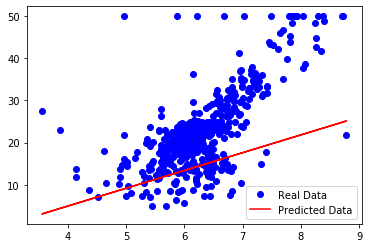

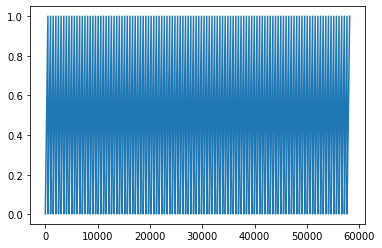

In [15]:
Y_pred = X_train * w_value + b_value
print('Done')
# 可视化查看结果
plt.plot(X_train,Y_train,'bo',label='Real Data')
plt.plot(X_train,Y_pred,'r',label='Predicted Data')
plt.legend()
plt.show()
plt.plot(total)
plt.show()